# House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

This kaggle challenge consist on a regression problem, predicting house prices, based on 79 distinct features.

I will mostly use it to train data-preprocessing and feature engineering, as well as regression models, without taking overall Kaggle score too much into consideration.

__Please note: this Notebook is a work in progress and is still being updated.__

### Import libraries

First let's import the libraries that will be used in this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None

#Add separation lines in graphs
plt.rcParams["patch.force_edgecolor"] = True

#SciPy
from scipy import stats, spatial

#Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score, learning_curve,GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import LocalOutlierFactor
import xgboost
import lightgbm as lgbm

from sklearn.metrics import mean_squared_error

### EDA

Let's start by doing some Exploratory Data Analysis and learn more about the Dataset itself.

This Dataset is divided into two, a Train set (houses with the Target Variable, SalePrice) and a Test Set (houses with no SalePrice, the target variable).

In [2]:
#Import train and test sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

From .info we can already see that train and test sets have many missing values! These need to be filled.

__Let's list the features with missing values and sort them from most to least in %:__

In [6]:
#List and store features with Missing Values of the Train set in a new variable for latter use.
mva_train = train.isnull().mean()
mva_train[mva_train > 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [7]:
#List and store features with Missing Values of the Test set in a new variable for latter use.
mva_test = test.isnull().mean()
mva_test[mva_test > 0].sort_values(ascending=False)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
dtype: float64

There seem to be many missing values in both the train and test sets, particularly in:
- Lot Frontage (17.7% MV on train set / 15.6% MV on test set);
- __Alley__ (93.7% MV on train set / 92,7% MV on test set);
- FireplaceQu (47.3% MV on train set / 50.0% mv on test set);
- __PoolQC__ (99.5% MV on train set / 99.8% MV on test set) - This will be dropped;
- __Fence__ (80.8% MV on train set / 80.1% MV on test set);
- __MiscFeature__ (96.3% MV on train set / 96.5% MV on test set).

### SalePrice distribution

SalePrice is the target variable of this problem and as such it is highly important. 

Unlike classification, in regression we are predicting a continuous number. Hence, the prediction could be any number along the real number line.
Therefore, it is always useful to check the distribution of the target variable, and indeed all numeric variables, when building a regression model. Machine Learning algorithms work really well with features that are normally distributed, a distribution that is symmetric and has a characteristic bell shape. If features are not normally distributed, they can be transformed using statistical methods.

Let's check the SalePrice distribution and also the corresponding QQ plot.

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


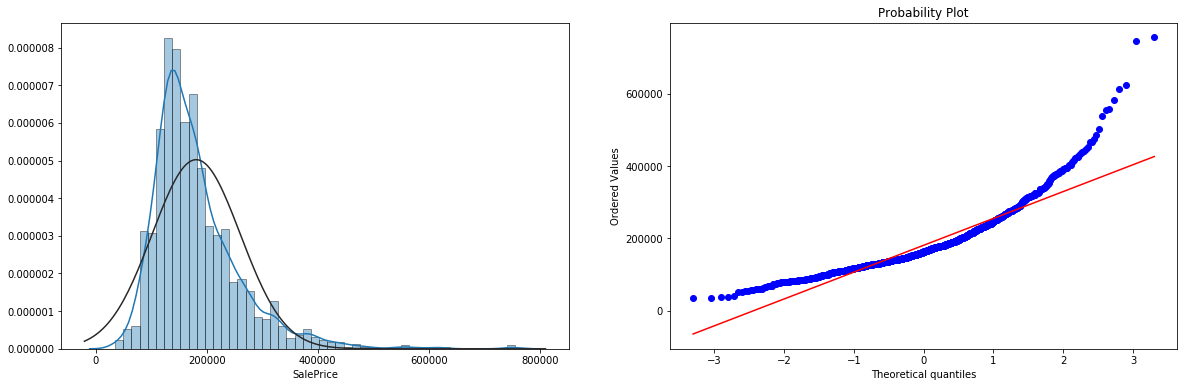

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'], fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(train['SalePrice'], plot=plt)

Most houses were sold with prices between 100.000 and 200.000 dollars.

The distribution seems to be right skewed. But by how much?

In [9]:
#What is the skewedness of SalePrice?
print('The skewedness of SalePrice is: {:0.3f}'.format(train['SalePrice'].skew()))

The skewedness of SalePrice is: 1.883


This is a considerably skewed distribution and normalisation may help in latter stages, when training the models. Thefore let's log transform the feature!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


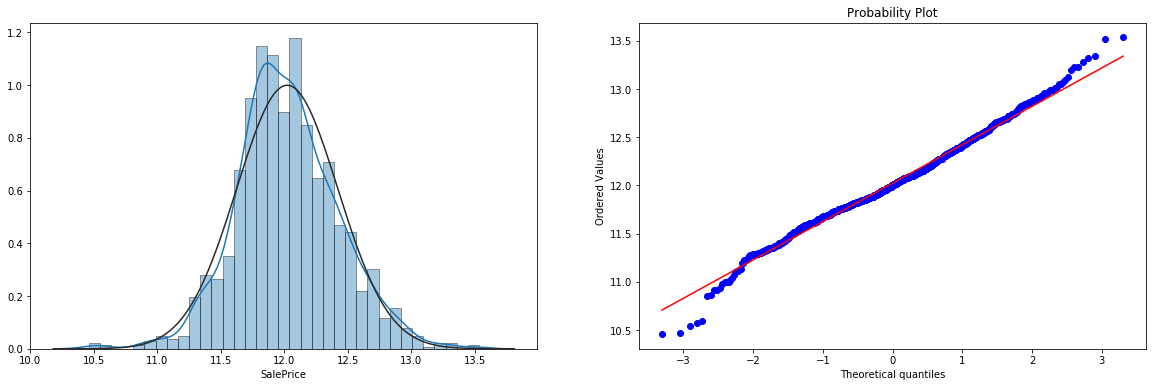

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(np.log1p(train['SalePrice']), fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(np.log1p(train['SalePrice']), plot=plt)

The log transformation seems to better approximate a normal distribution! What's the resulting skewedness?

In [11]:
#What is the skewedness of SalePrice?
print('The skewedness of SalePrice is: {:0.3f}'.format(np.log1p(train['SalePrice'].skew())))

The skewedness of SalePrice is: 1.059


Skewedness has reduced considerably and is now close to 1. Let's overwrite this in 'SalePrice'.

In [12]:
train['SalePrice'] = np.log1p(train['SalePrice'])

We will now explore the various features via plots.

__Let's create lists with categorical and quantitative attributes for future plotting__

In [13]:
categorical = [i for i in train.columns if train.dtypes[i] == 'object']
len(categorical)

43

In [14]:
quantitative = [i for i in train.drop(['Id','SalePrice'],axis=1).columns if train.dtypes[i] != 'object']

### Quantitative Features

Let's start with the 1uantitative features of the dataset.

In [15]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

One important metric is correlation, between features but also to the target variable. 

Let's start by checking correlation to the target variable in graphical and form.

In [16]:
feat_corr = train.drop('Id',axis=1).corr().drop('SalePrice',axis=0)

In [17]:
corr_sale_price = feat_corr['SalePrice'].sort_values(ascending=True)

Text(0.5,0,'Correlation with SalePrice')

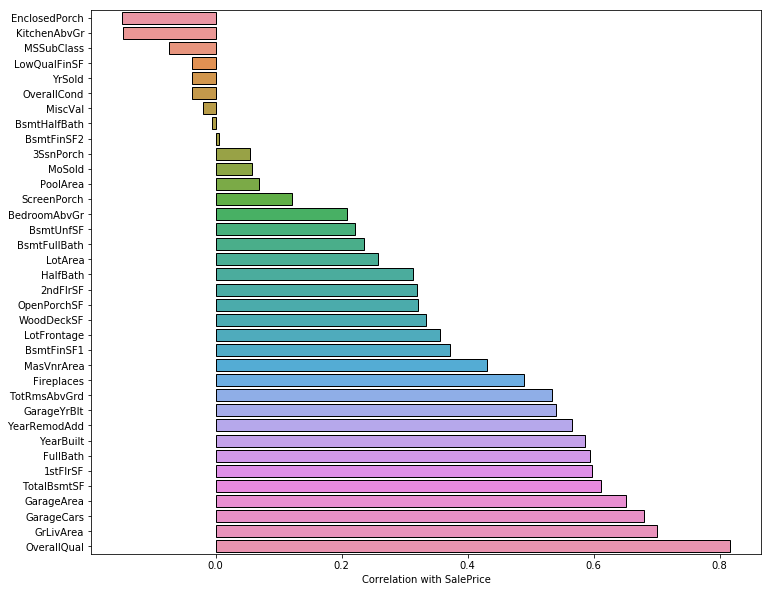

In [18]:
plt.figure(figsize=(12,10))
sns.barplot(y=corr_sale_price.index,x=corr_sale_price,orient='horizontal')
plt.xlabel('Correlation with SalePrice')

We can see that some features are hugely correlated with SalePrice and make real world sense, namely Overall Quality of the house, living area above ground, garage size and basement size. 

We can also see some features which are negatively correlated with SalePrice.

Let's also create a heatmap of all features!

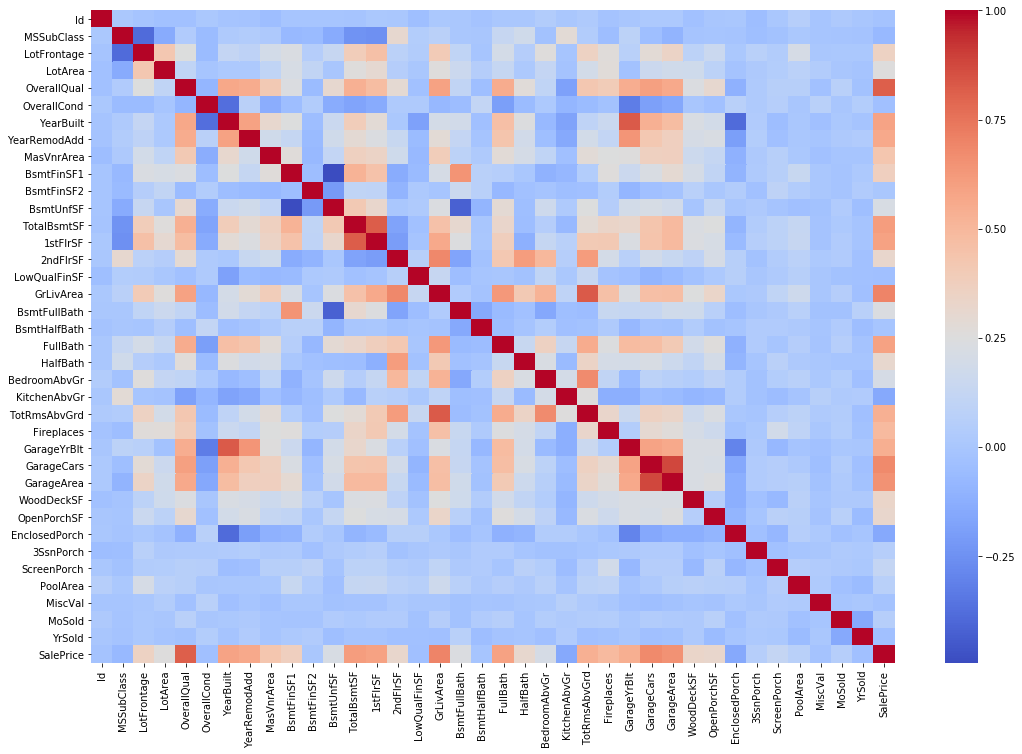

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(train.corr(),cmap='coolwarm')

__Let's print the distribution plots for the continuous variables__

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, a

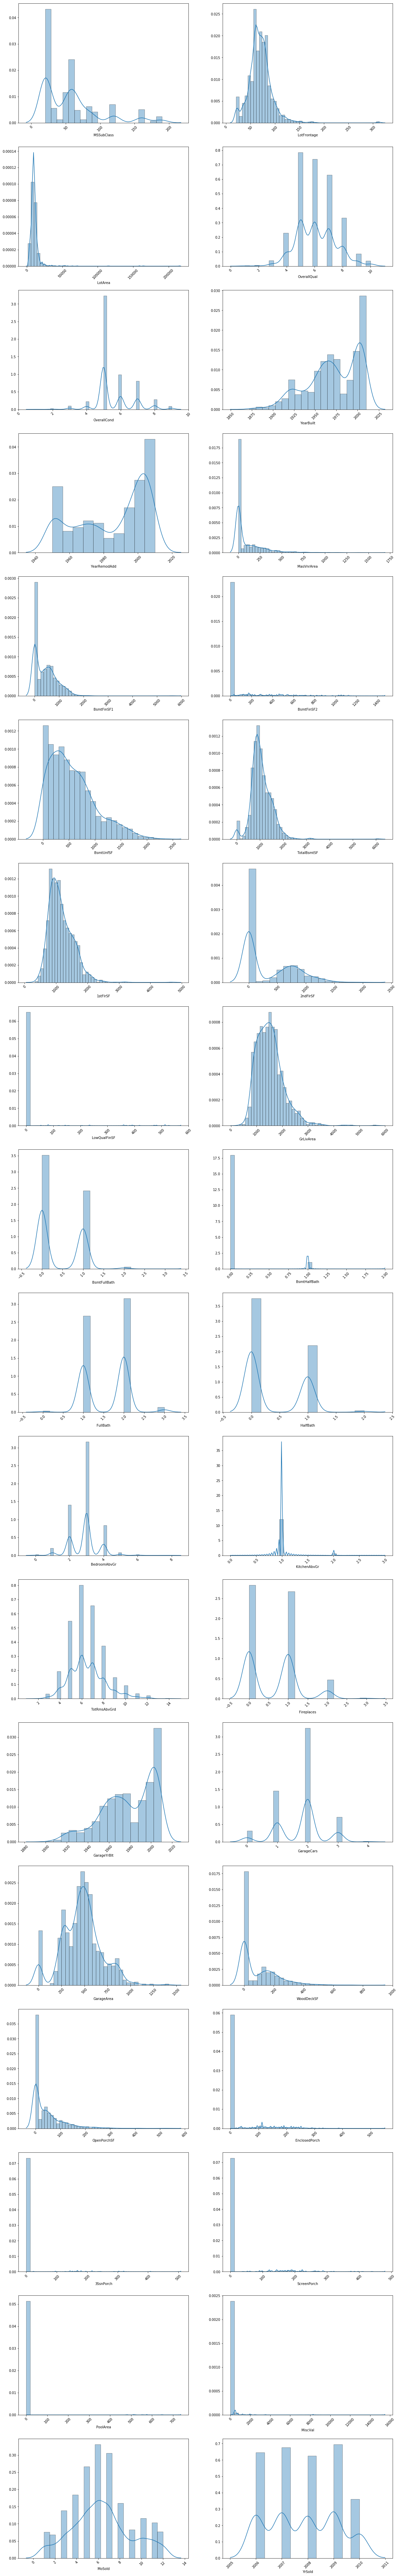

In [20]:
#Determine the number of rows and set a variable for it
n_cats = len(quantitative)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.distplot(train[quantitative[k]].dropna(),ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

__What about the variation of SalePrice with each numerical attribute?__

We'll plot regression plots of attributes with SalePrice

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


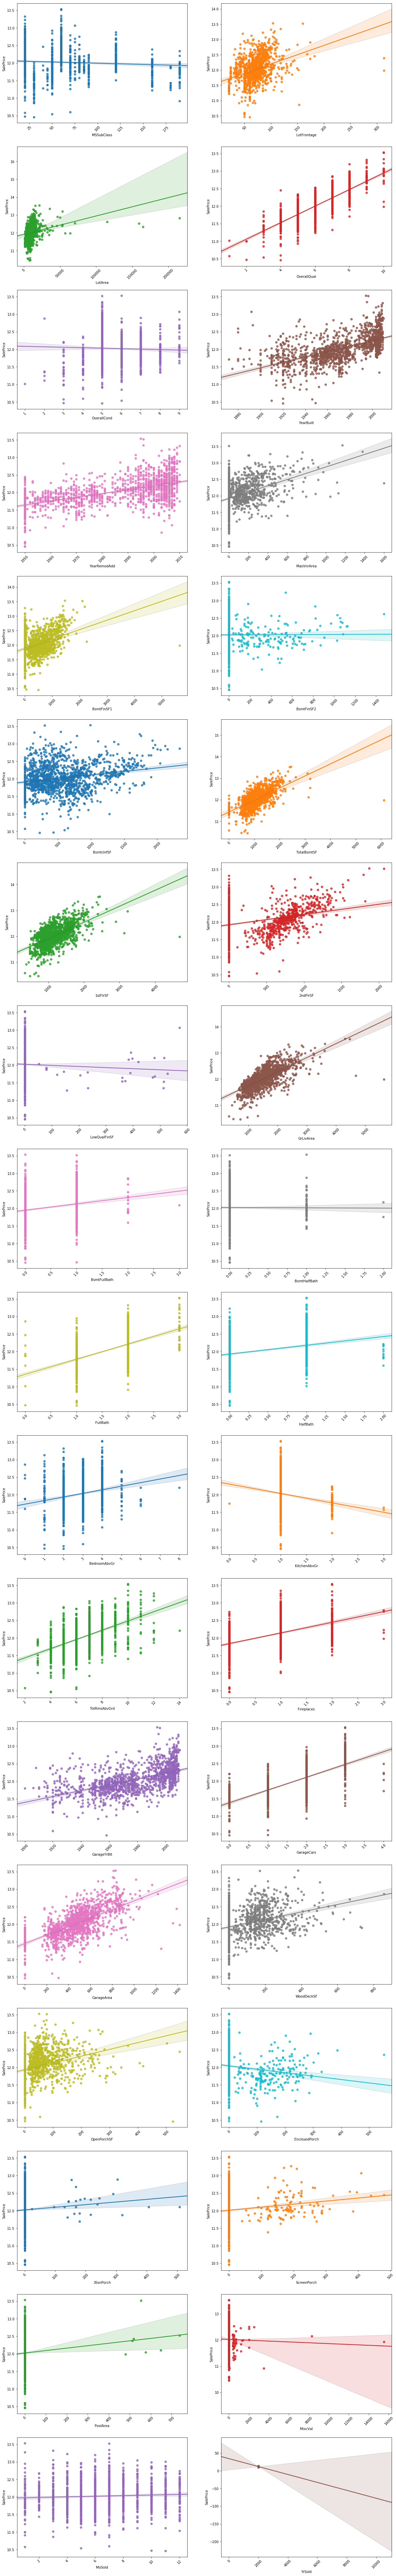

In [21]:
#Determine the number of rows and set a variable for it
n_cats = len(quantitative)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.regplot(x=train[quantitative[k]],y=train['SalePrice'],ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

We can already see that we have many features that are discrete rather than continuous, as well as features that are ordinal in nature, rather than numerical.

### Categorical Values

Now, let's explore categorical values!

__Let's print boxplots for all categorical attributes__

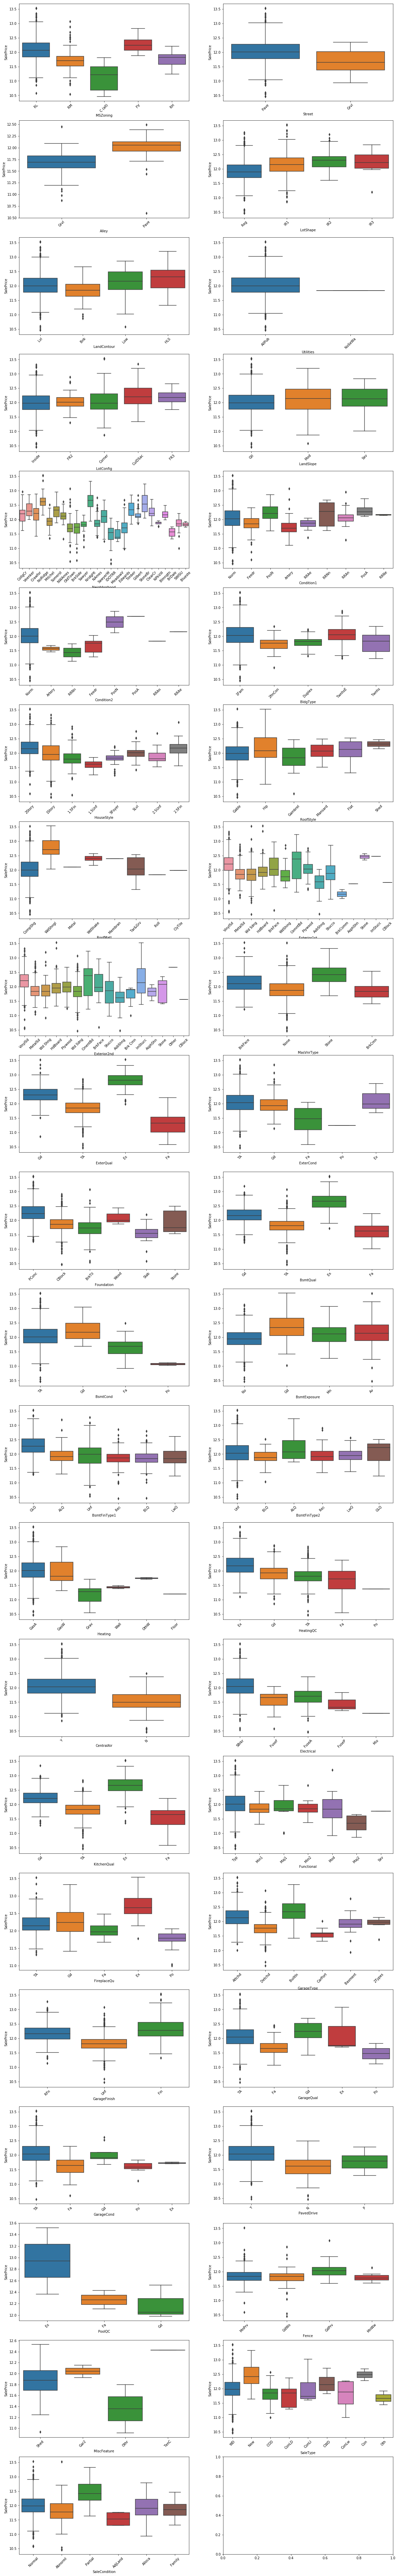

In [22]:
#Determine the number of rows and set a variable for it
n_cats = len(categorical)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.boxplot(x=train[categorical[k]],y=train['SalePrice'],data=train,ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

## Data Cleaning

While only a brief exploration of the data was performed, it already gives us some insights!

Let's continue, by cleaning the data, starting with the null values that need to be filed. Before doing so and as a way of reducing duplication of operations, let's join the training and test sets.

To accelerate the cleaning process, let's join the train and test sets!

In [23]:
#Store the size of train set in a variable for later splitting using the ID attribute
train_size = len(train)
train_size

1460

In [24]:
combined = pd.concat([train,test],sort=False).reset_index(drop=True)

In [25]:
#What is the ratio of missing values per feature?
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
BsmtFinSF1      0.000343
TotalBsmtSF     0.000343
SaleType        0.000343
KitchenQual     0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageCars      0.000343
GarageArea      0.000343
Electrical      0.000343
dtype: float64

### Information on attributes

Data documentation explains that some features have missing values on elements some houses don't have! These can be set to a new category "None".

Features:

- PoolQC;
- MiscFeature;
- Alley;
- Fence;
- FireplaceQu;
- GarageType;
- GarageFinish;
- GarageQual;
- GarageCond;
- BsmtQual;
- BsmtCond;
- BsmtExposure;
- BsmtFinType1;
- BsmtFinType2;

Let's deal with these first!

In [26]:
#List of "None" features
list_nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType',
               'GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
               'BsmtFinType1','BsmtFinType2']

In [27]:
#Let's loop through the various features!
for i in list_nones:
    combined[i].fillna('None',inplace=True)

In [28]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice       0.499829
LotFrontage     0.166495
GarageYrBlt     0.054471
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
Functional      0.000685
Utilities       0.000685
KitchenQual     0.000343
Electrical      0.000343
SaleType        0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
GarageCars      0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

This was already hugely helpful! 

Data documentation has additional useful information, as features that we filled previously have numerical counterparts with missing values instead of 0 values (house does not have the feature).

These features are:
- GarageYrBlt;
- MasVnrArea;
- BsmtUnfSF;
- BsmtFinSF1;
- BsmtFinSF2;
- TotalBsmtSF;
- BsmtFullBath;
- BsmtHalfBath;
- GarageCars;
- GarageArea.

In [29]:
list_zeros = ['GarageYrBlt','MasVnrArea','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2',
              'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']

In [30]:
#Let's loop through the various features and set zeros!
for i in list_zeros:
    combined[i].fillna(0,inplace=True)

In [31]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice      0.499829
LotFrontage    0.166495
MasVnrType     0.008222
MSZoning       0.001370
Functional     0.000685
Utilities      0.000685
SaleType       0.000343
KitchenQual    0.000343
Electrical     0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
dtype: float64

The remaining missing values will need to be dealt with! Let's start with LotFrontage.

There is a feature called LotArea. Most houses are built in square or rectangular plots. Let's see if there is a good correlation between these variables.

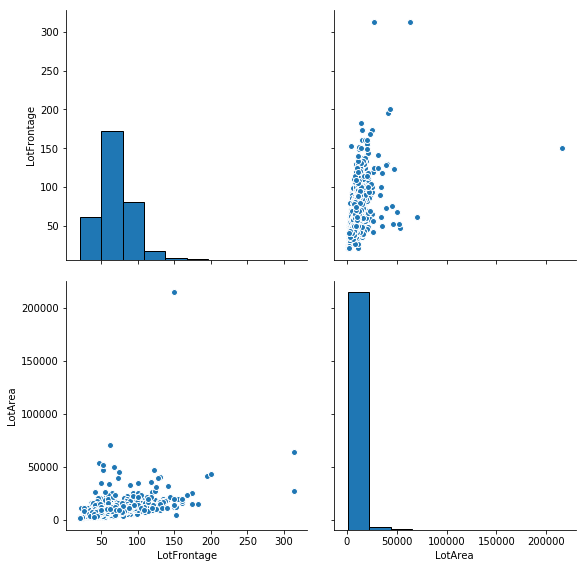

In [32]:
sns.pairplot(data=combined[['LotFrontage','LotArea']].dropna(),size=4)

What's the correlation?

In [33]:
print('Correlation value: {:.3f}'.format(combined['LotFrontage'].corr(combined['LotArea'])))

Correlation value: 0.490


The correlation is not as high as we'd hope.

__We are however comparing a length with an area! If we perform a sqrt tranformation on LotArea__, how does the correlation change?

In [34]:
print('Correlation value: {:.3f}'.format(combined['LotFrontage'].corr(np.sqrt(combined['LotArea']))))

Correlation value: 0.648


Correlation has improved somewhat! For this we have assumed a square lot. Let's see how this dimension compares to LotFrontage

In [35]:
combined['Lot_dim'] = np.sqrt(combined['LotArea'])
combined[['LotFrontage','Lot_dim']].head()

LotFrontage     Lot_dim
0         65.0   91.923882
1         80.0   97.979590
2         68.0  106.066017
3         60.0   97.724101
4         84.0  119.415242

In [36]:
(combined['Lot_dim']/combined['LotFrontage']).describe()

count    2433.000000
mean        1.464006
std         0.385545
min         0.419423
25%         1.234909
50%         1.386750
75%         1.609314
max         4.921475
dtype: float64

In [37]:
#Sum of absolute of difference between features
abs(combined['Lot_dim']-combined['LotFrontage']).sum()

67487.23798291334

There is some difference visible between the LotFrontage and Lot_dim features. Specifically, it seems that Lot_dim is mostly larger than LotFrontage (apart from a very small % of houses). Can we scale this dimension to better fit LotFrontage, via the median value?

In [38]:
combined['Lot_dim'] = combined['Lot_dim']/((combined['Lot_dim']/combined['LotFrontage']).median())

In [39]:
(combined['Lot_dim']/combined['LotFrontage']).describe()

count    2433.000000
mean        1.055710
std         0.278020
min         0.302450
25%         0.890505
50%         1.000000
75%         1.160493
max         3.548926
dtype: float64

In [40]:
#Sum of absolute of difference between features
abs(combined['Lot_dim']-combined['LotFrontage']).sum()

28514.97312150352

Not only is the difference balanced around the median, but we can see that std as reduced significantly, from 0.385545 to 0.278020. This can be cross-checked with the absolute differences that reduced by around 50%, representing a vast improvement of similarity between the features LotFrontage and Lot_dim.

Let's use this adjusted feature to fill missing values of LotFrontage!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


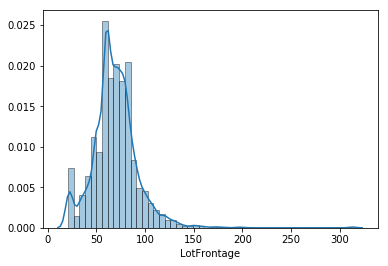

In [41]:
sns.distplot(a=combined['LotFrontage'].dropna())

In [42]:
#Fill in the missing values
filt = combined['LotFrontage'].isnull()

combined.loc[filt,'LotFrontage'] = combined[filt]['Lot_dim']

In [43]:
#Drop the auxiliary feature Lot_dim
combined.drop('Lot_dim',axis=1,inplace=True)

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


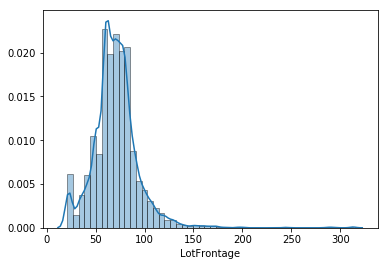

In [44]:
#Disttribution plot of LotFrontage after filling missing values
sns.distplot(a=combined['LotFrontage'])

Distribution does not seem to have changed shape due to the Missing Values that were filled which is a good sign!

In [45]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice      0.499829
MasVnrType     0.008222
MSZoning       0.001370
Functional     0.000685
Utilities      0.000685
SaleType       0.000343
KitchenQual    0.000343
Electrical     0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
dtype: float64

__Remaining Features__

- MSZoning: Categorical;
- Functional: Categorical;
- Utilities: Categorical. Only has 2 features;
- SaleType: Categorical;
- KitchenQual: Categorical;
- Electrical: Categorical;
- Exterior2nd: Categorical;
- Exterior1st: Categorical;
- MasVnrType: Categorical;

Let's start with Utilities:

In [46]:
combined['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [47]:
combined[combined['Utilities'] == 'NoSeWa']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
944  945          20       RL    86.458082    14375   Pave  None      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
944         Lvl    NoSeWa   CulDSac       Gtl       Timber       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
944       Norm     1Fam       SLvl            6            6       1958   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
944          1958     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
944       541.0        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
944          GLQ       111.0          Rec       354.0      354.0        819.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
944    GasA        Gd          Y      FuseA      1344         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
944       1344           0.0           1.0         1         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
944             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
944          Gd    Basment       1958.0          RFn         2.0       525.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
944         TA         TA          Y           0          118              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
944          0          233         0   None  None        None        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
944       1    2009      COD       Abnorml  11.831386

Utilities only has 2 categories and 1 of them only applies to 1 case! Let's drop the feature altogether.

In [48]:
combined.drop('Utilities',axis=1,inplace=True)

The remaining features have few Missing Values and will be filled with the mode.

In [49]:
#Create a list with the features that will be filled with the mode.
list_mode = ['MSZoning','Functional','SaleType','KitchenQual','Electrical','Exterior2nd','Exterior1st','MasVnrType']

for i in list_mode:
    combined[i].fillna(combined[i].mode()[0],inplace=True )   

In [50]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice    0.499829
dtype: float64

__All missing values are dealt with!__

### Dealing with Outliers

In the Ames Housing Dataset paper that acompanies this challenge, it is indicated that some Outliers can be identified and should be removed:

" Although all known errors were corrected in the data, no observations have been removed due to unusual values and all final residential sales from the initial data set are included in the data presented with this article. There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students. "

Let's proceed accordingly:

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


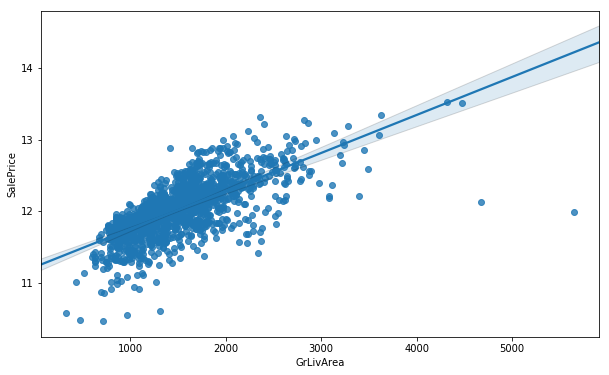

In [51]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='GrLivArea',y='SalePrice',data=combined)

2 Outliers are clearly visible on the middle right of the graph. The other must be one of the other two above 4000.

Let's proceed accodring to suggestion on Ames paper and remove all houses with more than 4000 of GrLivArea.

In [52]:
#Let's check houses with more than 4000 of GrLivArea
combined[(combined['GrLivArea']  > 4000) & (combined['Id'] <= 1460)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave  None      IR1   
691    692          60       RL        104.0    21535   Pave  None      IR1   
1182  1183          60       RL        160.0    15623   Pave  None      IR1   
1298  1299          60       RL        313.0    63887   Pave  None      IR3   

     LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
523          Bnk    Inside       Gtl      Edwards       PosN       PosN   
691          Lvl    Corner       Gtl      NoRidge       Norm       Norm   
1182         Lvl    Corner       Gtl      NoRidge       Norm       Norm   
1298         Bnk    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
523      1Fam     2Story           10            5       2007          2008   
691      1Fam     2Story           10            6       1994          1995   
1182     1Fam     2Story           10            5       1996          1996   
1298     1Fam     2Story           10            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
523        Hip  CompShg     CemntBd     CmentBd      Stone       762.0   
691      Gable  WdShngl     HdBoard     HdBoard    BrkFace      1170.0   
1182       Hip  CompShg     Wd Sdng     ImStucc       None         0.0   
1298       Hip  ClyTile      Stucco      Stucco      Stone       796.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
523         Ex        TA      PConc       Ex       TA           Gd   
691         Ex        TA      PConc       Ex       TA           Gd   
1182        Gd        TA      PConc       Ex       TA           Av   
1298        Ex        TA      PConc       Ex       TA           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
523           GLQ      2260.0          Unf         0.0      878.0   
691           GLQ      1455.0          Unf         0.0      989.0   
1182          GLQ      2096.0          Unf         0.0      300.0   
1298          GLQ      5644.0          Unf         0.0      466.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
523        3138.0    GasA        Ex          Y      SBrkr      3138      1538   
691        2444.0    GasA        Ex          Y      SBrkr      2444      1872   
1182       2396.0    GasA        Ex          Y      SBrkr      2411      2065   
1298       6110.0    GasA        Ex          Y      SBrkr      4692       950   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
523              0       4676           1.0           0.0         3         1   
691              0       4316           0.0           1.0         3         1   
1182             0       4476           1.0           0.0         3         1   
1298             0       5642           2.0           0.0         2         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
523              3             1          Ex            11        Typ   
691              4             1          Ex            10        Typ   
1182             4             1          Ex            10        Typ   
1298             3             1          Ex            12        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
523            1          Gd    BuiltIn       2007.0          Fin         3.0   
691            2          Ex     Attchd       1994.0          Fin         3.0   
1182           2          TA     Attchd       1996.0          Fin         3.0   
1298           3          Gd     Attchd       2008.0          Fin         2.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
523        884.0         TA         TA          Y         208          406   
691        832.0         TA     

In [53]:
#Let's remove these outliers!
combined = combined[(combined['GrLivArea']  <= 4000) | (combined['Id'] > 1460)]

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


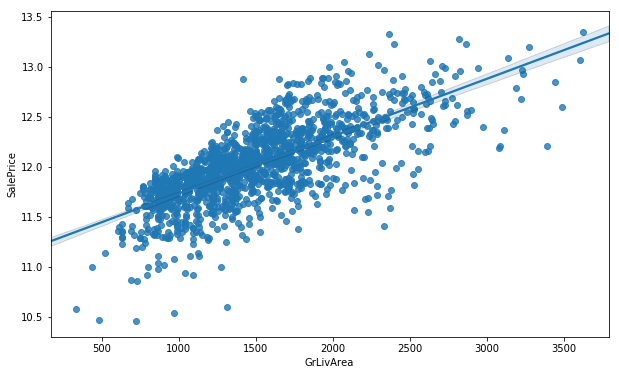

In [54]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='GrLivArea',y='SalePrice',data=combined)

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


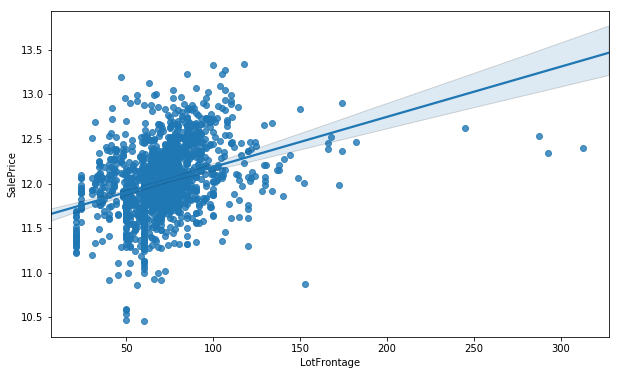

In [55]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='LotFrontage',y='SalePrice',data=combined)

In [56]:
combined[(combined['LotFrontage']> 150) & (combined['LotFrontage']< 160)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1211  1212          50       RL   152.000000    12134   Pave  None      IR1   
1337  1338          30       RM   153.000000     4118   Pave  Grvl      IR1   
1947  1948          20       RL   156.797959    47280   Pave  None      IR1   
2513  2514          20       RL   155.000000    20064   Pave  None      IR1   

     LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
1211         Bnk    Inside       Mod      Gilbert       Norm       Norm   
1337         Bnk    Corner       Mod      OldTown      Feedr       Norm   
1947         Lvl    Inside       Gtl      Gilbert       Norm       Norm   
2513         Low    Inside       Sev      ClearCr       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1211     1Fam     1.5Fin            8            7       1988          2005   
1337     1Fam     1Story            4            4       1941          1950   
1947     1Fam     1Story            6            5       1950          1950   
2513     1Fam     1Story            8            6       1976          1976   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1211     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0   
1337     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0   
1947       Hip  CompShg     AsbShng     AsbShng    BrkFace        44.0   
2513      Shed  WdShngl     Wd Sdng     Wd Sdng       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1211        Gd        TA       Wood       Gd       TA           Av   
1337        TA        TA     CBlock       TA       TA           No   
1947        TA        TA     CBlock       TA       TA           No   
2513        Gd        TA     CBlock       Gd       Gd           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1211          GLQ       427.0          Unf         0.0      132.0   
1337          Unf         0.0          Unf         0.0      693.0   
1947          Unf         0.0          Unf         0.0     1488.0   
2513          LwQ        51.0          GLQ       915.0        0.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1211        559.0    GasA        Gd          Y      SBrkr      1080       672   
1337        693.0    Grav        Fa          N      FuseA       693         0   
1947       1488.0    GasA        Gd          Y      SBrkr      1488         0   
2513        966.0    GasA        Ex          Y      SBrkr      1743         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1211             0       1752           0.0           0.0         2         0   
1337             0        693           0.0           0.0         1         0   
1947             0       1488           0.0           0.0         2         1   
2513             0       1743           2.0           0.0         0         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1211             4             1          TA             8        Typ   
1337             2             1          Fa             4        Typ   
1947             3             1          TA             6        Typ   
2513             0             1          Gd             5        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
1211           0        None    Basment       1988.0          RFn         2.0   
1337           0        None       None          0.0         None         0.0   
1947           1          TA     Attchd       1950.0          RFn         2.0   
2513           2          Fa     Attchd       1976.0          Fin         2.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
1211       492.0         TA         TA          Y         325           12   
1337         0.0       None     

(The method of exploring outliers is based on Top 7% using ElasticNet with Interactions. I used Ridge and ElasticNet to train the training set and predict the training set. Find out the samples with unpredictable prediction results in the two algorithms as outliers)

Prepare the DataSet for Kernel Ridge and ElasticNet through an auxiliary DF called outliers.

In [57]:
#Collect the column names that are either "object" or "category" types
categorical = [i for i in combined.columns if ((combined.dtypes[i].name == 'object') or (combined.dtypes[i].name == 'category'))]

In [58]:
#OHE
outliers = combined[combined['Id']<= 1460]
y=outliers['SalePrice']
outliers = pd.get_dummies(outliers,columns=categorical)
DF_for_OD = outliers.copy()

In [59]:
outliers.drop(['SalePrice','Id'],axis=1,inplace = True)

In [60]:
rr = KernelRidge(alpha=10)
rr.fit(outliers, y)
np.sqrt(-cross_val_score(rr, outliers, y, cv=10, scoring="neg_mean_squared_error")).mean()

0.11250345469880467

In [61]:
y_pred = rr.predict(outliers)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
#outliers1 =np.where(abs(z)>abs(z).std()*5)[0]
outliers1 = pd.DataFrame(z[abs(z)>abs(z).std()*5]).index
outliers1

Int64Index([30, 88, 410, 462, 495, 588, 632, 688, 710, 916, 968, 970, 1324,
            1432, 1453],
           dtype='int64')

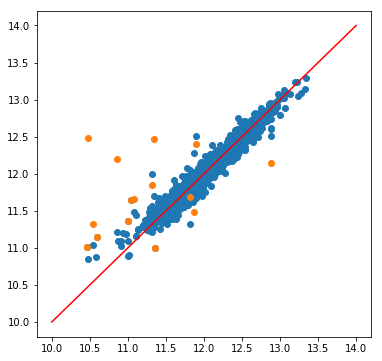

In [62]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y[outliers1], y_pred[outliers1])
plt.plot(range(10, 15), range(10, 15), color="red")

__Elastic Net__

In [63]:
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(outliers, y)
np.sqrt(-cross_val_score(rr, outliers, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.11519958589820005

In [64]:
y_pred = er.predict(outliers)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
outliers2 = pd.DataFrame(z[abs(z) > abs(z).std()*5]).index
#outliers2 =np.where(abs(z)>abs(z).std()*5)[0]
outliers2

Int64Index([30, 88, 410, 462, 495, 588, 632, 688, 710, 968, 970, 1324, 1432,
            1453],
           dtype='int64')

array([  30,   88,  410,  462,  495,  587,  631,  687,  708,  966,  968,
       1320, 1428, 1449], dtype=int64)

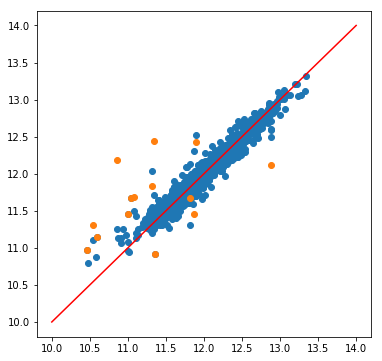

In [65]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y[outliers2], y_pred[outliers2])
plt.plot(range(10, 15), range(10, 15), color="red")

In [66]:
outlier_global_list = []
for i in outliers1:
    for j in outliers2:
        if i == j:
            outlier_global_list.append(i)

In [67]:
print(outlier_global_list)

[30, 88, 410, 462, 495, 588, 632, 688, 710, 968, 970, 1324, 1432, 1453]


In [68]:
#outlier_global_list = [30, 88, 410, 462, 495, 588, 628, 632, 874, 898, 968, 970, 1324, 1432]

Let's eliminate these outliers from the DataFrame!

In [69]:
#Local Outlier Factor (LOF)

#ground_truth = np.ones(len(combined), dtype=int)
#ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.006)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(DF_for_OD)
#n_errors = (y_pred != ground_truth).sum()
#X_scores = clf.negative_outlier_factor_

In [70]:
(y_pred == -1).sum()

9

In [71]:
DF_for_OD[(y_pred == -1)].index

Int64Index([249, 313, 335, 346, 451, 706, 1230, 1396, 1457], dtype='int64')

In [72]:
outliers_local_list = DF_for_OD[(y_pred == -1)].index.tolist()

In [73]:
outliers_local_list

[249, 313, 335, 346, 451, 706, 1230, 1396, 1457]

In [74]:
outliers_combined = outliers_local_list + outlier_global_list

In [75]:
outliers_combined

[249,
 313,
 335,
 346,
 451,
 706,
 1230,
 1396,
 1457,
 30,
 88,
 410,
 462,
 495,
 588,
 632,
 688,
 710,
 968,
 970,
 1324,
 1432,
 1453]

In [76]:
combined.shape

(2915, 80)

In [77]:
combined = combined.drop(set(outliers_combined),axis=0)

In [78]:
combined.shape

(2892, 80)

## Feature Engineering

### Ordinal Features

Let's start by looking into the YearBuilt feature.

In [79]:
print('There is a correlation between "YearBuilt" and "SalePrice" of {:.4f}'.format(combined['YearBuilt'].corr(combined['SalePrice'])))

There is a correlation between "YearBuilt" and "SalePrice" of 0.5925


C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


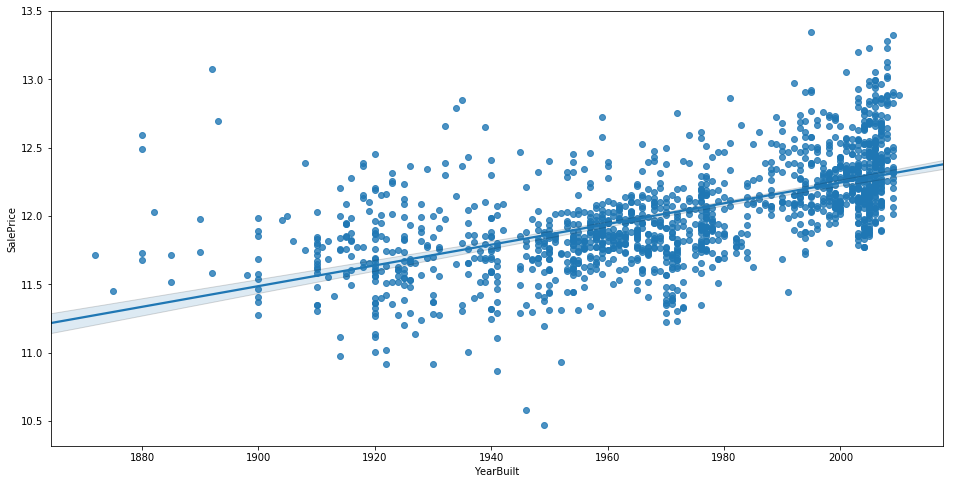

In [80]:
plt.figure(figsize=(16,8))
sns.regplot(x='YearBuilt',y='SalePrice',data=combined)

There is a reasonable correlation between this feature and SalePrice. However, there are outliers spread along the data and differences in variance that can be seen in older houses, when compared with more recent ones! 

Let's consider binning this data according to the decade the house was built (this case, 14 bins corresponding to the 140 years this data spans).

In [81]:
combined['YearBuilt_Bins'] = pd.cut(combined['YearBuilt'],bins=14)

In [82]:
combined.groupby('YearBuilt_Bins')['SalePrice'].describe()

count       mean       std        min        25%  \
YearBuilt_Bins                                                           
(1871.862, 1881.857]    6.0  11.941834  0.477319  11.451061  11.683598   
(1881.857, 1891.714]    5.0  11.795123  0.211884  11.512935  11.715874   
(1891.714, 1901.571]   14.0  11.783072  0.511722  11.277216  11.481311   
(1901.571, 1911.429]   22.0  11.730083  0.247446  11.302217  11.612749   
(1911.429, 1921.286]   73.0  11.742913  0.324282  10.976799  11.561725   
(1921.286, 1931.143]   75.0  11.682159  0.323862  10.915107  11.512435   
(1931.143, 1941.0]     70.0  11.783399  0.397547  10.868587  11.565271   
(1941.0, 1950.857]     64.0  11.699471  0.330259  10.471978  11.600241   
(1950.857, 1960.714]  161.0  11.849365  0.242666  10.933000  11.732069   
(1960.714, 1970.571]  178.0  11.887907  0.231569  11.225257  11.767575   
(1970.571, 1980.429]  170.0  11.911234  0.273392  11.231901  11.751950   
(1980.429, 1990.286]   63.0  12.163493  0.290848  11.626263  12.003034   
(1990.286, 2000.143]  173.0  12.264381  0.271574  11.445727  12.083911   
(2000.143, 2010.0]    359.0  12.359568  0.309332  11.775297  12.133238   

                            50%        75%        max  
YearBuilt_Bins                                         
(1871.862, 1881.857]  11.719915  12.300394  12.594734  
(1881.857, 1891.714]  11.735277  11.979805  12.031725  
(1891.714, 1901.571]  11.579407  11.880364  13.071072  
(1901.571, 1911.429]  11.746010  11.824067  12.388398  
(1911.429, 1921.286]  11.759793  11.950541  12.452937  
(1921.286, 1931.143]  11.669083  11.866950  12.363081  
(1931.143, 1941.0]    11.742057  11.982049  12.850557  
(1941.0, 1950.857]    11.732061  11.866004  12.466516  
(1950.857, 1960.714]  11.842236  11.951187  12.721889  
(1960.714, 1970.571]  11.873744  12.031576  12.524421  
(1970.571, 1980.429]  11.906661  12.072547  12.751303  
(1980.429, 1990.286]  12.116700  12.340389  12.861001  
(1990.286, 2000.143]  12.220966  12.421188  13.345509  
(2000.143, 2010.0]    12.323860  12.544331  13.323929

There is a clear tendency for recent houses (from the 80's onwards) commanding ever rising prices. This is not true of older decades, and rises and falls can be captured this way. 

Note that the 1870 decade has a mean price comparable only to 1970's onwards and some low points can be seen in the 1900's and 1920's!

Let's therefore drop the feature'YearBuilt' and use this new feature in OHE form.

In [83]:
combined.drop('YearBuilt',axis=1,inplace=True)

To facilitate future tests with including and excluding features, let's make a copy of the combined DataFrame and use the copy for feature pre-processing and engineering!

In [84]:
aux_DF = combined.copy()

In [85]:
#combined = aux_DF

__Area Features__

- LotFrontage;
- LotArea;
- BsmtUnfSF - Unfinished square feet of basement area;
- BsmtFinSF1 - Type 1 finished square feet;
- BsmtFinSF2 - Type 2 finished square feet;
- BsmtUnfSF: Unfinished square feet of basement area;
- TotalBsmtSF: Total square feet of basement area;
- 1stFlrSF;
- 2ndFlrSF;
- GrLivArea - Above grade (ground) living area square feet;
- WoodDeckSF;
- OpenPorchSF;
- EnclosedPorch;
- 3SsnPorch;
- ScreenPorch.

In [86]:
combined[['LotFrontage','LotArea','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GarageArea','SalePrice']].corr()

LotFrontage   LotArea  1stFlrSF  2ndFlrSF  GrLivArea  \
LotFrontage       1.000000  0.649247  0.422420  0.013047   0.341060   
LotArea           0.649247  1.000000  0.416784  0.052820   0.372191   
1stFlrSF          0.422420  0.416784  1.000000 -0.275981   0.540634   
2ndFlrSF          0.013047  0.052820 -0.275981  1.000000   0.654436   
GrLivArea         0.341060  0.372191  0.540634  0.654436   1.000000   
WoodDeckSF        0.121915  0.196980  0.223155  0.086548   0.248237   
OpenPorchSF       0.149090  0.156739  0.230242  0.182721   0.338692   
EnclosedPorch     0.031468  0.051720 -0.062305  0.056057   0.007568   
3SsnPorch         0.042256  0.031430  0.046210 -0.032612   0.007389   
ScreenPorch       0.070938  0.101963  0.103353  0.011974   0.091865   
GarageArea        0.338875  0.305040  0.482642  0.120993   0.477727   
SalePrice         0.361489  0.387994  0.617771  0.311237   0.726270   

               WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
LotFrontage      0.121915     0.149090       0.031468   0.042256     0.070938   
LotArea          0.196980     0.156739       0.051720   0.031430     0.101963   
1stFlrSF         0.223155     0.230242      -0.062305   0.046210     0.103353   
2ndFlrSF         0.086548     0.182721       0.056057  -0.032612     0.011974   
GrLivArea        0.248237     0.338692       0.007568   0.007389     0.091865   
WoodDeckSF       1.000000     0.038127      -0.117872  -0.003903    -0.052110   
OpenPorchSF      0.038127     1.000000      -0.062506  -0.009254     0.049452   
EnclosedPorch   -0.117872    -0.062506       1.000000  -0.032849    -0.064212   
3SsnPorch       -0.003903    -0.009254      -0.032849   1.000000    -0.029799   
ScreenPorch     -0.052110     0.049452      -0.064212  -0.029799     1.000000   
GarageArea       0.232576     0.233546      -0.106373   0.029728     0.063035   
SalePrice        0.329276     0.359190      -0.137978   0.056525     0.125094   

               GarageArea  SalePrice  
LotFrontage      0.338875   0.361489  
LotArea          0.305040   0.387994  
1stFlrSF         0.482642   0.617771  
2ndFlrSF         0.120993   0.311237  
GrLivArea        0.477727   0.726270  
WoodDeckSF       0.232576   0.329276  
OpenPorchSF      0.233546   0.359190  
EnclosedPorch   -0.106373  -0.137978  
3SsnPorch        0.029728   0.056525  
ScreenPorch      0.063035   0.125094  
GarageArea       1.000000   0.656497  
SalePrice        0.656497   1.000000

__Porch related areas__

In [87]:
aux_DF[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sample(10)

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
2333         120           38              0          0            0
1527         414            0              0          0            0
2301         100           38              0          0            0
439            0           46              0          0            0
1608           0           25              0          0            0
1327           0            0              0          0            0
565            0           66            136          0            0
704            0           35              0        144            0
45           196           82              0          0            0
2777         280            0             68          0            0

There are many various Porch related area features. Can these be combined in a single Porch Area?

In [88]:
#Combine all Porch areas into one new feature
aux_DF['PorchArea'] = aux_DF['WoodDeckSF']+aux_DF['OpenPorchSF']+aux_DF['EnclosedPorch']+aux_DF['3SsnPorch']+aux_DF['ScreenPorch']

In [89]:
aux_DF[['LotFrontage','LotArea','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PorchArea','GarageArea','SalePrice']].corr()

LotFrontage   LotArea  BsmtUnfSF  1stFlrSF  2ndFlrSF  \
LotFrontage       1.000000  0.649247   0.104728  0.422420  0.013047   
LotArea           0.649247  1.000000   0.058433  0.416784  0.052820   
BsmtUnfSF         0.104728  0.058433   1.000000  0.304801 -0.001725   
1stFlrSF          0.422420  0.416784   0.304801  1.000000 -0.275981   
2ndFlrSF          0.013047  0.052820  -0.001725 -0.275981  1.000000   
GrLivArea         0.341060  0.372191   0.240728  0.540634  0.654436   
WoodDeckSF        0.121915  0.196980  -0.038015  0.223155  0.086548   
OpenPorchSF       0.149090  0.156739   0.122690  0.230242  0.182721   
EnclosedPorch     0.031468  0.051720   0.006754 -0.062305  0.056057   
3SsnPorch         0.042256  0.031430  -0.005684  0.046210 -0.032612   
ScreenPorch       0.070938  0.101963  -0.048584  0.103353  0.011974   
PorchArea         0.203317  0.283315   0.005901  0.291701  0.166573   
GarageArea        0.338875  0.305040   0.167243  0.482642  0.120993   
SalePrice         0.361489  0.387994   0.235259  0.617771  0.311237   

               GrLivArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
LotFrontage     0.341060    0.121915     0.149090       0.031468   0.042256   
LotArea         0.372191    0.196980     0.156739       0.051720   0.031430   
BsmtUnfSF       0.240728   -0.038015     0.122690       0.006754  -0.005684   
1stFlrSF        0.540634    0.223155     0.230242      -0.062305   0.046210   
2ndFlrSF        0.654436    0.086548     0.182721       0.056057  -0.032612   
GrLivArea       1.000000    0.248237     0.338692       0.007568   0.007389   
WoodDeckSF      0.248237    1.000000     0.038127      -0.117872  -0.003903   
OpenPorchSF     0.338692    0.038127     1.000000      -0.062506  -0.009254   
EnclosedPorch   0.007568   -0.117872    -0.062506       1.000000  -0.032849   
3SsnPorch       0.007389   -0.003903    -0.009254      -0.032849   1.000000   
ScreenPorch     0.091865   -0.052110     0.049452      -0.064212  -0.029799   
PorchArea       0.374844    0.740535     0.439517       0.255368   0.127944   
GarageArea      0.477727    0.232576     0.233546      -0.106373   0.029728   
SalePrice       0.726270    0.329276     0.359190      -0.137978   0.056525   

               ScreenPorch  PorchArea  GarageArea  SalePrice  
LotFrontage       0.070938   0.203317    0.338875   0.361489  
LotArea           0.101963   0.283315    0.305040   0.387994  
BsmtUnfSF        -0.048584   0.005901    0.167243   0.235259  
1stFlrSF          0.103353   0.291701    0.482642   0.617771  
2ndFlrSF          0.011974   0.166573    0.120993   0.311237  
GrLivArea         0.091865   0.374844    0.477727   0.726270  
WoodDeckSF       -0.052110   0.740535    0.232576   0.329276  
OpenPorchSF       0.049452   0.439517    0.233546   0.359190  
EnclosedPorch    -0.064212   0.255368   -0.106373  -0.137978  
3SsnPorch        -0.029799   0.127944    0.029728   0.056525  
ScreenPorch       1.000000   0.302675    0.063035   0.125094  
PorchArea         0.302675   1.000000    0.265911   0.414728  
GarageArea        0.063035   0.265911    1.000000   0.656497  
SalePrice         0.125094   0.414728    0.656497   1.000000

PorchArea seems to have better correlation with SalePrice so we'll keep this feature!

__Basement Related Areas__

There are also many different Basement areas and characteristics!

Other than the numerical features, the Dataset also includes information regarding the quality of these Basement Areas. This seems like an important combination of features to explore:
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Perhaps this quality will directly influence the impact of Basement area? Let's explore!

In [90]:
aux_DF[['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].head()

BsmtUnfSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
0      150.0       706.0         0.0      150.0        856.0  12.247699
1      284.0       978.0         0.0      284.0       1262.0  12.109016
2      434.0       486.0         0.0      434.0        920.0  12.317171
3      540.0       216.0         0.0      540.0        756.0  11.849405
4      490.0       655.0         0.0      490.0       1145.0  12.429220

In [91]:
aux_DF[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].corr()

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
BsmtFinSF1     1.000000   -0.058366  -0.490528     0.507294   0.379733
BsmtFinSF2    -0.058366    1.000000  -0.236298     0.091971  -0.001685
BsmtUnfSF     -0.490528   -0.236298   1.000000     0.426960   0.235259
TotalBsmtSF    0.507294    0.091971   0.426960     1.000000   0.648786
SalePrice      0.379733   -0.001685   0.235259     0.648786   1.000000

TotalBsmtSF seems to better correlate with the SalePrice variable. This feature is derived from [BsmtFinSF1 + BsmtFinSF2] 

However, let's plot some of these graphs and better analyse the question

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


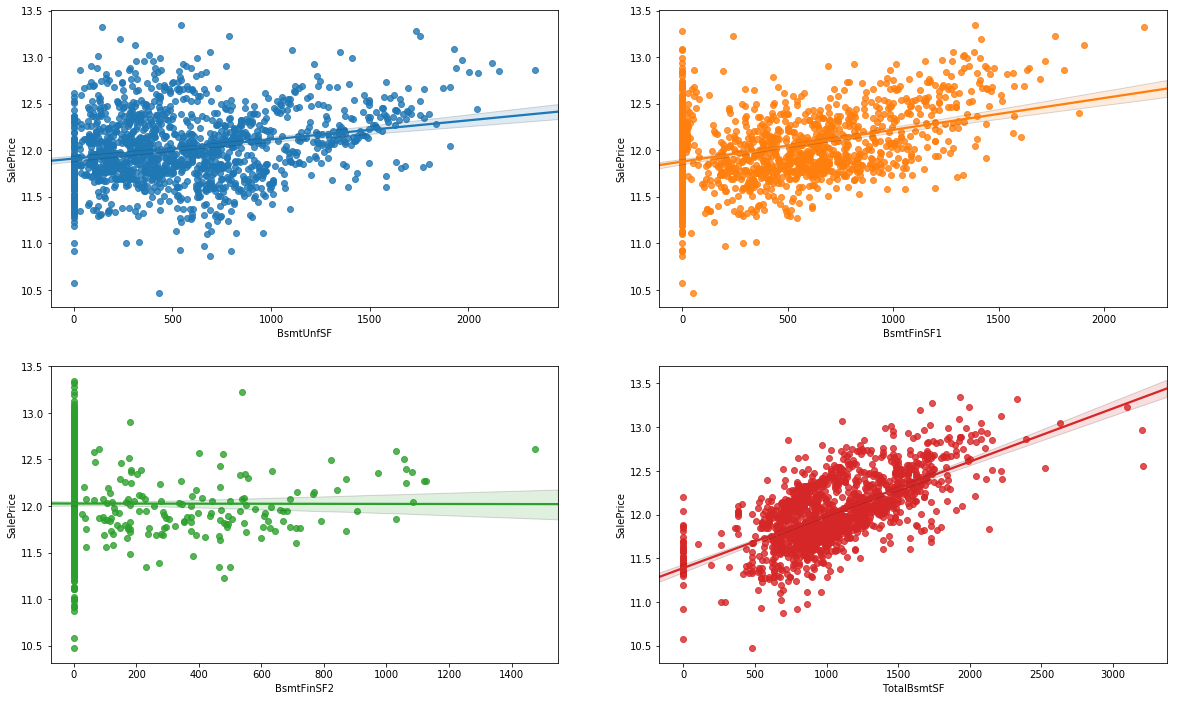

In [92]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='BsmtUnfSF',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='BsmtFinSF1',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='BsmtFinSF2',y='SalePrice',data=aux_DF,ax=axs[1,0])
ax = sns.regplot(x='TotalBsmtSF',y='SalePrice',data=aux_DF,ax=axs[1,1])

__OverallQual and OverallCond__

In [93]:
aux_DF[['OverallQual','OverallCond','SalePrice']].corr()['SalePrice']

OverallQual    0.825597
OverallCond   -0.054268
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [94]:
aux_DF[['OverallQual','SalePrice']].groupby('OverallQual').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
OverallQual                                                                   
1                 2.0  10.798825  0.310873  10.579005  10.688915  10.798825   
2                 3.0  10.825404  0.306076  10.471978  10.737047  11.002117   
3                17.0  11.411622  0.228200  10.976799  11.277216  11.418626   
4               112.0  11.577553  0.243177  10.868587  11.406102  11.592205   
5               390.0  11.782530  0.201424  10.933000  11.683431  11.798112   
6               372.0  11.965902  0.228621  11.238502  11.842236  11.982935   
7               314.0  12.219548  0.200804  11.669083  12.097574  12.206328   
8               166.0  12.498503  0.226040  11.711785  12.367345  12.505254   
9                43.0  12.793271  0.203521  12.384223  12.672884  12.751303   
10               14.0  12.958445  0.196176  12.644331  12.861812  12.976976   

                                   
                   75%        max  
OverallQual                        
1            10.908735  11.018646  
2            11.002117  11.002117  
3            11.561725  11.846544  
4            11.740069  12.452937  
5            11.897343  12.323860  
6            12.106258  12.524421  
7            12.345839  12.858322  
8            12.631262  13.195616  
9            12.873103  13.323929  
10           13.052210  13.345509

OverallQual is a highly correlated feature and seems to be Ordinal.

In [95]:
aux_DF[['OverallCond','SalePrice']].groupby('OverallCond').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
OverallCond                                                                   
1                 1.0  11.018646       NaN  11.018646  11.018646  11.018646   
2                 4.0  11.654100  0.827636  11.112463  11.211910  11.309367   
3                24.0  11.456659  0.449228  10.471978  11.276971  11.413055   
4                55.0  11.661313  0.313776  10.868587  11.439828  11.652696   
5               808.0  12.146716  0.381374  10.915107  11.877576  12.131758   
6               246.0  11.890476  0.273038  11.104972  11.735477  11.868856   
7               204.0  11.918373  0.307415  11.288544  11.722787  11.884496   
8                70.0  11.909682  0.298145  11.344519  11.737075  11.856497   
9                21.0  12.184859  0.414086  11.612780  11.870607  12.066816   

                                   
                   75%        max  
OverallCond                        
1            11.018646  11.018646  
2            11.751557  12.885205  
3            11.818351  12.209193  
4            11.892833  12.367345  
5            12.386507  13.345509  
6            12.049425  12.791359  
7            12.089544  12.904210  
8            12.056679  12.721889  
9            12.594734  13.071072

OverallCond on the other hand is not Ordinal and contains categories that do not seem to be very representative (only 1 sample with value 1, only 5 with value 2).

This feature must be converted to Categorical if it is to be used. However, to reduce the number of resulting OHE categories, it may be worth reducing some of the granularity by joining the data into only a couple of categories. Based on the values, it seems that it could be divided into 2 levels, "Poor" and "Good". This is a binary feature so we can instead assign to 0 and 1 values. Let's convert it!

In [96]:
aux_DF['OverallCond'] = (aux_DF['OverallCond']>= 5).astype('uint8')

__MSSubClass__

This feature identifies the type of dwelling involved in the sale. This information should be condensed on the other features and we will therefore not use it.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [97]:
aux_DF[['MSSubClass','SalePrice']].groupby('MSSubClass').describe()

SalePrice                                                        \
               count       mean       std        min        25%        50%   
MSSubClass                                                                   
20             524.0  12.055410  0.375490  10.471978  11.797170  11.981042   
30              66.0  11.462725  0.246313  10.868587  11.322076  11.512935   
40               4.0  11.870430  0.486844  11.283525  11.669465  11.864877   
45              12.0  11.579043  0.190143  11.238502  11.451400  11.585082   
50             140.0  11.821832  0.310794  11.104972  11.651607  11.790558   
60             295.0  12.333859  0.277773  11.767575  12.128117  12.279328   
70              58.0  11.978505  0.310607  11.264477  11.763669  11.957597   
75              16.0  12.064786  0.447735  11.522886  11.740514  12.004570   
80              58.0  12.021831  0.194213  11.580593  11.899890  12.022739   
85              20.0  11.895873  0.126174  11.719948  11.808209  11.854481   
90              51.0  11.773597  0.204322  11.314487  11.680563  11.820123   
120             87.0  12.171560  0.275223  11.507923  11.970581  12.165256   
150              0.0        NaN       NaN        NaN        NaN        NaN   
160             63.0  11.807198  0.262061  11.225257  11.643924  11.891369   
180             10.0  11.501760  0.267467  11.231901  11.312792  11.390370   
190             29.0  11.713951  0.265434  10.915107  11.585255  11.755879   

                                  
                  75%        max  
MSSubClass                        
20          12.301387  13.323929  
30          11.612780  12.004574  
40          12.065842  12.468441  
45          11.712807  11.845110  
50          11.976666  12.923915  
60          12.496877  13.345509  
70          12.149110  12.791359  
75          12.298889  13.071072  
80          12.097508  12.751303  
85          11.972396  12.198549  
90          11.881036  12.237092  
120         12.354460  12.880294  
150               NaN        NaN  
160         12.012797  12.384223  
180         11.744442  11.904974  
190         11.849405  12.206078

In [98]:
aux_DF['MSSubClass'].describe()

count    2892.000000
mean       57.259682
std        42.561157
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

This feature should be converted into categorical if it is to be used!

In [99]:
aux_DF['MSSubClass'] = aux_DF['MSSubClass'].astype('category')

__YearRemodAdd__

This feature includes the year the house was remodeled. If never remodeled, the year is the same as the year of construction.

In [100]:
aux_DF['YearRemodAdd'].describe()

count    2892.000000
mean     1984.267635
std        20.880802
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [101]:
print('There is a correlation between "YearRemodAdd" and "SalePrice" of {:.4f}'.format(aux_DF['YearRemodAdd'].corr(combined['SalePrice'])))

There is a correlation between "YearRemodAdd" and "SalePrice" of 0.5791


C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


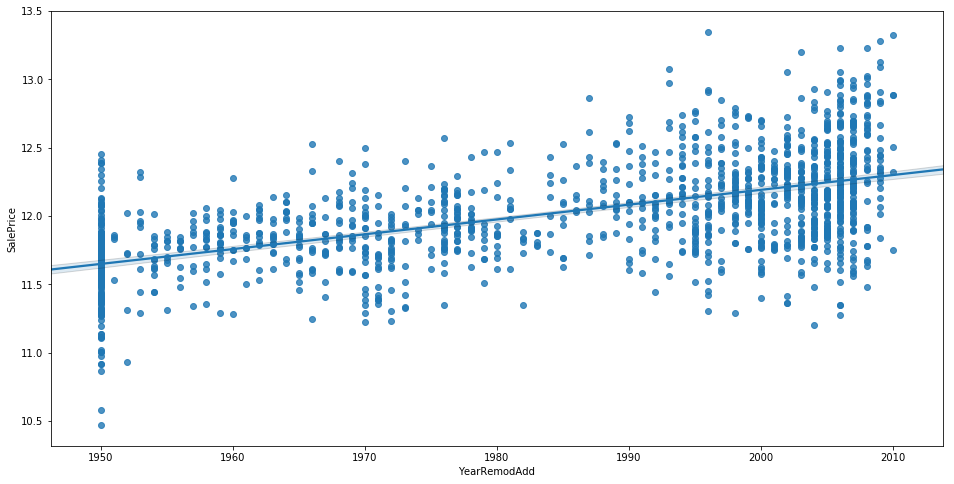

In [102]:
plt.figure(figsize=(16,8))
sns.regplot(x='YearRemodAdd',y='SalePrice',data=aux_DF)

It seems all houses from before 1950 that either were or not remodeled before this date have been given a 1950 date. 

Using this feature may be dangerous as we have no way of knowing if a house was or not remodeled. 

However, let's try and bin them by decade periods and see if any useful information can be gathered.

In [103]:
aux_DF['YearRemodAdd_Bins'] = pd.cut(aux_DF['YearRemodAdd'],bins=6)

In [104]:
aux_DF[['YearRemodAdd_Bins','SalePrice']].groupby('YearRemodAdd_Bins').describe()

SalePrice                                             \
                      count       mean       std        min        25%   
YearRemodAdd_Bins                                                        
(1949.94, 1960.0]     278.0  11.683020  0.296632  10.471978  11.532738   
(1960.0, 1970.0]      146.0  11.848067  0.235063  11.225257  11.728045   
(1970.0, 1980.0]      156.0  11.879359  0.250144  11.231901  11.733469   
(1980.0, 1990.0]       85.0  12.081022  0.292778  11.344519  11.867104   
(1990.0, 2000.0]      282.0  12.145286  0.327233  11.288544  11.944227   
(2000.0, 2010.0]      486.0  12.246385  0.366838  11.198228  11.982755   

                                                    
                         50%        75%        max  
YearRemodAdd_Bins                                   
(1949.94, 1960.0]  11.710142  11.855100  12.452937  
(1960.0, 1970.0]   11.845642  11.989934  12.524421  
(1970.0, 1980.0]   11.894101  12.043118  12.567241  
(1980.0, 1990.0]   12.072547  12.259618  12.861001  
(1990.0, 2000.0]   12.106258  12.347468  13.345509  
(2000.0, 2010.0]   12.233082  12.479437  13.323929

Grouping by bins seem to result in an ordinal feature. Let's convert it into ordinal

In [105]:
mapper = {0:'(1949.94, 1960.0]', 1: '(1960.0, 1970.0]', 2: '(1970.0, 1980.0]', 3: '(1980.0, 1990.0]', 4: '(1990.0, 2000.0]', 5: '(2000.0, 2010.0]'}
ordvar = aux_DF['YearRemodAdd_Bins'].replace(mapper)
#aux_DF['YearRemodAdd_Ord'] = aux_DF['YearRemodAdd_Bins'].replace(mapper)
print(pd.factorize(ordvar))

(array([0, 1, 0, ..., 3, 3, 3], dtype=int64), CategoricalIndex([ (2000.0, 2010.0],  (1970.0, 1980.0],  (1960.0, 1970.0],
                   (1990.0, 2000.0], (1949.94, 1960.0],  (1980.0, 1990.0]],
                 categories=[(1949.94, 1960.0], (1960.0, 1970.0], (1970.0, 1980.0], (1980.0, 1990.0], (1990.0, 2000.0], (2000.0, 2010.0]], ordered=True, dtype='category'))


In [106]:
labels = LabelEncoder()
y = labels.fit_transform(aux_DF['YearRemodAdd_Bins'].values)
y

array([5, 2, 5, ..., 4, 4, 4])

In [107]:
aux_DF['YearRemodAdd'] = labels.fit_transform(aux_DF['YearRemodAdd_Bins'].values)

__MasVnrArea__

Masonry veneer area in square feet.

Veneer is a building technique and is quite usefull for insulation. As it it built on the walls of the house, it should be directly correlated with the house wall area!

In [108]:
aux_DF['MasVnrArea'].corr(aux_DF['SalePrice'])

0.43336662587757174

This feature seems to have some correlation with the SalePrice. Let's plot it again!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


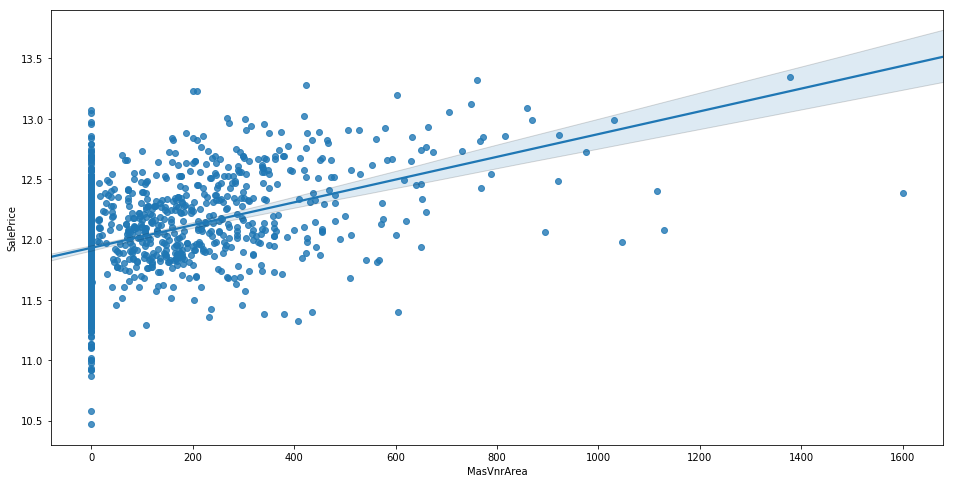

In [109]:
plt.figure(figsize=(16,8))
sns.regplot(x='MasVnrArea',y='SalePrice',data=aux_DF)

From the plot, it isn't clear that an increase in MasVnrArea leads to a higher SalePrice, as variance seems to be quite large!

I will consider that this feature is already represented by GrLivArea (house size) and MasVnrType, which includes the class and existance of Veneer and will therefore drop this feature.

__LowQualFinSF__

Low quality finished square feet (all floors)

In [110]:
aux_DF['LowQualFinSF'].corr(aux_DF['SalePrice'])

-0.02885350158361665

This feature (surprisingly) seems to have very litte correlation with SalePrice! Let's drop it.

__BsmtFullBath BsmtHalfBath FullBath HalfBath__

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

In [111]:
aux_DF[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']].corr()['SalePrice']

BsmtFullBath    0.226716
BsmtHalfBath   -0.022511
FullBath        0.594479
HalfBath        0.314740
SalePrice       1.000000
Name: SalePrice, dtype: float64

Unsurprisingly, bathrooms are correlated with SalePrice. However this is clearly more true in FullBath than the remaining features. Let's use groupby to further explore these features.

In [112]:
aux_DF[['FullBath','SalePrice']].groupby('FullBath').describe()

SalePrice                                                        \
             count       mean       std        min        25%        50%   
FullBath                                                                   
0              9.0  11.810881  0.721186  10.471978  11.598736  11.884496   
1            638.0  11.778495  0.277564  10.579005  11.635152  11.794345   
2            756.0  12.215513  0.321774  10.915107  12.036919  12.188423   
3             30.0  12.619090  0.397540  12.043560  12.237860  12.658590   
4              0.0        NaN       NaN        NaN        NaN        NaN   

                                
                75%        max  
FullBath                        
0         12.176654  12.861001  
1         11.924627  12.955130  
2         12.411693  13.323929  
3         12.932295  13.345509  
4               NaN        NaN

There seem to be 9 houses with no bathrooms above ground. Curiously, the houses that do not have FullBath have larger mean SalePrice than houses with 1 FullBath.

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


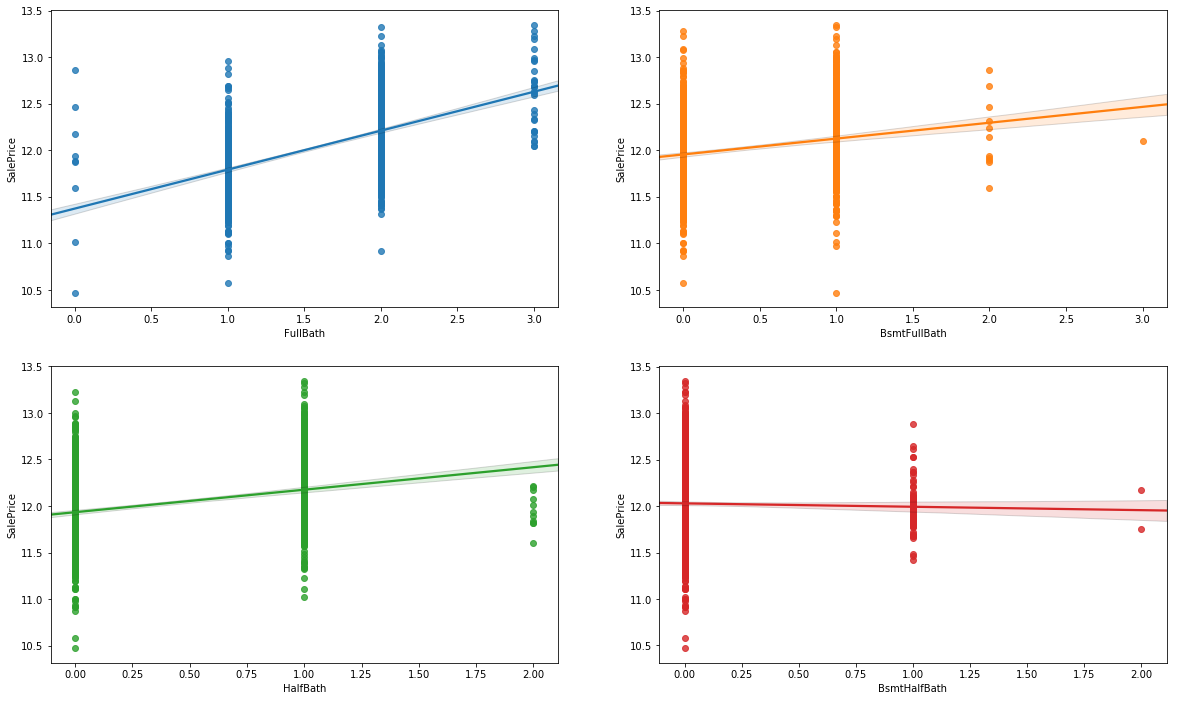

In [113]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='FullBath',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='BsmtFullBath',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='HalfBath',y='SalePrice',data=aux_DF,ax=axs[1,0])
ax = sns.regplot(x='BsmtHalfBath',y='SalePrice',data=aux_DF,ax=axs[1,1])

In [114]:
# As it is a discrete number, let's conserve memory
aux_DF['FullBath'] = aux_DF['FullBath'].astype('uint8')

What about HalfBath?

In [115]:
aux_DF[['HalfBath','SalePrice']].groupby('HalfBath').describe()

SalePrice                                                        \
             count       mean       std        min        25%        50%   
HalfBath                                                                   
0            892.0  11.928124  0.371189  10.471978  11.695047  11.870607   
1            530.0  12.194342  0.354406  11.018646  11.970357  12.149508   
2             11.0  11.962768  0.194616  11.598736  11.831327  11.940400   

                                
                75%        max  
HalfBath                        
0         12.149508  13.226725  
1         12.388398  13.345509  
2         12.124601  12.215037

In [116]:
# As it is a discrete number, let's conserve memory
aux_DF['HalfBath'] = aux_DF['HalfBath'].astype('uint8')

And BsmtFullBath?

In [117]:
aux_DF[['BsmtFullBath','SalePrice']].groupby('BsmtFullBath').describe()

SalePrice                                                        \
                 count       mean       std        min        25%        50%   
BsmtFullBath                                                                   
0.0              839.0  11.952279  0.362208  10.579005  11.711785  11.951187   
1.0              582.0  12.131407  0.394685  10.471978  11.849405  12.085321   
2.0               11.0  12.176564  0.383098  11.598736  11.904540  12.144203   
3.0                1.0  12.095147       NaN  12.095147  12.095147  12.095147   

                                    
                    75%        max  
BsmtFullBath                        
0.0           12.170447  13.275829  
1.0           12.391517  13.345509  
2.0           12.392806  12.861001  
3.0           12.095147  12.095147

In [118]:
# As it is a discrete number, let's conserve memory
aux_DF['BsmtFullBath'] = aux_DF['BsmtFullBath'].astype('uint8')

And BsmtHalfBath?

In [119]:
aux_DF[['BsmtHalfBath','SalePrice']].groupby('BsmtHalfBath').describe()

SalePrice                                                        \
                 count       mean       std        min        25%        50%   
BsmtHalfBath                                                                   
0.0             1353.0  12.028952  0.392007  10.471978  11.771444  12.007628   
1.0               78.0  11.991962  0.260758  11.424105  11.834099  11.971936   
2.0                2.0  11.966267  0.297533  11.755879  11.861073  11.966267   

                                    
                    75%        max  
BsmtHalfBath                        
0.0           12.278398  13.345509  
1.0           12.088136  12.880294  
2.0           12.071460  12.176654

In [120]:
aux_DF['BsmtHalfBath'] = aux_DF['BsmtHalfBath'].astype('uint8')

__BedroomAbvGr KitchenAbvGr TotRoomsAbvGrd__

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

KitchenAbvGr: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [121]:
aux_DF[['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','SalePrice']].corr()['SalePrice']

BedroomAbvGr    0.207638
KitchenAbvGr   -0.157849
TotRmsAbvGrd    0.539639
SalePrice       1.000000
Name: SalePrice, dtype: float64

TotRmsAbvGrd seems to be the most promising feature! But let's explore them all

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


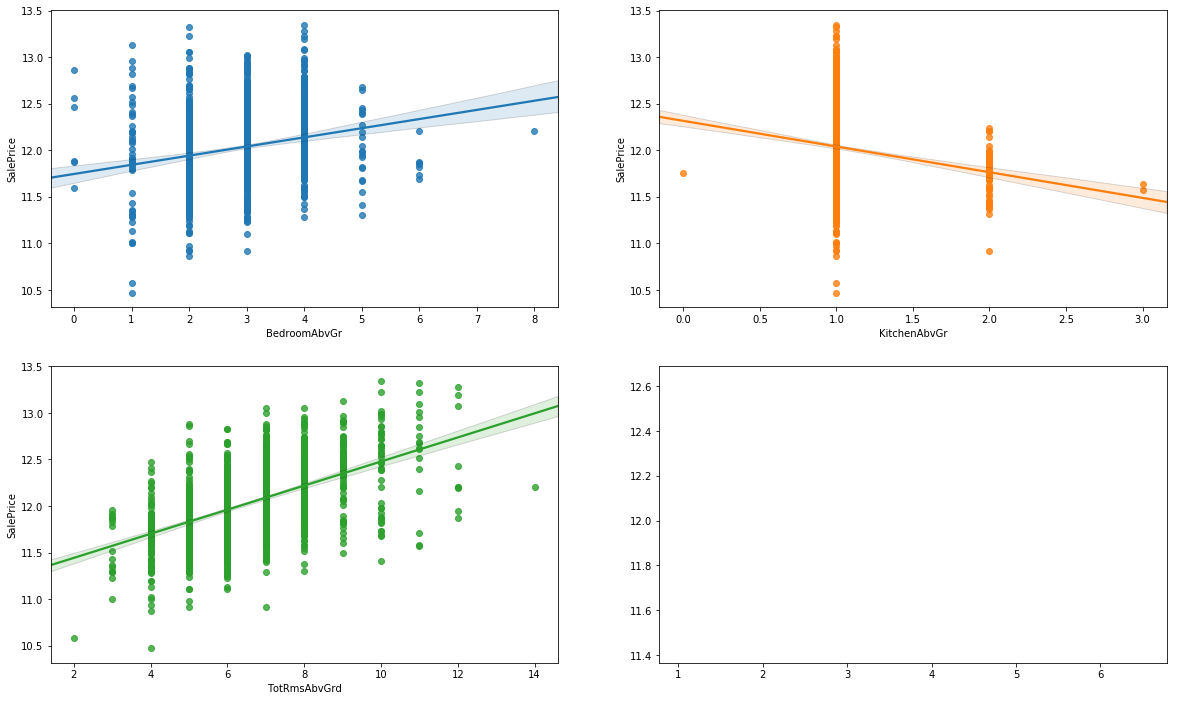

In [122]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='BedroomAbvGr',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='KitchenAbvGr',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='TotRmsAbvGrd',y='SalePrice',data=aux_DF,ax=axs[1,0])

It seems having more than 1 kitchen is undesirable, presumably because it is a space that is uselessly occupied! Let's use these 3 features for our model, in ordinal form.

In [123]:
aux_DF['BedroomAbvGr'] = aux_DF['BedroomAbvGr'].astype('uint8')
aux_DF['KitchenAbvGr'] = aux_DF['KitchenAbvGr'].astype('uint8')
aux_DF['TotRmsAbvGrd'] = aux_DF['TotRmsAbvGrd'].astype('uint8')

__Fireplaces__

Fireplaces: Number of fireplaces

In [124]:
aux_DF[['Fireplaces','SalePrice']].groupby('Fireplaces').describe()

SalePrice                                                        \
               count       mean       std        min        25%        50%   
Fireplaces                                                                   
0              680.0  11.819382  0.308378  10.471978  11.635152  11.817656   
1              644.0  12.203441  0.346339  11.002117  11.970357  12.154785   
2              105.0  12.270016  0.376767  11.512935  11.982935  12.215037   
3                4.0  12.482680  0.336634  12.154785  12.211774  12.491036   
4                0.0        NaN       NaN        NaN        NaN        NaN   

                                  
                  75%        max  
Fireplaces                        
0           12.013707  12.744447  
1           12.448729  13.345509  
2           12.509878  13.323929  
3           12.761942  12.793862  
4                 NaN        NaN

This is a good discrete feature. Let's use it!

In [125]:
aux_DF['Fireplaces'] = aux_DF['Fireplaces'].astype('uint8')

__GarageYrBuilt GarageCars GarageArea__

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


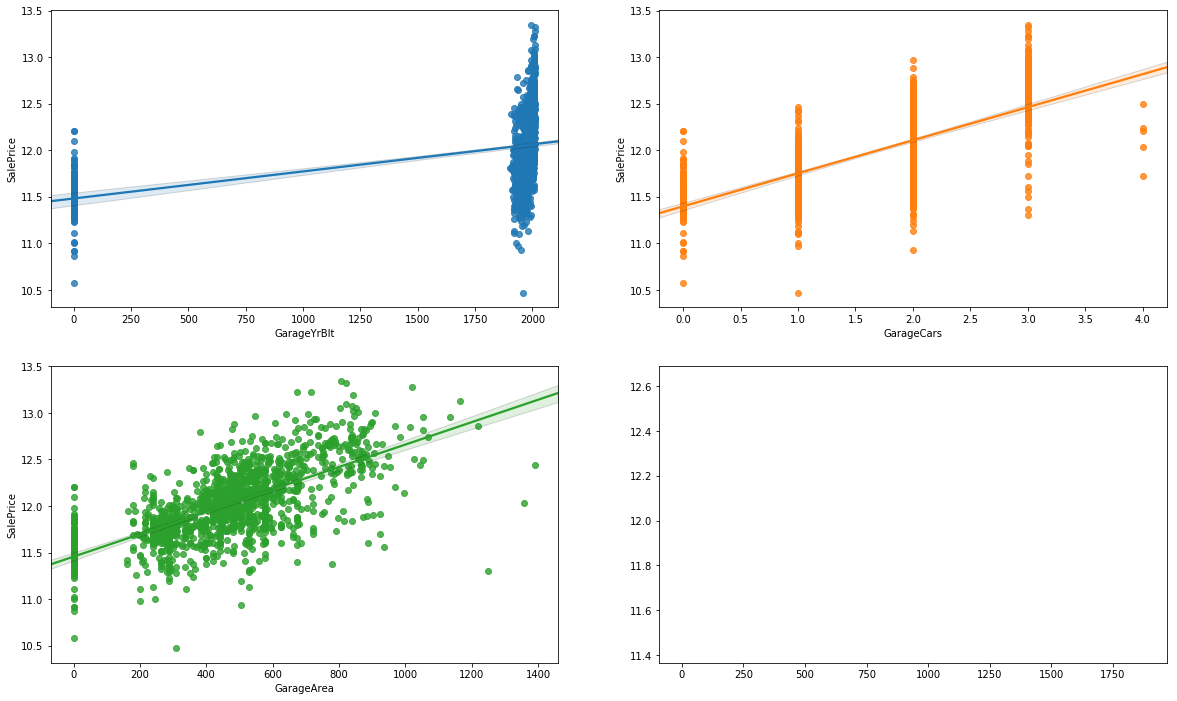

In [126]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='GarageYrBlt',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='GarageCars',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='GarageArea',y='SalePrice',data=aux_DF,ax=axs[1,0])

GarageArea and Garage Cars have a similar correlation to SalePrice and also seem to have a very high correlation between them.

This is logical as the larger the garage is, the more cars can be fit into it. GarageCars seems therefore to be redundant and may be dropped.

In [127]:
aux_DF[['GarageArea','GarageCars']].corr()

GarageArea  GarageCars
GarageArea     1.00000     0.89106
GarageCars     0.89106     1.00000

There are several houses without a garage!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


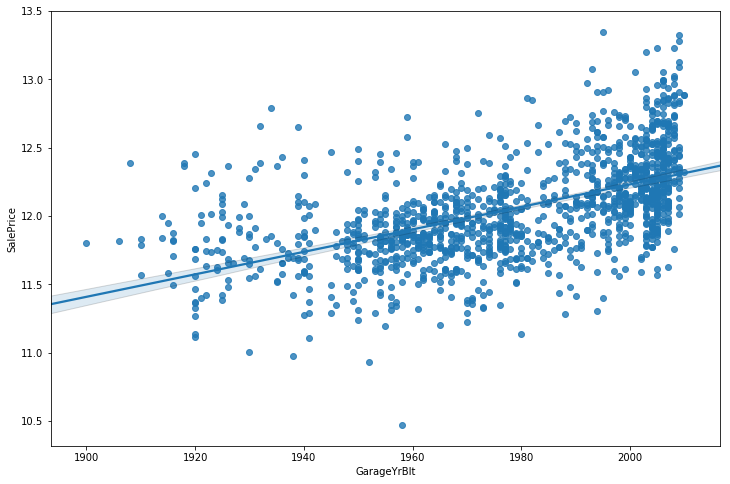

In [128]:
filt = aux_DF['GarageYrBlt'] > 0

plt.figure(figsize=(12,8))
sns.regplot(x=aux_DF[filt]['GarageYrBlt'],y=aux_DF[filt]['SalePrice'])

This feature should be divided into bins, None, Old, Modern.

In [129]:
aux = aux_DF['GarageYrBlt'].copy()

In [130]:
filt = aux_DF['GarageYrBlt'] == 0
aux[filt] = 'None'

In [131]:
filt = ((aux_DF['GarageYrBlt'] < 1990) & (aux_DF['GarageYrBlt'] > 0))
aux[filt] = 'Old'

In [132]:
filt = aux_DF['GarageYrBlt'] >= 1990
aux[filt] = 'Modern'

In [133]:
aux_DF['GarageYrBlt'] = aux

In [134]:
aux_DF[['GarageYrBlt','SalePrice']].groupby('GarageYrBlt').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
GarageYrBlt                                                                   
Modern          592.0  12.290463  0.325565  11.302217  12.080084  12.264346   
None             75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
Old             766.0  11.872130  0.292672  10.471978  11.699413  11.849405   

                                   
                   75%        max  
GarageYrBlt                        
Modern       12.491255  13.345509  
None         11.739998  12.208575  
Old          12.031576  12.861001

In [135]:
aux_DF['GarageYrBlt'].head()

0    Modern
1       Old
2    Modern
3    Modern
4    Modern
Name: GarageYrBlt, dtype: object

In [136]:
mapper = {'None':0,'Old':1,'Modern':2}
aux_DF['GarageYrBlt'] = aux_DF['GarageYrBlt'].replace(mapper)

In [137]:
aux_DF['GarageYrBlt'].head()

0    2
1    1
2    2
3    2
4    2
Name: GarageYrBlt, dtype: int64

__Pool Area__

PoolArea: Pool area in square feet

In [138]:
aux_DF[['PoolArea','SalePrice']].corr()['PoolArea']

PoolArea     1.000000
SalePrice    0.041348
Name: PoolArea, dtype: float64

In [139]:
aux_DF[aux_DF['PoolArea']>0]['PoolArea'].count()

11

It seems there are only 12 houses with Pools!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


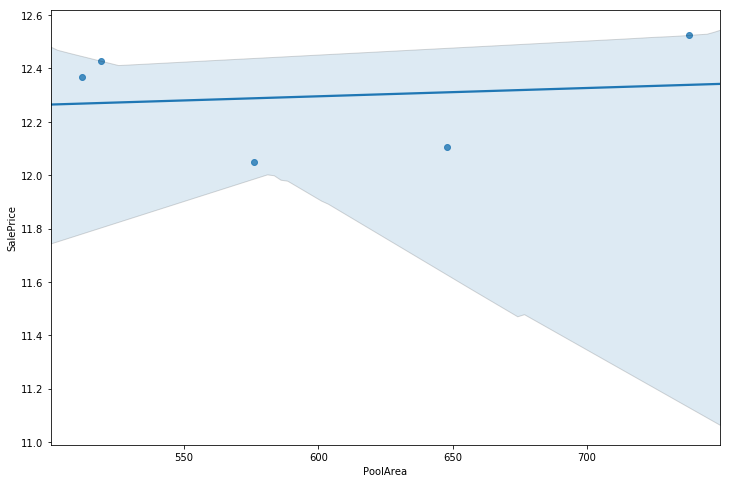

In [140]:
filt = aux_DF['PoolArea'] > 0

plt.figure(figsize=(12,8))
sns.regplot(x=aux_DF[filt]['PoolArea'],y=aux_DF[filt]['SalePrice'])

This feature does not seem to be useful and NoPoll information is already captured in PoolQC, so this will be dropped!

__MiscVal__

MiscVal: $Value of miscellaneous feature

What is this feature? What $value is this and how is it determined? Should it be added to the final SalePrice predictions directly?

In [141]:
aux_DF['MiscVal'].describe()

count     2892.000000
mean        41.791494
std        465.256360
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


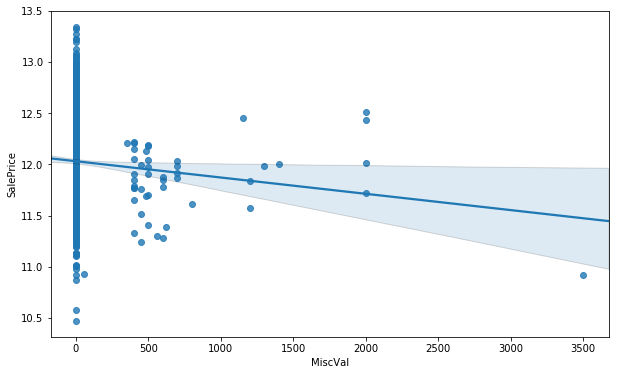

In [142]:
plt.figure(figsize=(10,6))
sns.regplot(x=aux_DF['MiscVal'], y=aux_DF['SalePrice'])

There seem to be (at least) 3 outliers! What does the feature look like without them?

In [143]:
aux = aux_DF[aux_DF['MiscVal'] <3000]

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


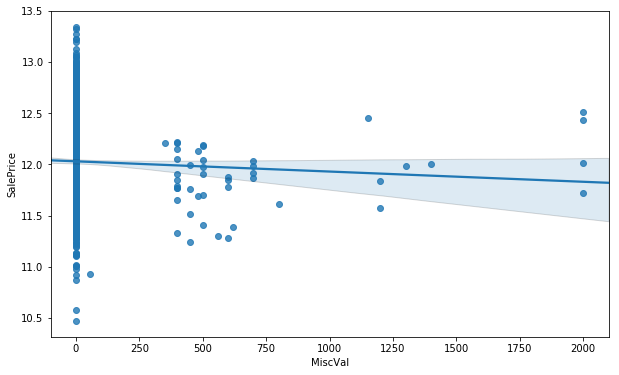

In [144]:
plt.figure(figsize=(10,6))
sns.regplot(x=aux['MiscVal'], y=aux['SalePrice'])

In [145]:
#Delete auxiliary DataFrame
del aux

This feature in numerical form does not seem to be particularly useful. How about in binary form?

In [146]:
aux_DF['aux'] = (aux_DF['MiscVal'] > 0).astype('uint')

In [147]:
aux_DF[['aux','SalePrice']].groupby('aux').describe()

SalePrice                                                        \
        count       mean       std        min        25%        50%   
aux                                                                   
0      1386.0  12.033629  0.385048  10.471978  11.775778  12.012767   
1        47.0  11.826972  0.358415  10.915107  11.671797  11.870607   

                           
           75%        max  
aux                        
0    12.278398  13.345509  
1    12.039128  12.513561

We'll use it in binary form!

In [148]:
aux_DF['MiscVal'] = aux_DF['aux']
aux_DF['MiscVal'].astype('uint8')
aux_DF.drop('aux',axis=1,inplace=True)

__MoSold YrSold__

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(11.8, 12.25)

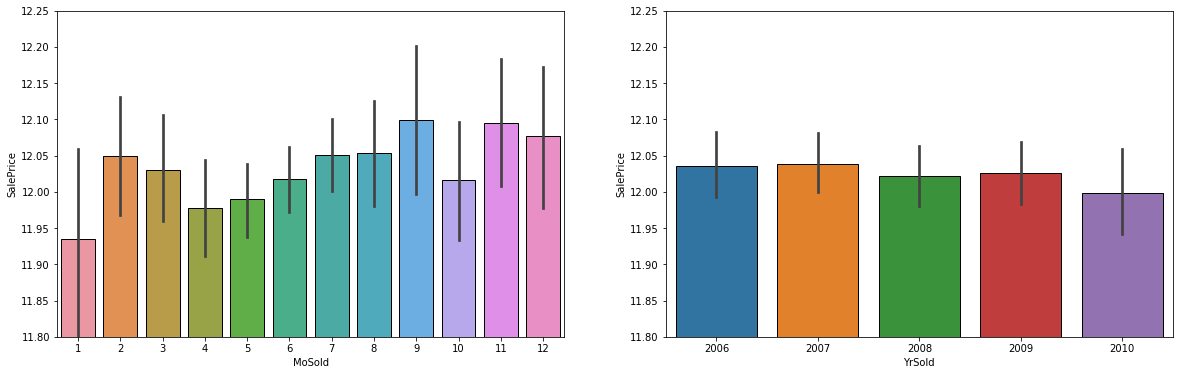

In [149]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.barplot(x=aux_DF['MoSold'],y=aux_DF['SalePrice'],ax=ax1)
sns.barplot(x=aux_DF['YrSold'],y=aux_DF['SalePrice'],ax=ax2)
ax1.set_ylim(11.8,12.25)
ax2.set_ylim(11.8,12.25)

MoSold sugests that the Month in which the house was sold influences the SalePrice feature. The number of houses sold in each month also varies greatly which can explain some of the variability as the number of houses may not be enough to eliminate randomness from the results.

In [150]:
aux_DF.groupby('MoSold')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MoSold                                                                
1        56.0  11.934900  0.512076  10.579005  11.658614  11.898102   
2        51.0  12.049977  0.292962  11.440366  11.766399  12.063939   
3       106.0  12.030140  0.412049  10.868587  11.803504  12.015165   
4       139.0  11.977064  0.386151  11.133143  11.736045  11.898195   
5       202.0  11.989475  0.365518  11.134604  11.760768  11.944714   
6       247.0  12.017027  0.351623  10.933000  11.816727  12.001512   
7       230.0  12.050840  0.388468  10.915107  11.804726  12.016430   
8       119.0  12.053942  0.391442  11.104972  11.747998  12.066241   
9        63.0  12.098567  0.419759  11.112463  11.813037  12.132970   
10       86.0  12.016702  0.386421  10.471978  11.819304  11.973511   
11       78.0  12.095552  0.401719  11.112463  11.778166  12.063934   
12       56.0  12.076376  0.379340  11.320566  11.836708  12.092346   

              75%        max  
MoSold                        
1       12.276062  13.275829  
2       12.266400  12.676079  
3       12.209038  13.323929  
4       12.225378  13.226725  
5       12.226787  12.971543  
6       12.214770  13.195616  
7       12.268935  13.345509  
8       12.387325  12.962197  
9       12.352683  13.049795  
10      12.215571  12.991756  
11      12.383175  13.008662  
12      12.385267  12.736704

Let's transform MoSold into a categorical feature.

In [151]:
aux_DF['MoSold'] = aux_DF['MoSold'].astype('category')

YrSold also seems to be related with SalePrice, as would be expected. In this case, we can see that 2007 was a peak (pre-housing market crisis in the USA), with house prices reducing annualy from then on.

In [152]:
aux_DF.groupby('YrSold')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
YrSold                                                                
2006    311.0  12.036293  0.392447  10.471978  11.788653  12.007628   
2007    319.0  12.038886  0.375802  10.579005  11.771444  12.013707   
2008    300.0  12.021802  0.367732  10.915107  11.800894  12.013707   
2009    330.0  12.025858  0.394993  11.002117  11.761545  12.011886   
2010    173.0  11.998339  0.407442  10.915107  11.759793  11.951187   

              75%        max  
YrSold                        
2006    12.293874  13.345509  
2007    12.283028  13.053015  
2008    12.240479  13.008662  
2009    12.269052  13.275829  
2010    12.269052  13.323929

In [153]:
#aux_DF['YrSold'] = (aux_DF['YrSold'] < 2008).astype('uint8')

In [154]:
aux_DF['YrSold'] = aux_DF['YrSold'].astype('category')
#aux_DF['YrSold'] = (aux_DF['YrSold'] < 2008).astype('uint8')

### Categorical Features

In [155]:
aux_DF.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

__MSZoning__

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

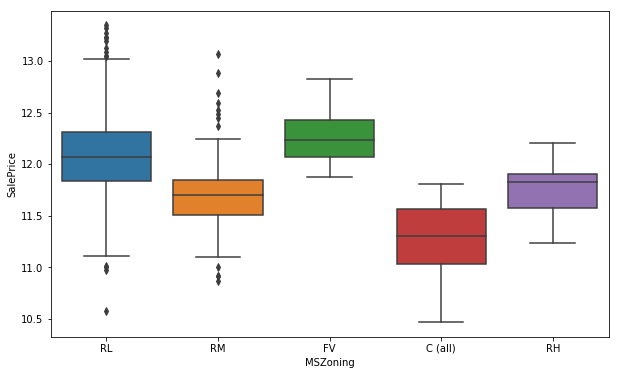

In [156]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['MSZoning'],y=aux_DF['SalePrice'])

In [157]:
aux_DF['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH'], dtype=object)

Turns out the properties are only in 5 different categories, RL (Residencial Low Density), RM (Residencial Medium Density), C (Commercial), FV (Floating Village Residencial) and RH (Residential High Density).

In [158]:
aux_DF.groupby('MSZoning')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MSZoning                                                                 
C (all)      7.0  11.253629  0.452728  10.471978  11.033071  11.302217   
FV          65.0  12.246621  0.231114  11.878631  12.066816  12.235394   
RH          16.0  11.749848  0.289182  11.238502  11.572521  11.823758   
RL        1128.0  12.086139  0.366100  10.579005  11.834835  12.066816   
RM         217.0  11.698202  0.306453  10.868587  11.512935  11.699413   

                75%        max  
MSZoning                        
C (all)   11.565106  11.804856  
FV        12.429220  12.823631  
RH        11.908220  12.206078  
RL        12.317730  13.345509  
RM        11.849405  13.071072

Let's keep all the features for OHE.

__Street__

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

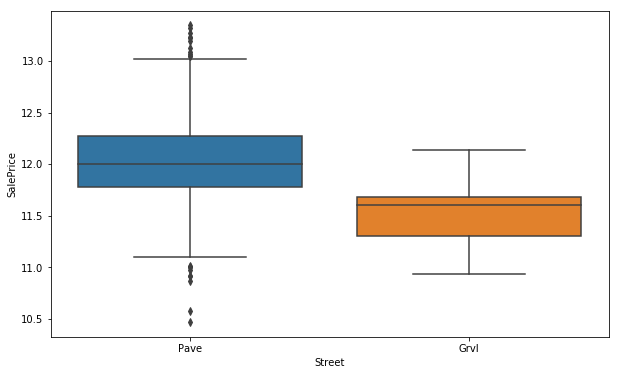

In [159]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Street'],y=aux_DF['SalePrice'])

In [160]:
aux_DF['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [161]:
aux_DF['Street'] = (aux_DF['Street']=='Pave').astype('uint8')

There are only 2 options, Paved and Gravel. It is also clear that this feature is relevant, therefore it will be combined into a binary feature.

__Alley__

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

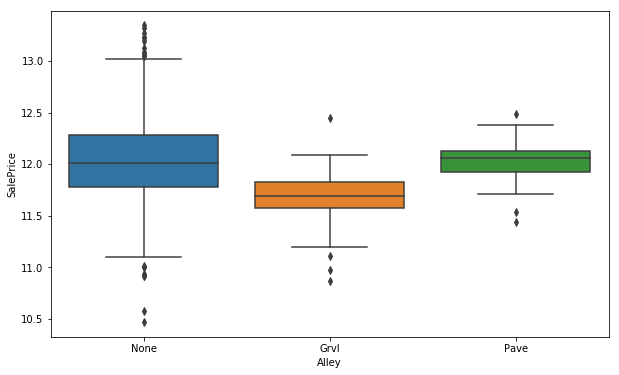

In [162]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Alley'],y=aux_DF['SalePrice'])

This feature will be used in OHE form.

__LotShape__

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

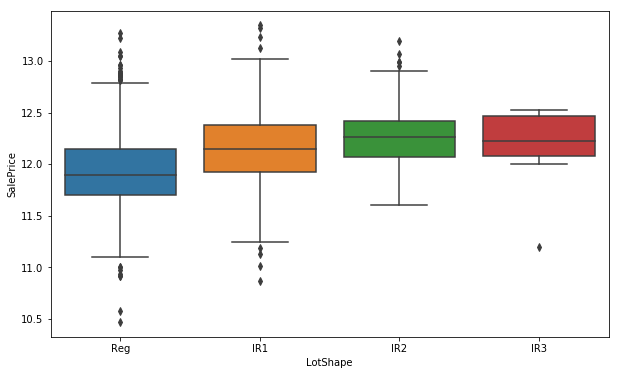

In [163]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LotShape'],y=aux_DF['SalePrice'])

In [164]:
aux_DF.groupby('LotShape')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LotShape                                                                
IR1       472.0  12.164972  0.359799  10.868587  11.920893  12.152146   
IR2        39.0  12.305299  0.366158  11.608245  12.069682  12.264346   
IR3         8.0  12.154571  0.431447  11.198228  12.080837  12.222191   
Reg       914.0  11.942526  0.373205  10.471978  11.700449  11.893078   

                75%        max  
LotShape                        
IR1       12.384223  13.345509  
IR2       12.416122  13.195616  
IR3       12.472192  12.523530  
Reg       12.144203  13.275829

There seems to be a preference for irregularity, as evidenced by rising mean and reducing Std (as IR3 only has 8 entries, it will be combined with IR2). 

This feature could therefore be converted to ordinal!

In [165]:
aux_DF.loc[aux_DF['LotShape'] == 'IR3','LotShape'] = 'IR2'

In [166]:
aux_DF.groupby('LotShape')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LotShape                                                                
IR1       472.0  12.164972  0.359799  10.868587  11.920893  12.152146   
IR2        47.0  12.279643  0.377307  11.198228  12.069682  12.264346   
Reg       914.0  11.942526  0.373205  10.471978  11.700449  11.893078   

                75%        max  
LotShape                        
IR1       12.384223  13.345509  
IR2       12.425204  13.195616  
Reg       12.144203  13.275829

In [167]:
aux_DF['LotShape'].head()

0    Reg
1    Reg
2    IR1
3    IR1
4    IR1
Name: LotShape, dtype: object

In [168]:
#Converting to Ordinal form
mapper = {'Reg':0, 'IR1':1, 'IR2':2}
aux_DF['LotShape'] = aux_DF['LotShape'].replace(mapper)
aux_DF['LotShape'] = aux_DF['LotShape'].astype('uint8')

__LandContour LandSlope__

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

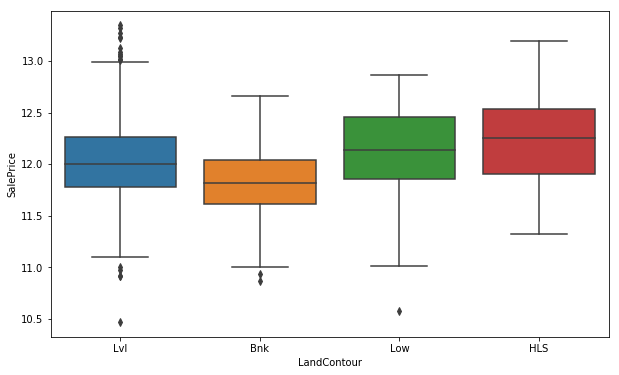

In [169]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LandContour'],y=aux_DF['SalePrice'])

In [170]:
aux_DF.groupby('LandContour')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LandContour                                                                 
Bnk            60.0  11.799741  0.364990  10.868587  11.615032  11.821885   
HLS            48.0  12.244642  0.439596  11.320566  11.904905  12.256226   
Low            31.0  12.062114  0.502857  10.579005  11.856422  12.141539   
Lvl          1294.0  12.028459  0.376466  10.471978  11.775297  12.003043   

                   75%        max  
LandContour                        
Bnk          12.041215  12.660331  
HLS          12.532108  13.195616  
Low          12.460689  12.861001  
Lvl          12.264346  13.345509

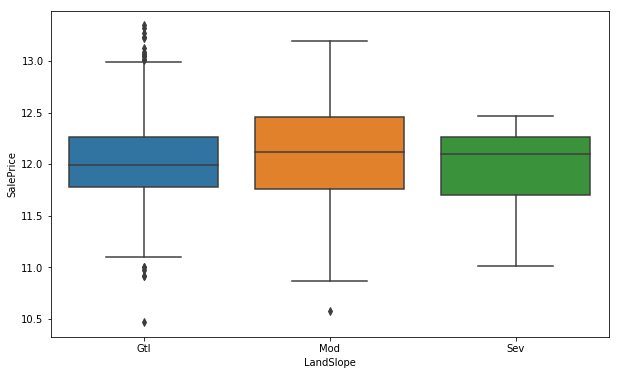

In [171]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LandSlope'],y=aux_DF['SalePrice'])

In [172]:
aux_DF.groupby('LandSlope')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LandSlope                                                                 
Gtl        1362.0  12.025335  0.379309  10.471978  11.775297  11.996899   
Mod          64.0  12.069596  0.498642  10.579005  11.763484  12.117600   
Sev           7.0  11.931131  0.505158  11.018646  11.703684  12.100718   

                 75%        max  
LandSlope                        
Gtl        12.267523  13.345509  
Mod        12.456331  13.195616  
Sev        12.261373  12.468441

In [173]:
aux_DF.groupby(['LandContour','LandSlope'])['SalePrice'].describe()

count       mean       std        min        25%  \
LandContour LandSlope                                                      
Bnk         Gtl          45.0  11.823300  0.311928  11.002117  11.685693   
            Mod          15.0  11.729063  0.498481  10.868587  11.451004   
HLS         Gtl          31.0  12.277373  0.416543  11.320566  12.021117   
            Mod          16.0  12.208201  0.492377  11.540317  11.776354   
            Sev           1.0  11.813037       NaN  11.813037  11.813037   
Low         Gtl           9.0  11.964955  0.495010  11.302217  11.719948   
            Mod          17.0  12.125316  0.506364  10.579005  11.931642   
            Sev           5.0  12.022110  0.583596  11.018646  12.100718   
Lvl         Gtl        1277.0  12.026761  0.376136  10.471978  11.775297   
            Mod          16.0  12.191039  0.375163  11.512935  11.993608   
            Sev           1.0  11.594330       NaN  11.594330  11.594330   

                             50%        75%        max  
LandContour LandSlope                                   
Bnk         Gtl        11.845110  11.979805  12.388398  
            Mod        11.681832  12.064831  12.660331  
HLS         Gtl        12.321635  12.571517  12.991756  
            Mod        12.253733  12.428655  13.195616  
            Sev        11.813037  11.813037  11.813037  
Low         Gtl        11.870607  12.278398  12.861001  
            Mod        12.154785  12.468441  12.665398  
            Sev        12.128117  12.394629  12.468441  
Lvl         Gtl        12.001512  12.264346  13.345509  
            Mod        12.138066  12.474573  12.850557  
            Sev        11.594330  11.594330  11.594330

The vast majority of lots has Gentle LandSlope, with only a few having Moderate or Severe slopes.

LandSlope is also not entirely ordinal, as some terrains have higher value with more severe slopes and others with more gentle slopes. Let's drop this feature.

Low and Lvl houses seem to be relatively similar and will therefore be grouped into the same category, Lvl.

In [174]:
aux_DF.loc[aux_DF['LandContour'] == 'Low','LandContour'] = 'Lvl'

In [175]:
aux_DF.groupby('LandContour')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LandContour                                                                 
Bnk            60.0  11.799741  0.364990  10.868587  11.615032  11.821885   
HLS            48.0  12.244642  0.439596  11.320566  11.904905  12.256226   
Lvl          1325.0  12.029246  0.379689  10.471978  11.777219  12.007628   

                   75%        max  
LandContour                        
Bnk          12.041215  12.660331  
HLS          12.532108  13.195616  
Lvl          12.270225  13.345509

These 3 features will be OHE!

__LotConfig__

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac (dead-end street)
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

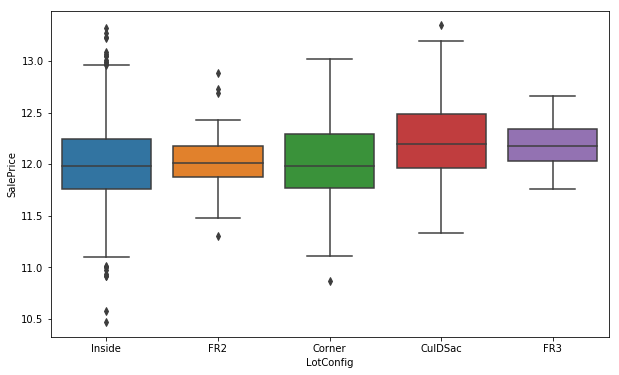

In [176]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LotConfig'],y=aux_DF['SalePrice'])

In [177]:
aux_DF.groupby('LotConfig')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LotConfig                                                                 
Corner      258.0  12.017402  0.371758  10.868587  11.768543  11.982935   
CulDSac      91.0  12.246201  0.360883  11.338584  11.963671  12.195522   
FR2          47.0  12.034748  0.329052  11.302217  11.873605  12.013707   
FR3           4.0  12.195689  0.371174  11.759793  12.031563  12.181316   
Inside     1033.0  12.008875  0.388433  10.471978  11.763692  11.982935   

                 75%        max  
LotConfig                        
Corner     12.291106  13.021329  
CulDSac    12.488378  13.345509  
FR2        12.178189  12.885673  
FR3        12.345442  12.660331  
Inside     12.242891  13.323929

From the Boxplot and LotConfig stats, we can see that Inside and Corner lots seem to have similar characteristics. Let's group them into the, all into a new category "Inside_or_Corner". 

Regarding FR3, there are only 4 instances of this feature so to reduce the number of features, these features will be grouped with CulDSac with whom it seems most similar.

In [178]:
aux_DF.loc[aux_DF['LotConfig'] == 'FR3','LotConfig'] = 'CulDSac'
aux_DF.loc[(aux_DF['LotConfig'] == 'Corner') | (aux_DF['LotConfig'] == 'Inside'),'LotConfig'] = 'Inside_or_Corner'

__Neighborhood__

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

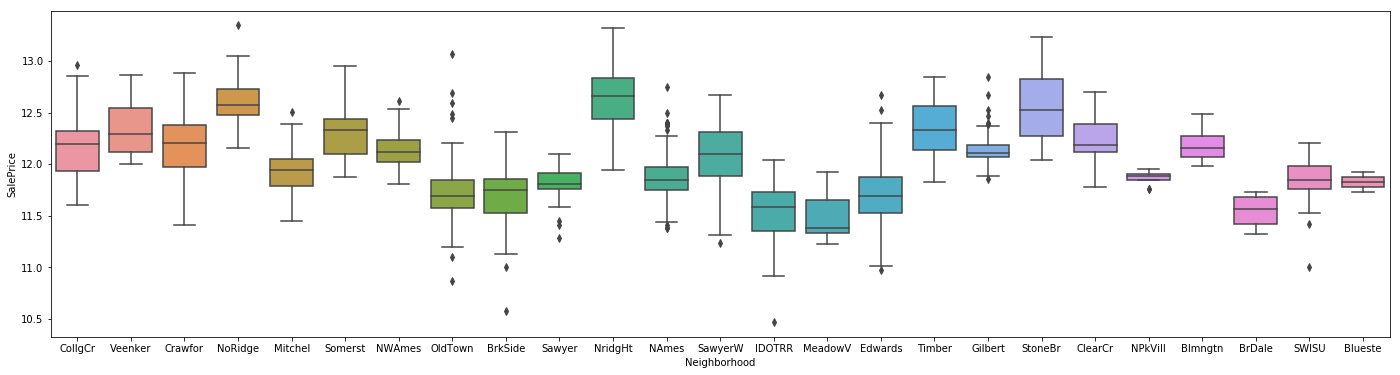

In [179]:
plt.figure(figsize=(24,6))
sns.boxplot(x=aux_DF['Neighborhood'],y=aux_DF['SalePrice'])

In [180]:
aux_DF['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Neighborhood is a feature that appears to be highly influencial for the SalePrice, as would be expected. However, there are 25 different Neighborhoods, which would result in 25 different features if we were to OHE it directly!

Perhaps some may be grouped together while maintaining most variance?

In [181]:
group_neig = aux_DF.groupby('Neighborhood')['SalePrice'].describe().sort_values(['count'], ascending=False)

In [182]:
group_neig

count       mean       std        min        25%        50%  \
Neighborhood                                                                
NAmes         223.0  11.868028  0.207356  11.379406  11.753915  11.849405   
CollgCr       150.0  12.163647  0.254457  11.608245  11.937872  12.191972   
OldTown       111.0  11.720005  0.302045  10.868587  11.572382  11.694422   
Edwards        97.0  11.712580  0.302405  10.976799  11.532738  11.695255   
Somerst        85.0  12.301186  0.237802  11.878631  12.097379  12.328295   
Gilbert        79.0  12.155809  0.159985  11.856522  12.066816  12.106258   
NridgHt        77.0  12.619415  0.302870  11.944714  12.442306  12.660331   
Sawyer         72.0  11.817407  0.151960  11.289794  11.757833  11.813037   
NWAmes         72.0  12.141865  0.175935  11.813037  12.027001  12.122408   
SawyerW        59.0  12.090695  0.312043  11.238502  11.887885  12.100162   
BrkSide        57.0  11.694134  0.331419  10.579005  11.532738  11.751950   
Crawfor        50.0  12.200935  0.325331  11.411457  11.975871  12.207885   
Mitchel        48.0  11.946234  0.211980  11.445727  11.790083  11.949540   
NoRidge        39.0  12.632321  0.218609  12.154785  12.481796  12.577640   
Timber         35.0  12.361503  0.255957  11.831386  12.139402  12.337105   
IDOTRR         34.0  11.503764  0.342516  10.471978  11.351808  11.582903   
SWISU          25.0  11.838442  0.259865  11.002117  11.759793  11.845827   
StoneBr        24.0  12.573259  0.354062  12.043560  12.269634  12.529955   
ClearCr        24.0  12.214759  0.215050  11.775297  12.121267  12.185667   
Blmngtn        17.0  12.169421  0.148151  11.982279  12.066816  12.160034   
MeadowV        17.0  11.474533  0.220338  11.225257  11.332614  11.385103   
BrDale         16.0  11.547874  0.139500  11.326608  11.418580  11.571204   
Veenker        11.0  12.344180  0.288925  11.998439  12.123943  12.292255   
NPkVill         9.0  11.866484  0.067361  11.755879  11.849405  11.891369   
Blueste         2.0  11.826543  0.139298  11.728045  11.777294  11.826543   

                    75%        max  
Neighborhood                        
NAmes         11.973511  12.751303  
CollgCr       12.327075  12.959541  
OldTown       11.849405  13.071072  
Edwards       11.881042  12.676079  
Somerst       12.441149  12.955130  
Gilbert       12.191885  12.841328  
NridgHt       12.832014  13.323929  
Sawyer        11.914305  12.100718  
NWAmes        12.230770  12.610874  
SawyerW       12.312624  12.676079  
BrkSide       11.860062  12.317171  
Crawfor       12.380004  12.880294  
Mitchel       12.049425  12.509878  
NoRidge       12.732273  13.345509  
Timber        12.561041  12.843974  
IDOTRR        11.729905  12.040614  
SWISU         11.982935  12.206078  
StoneBr       12.831279  13.229570  
ClearCr       12.388398  12.700772  
Blmngtn       12.271350  12.485831  
MeadowV       11.652696  11.927687  
BrDale        11.678448  11.736077  
Veenker       12.548760  12.861001  
NPkVill       11.908347  11.951187  
Blueste       11.875793  11.925042

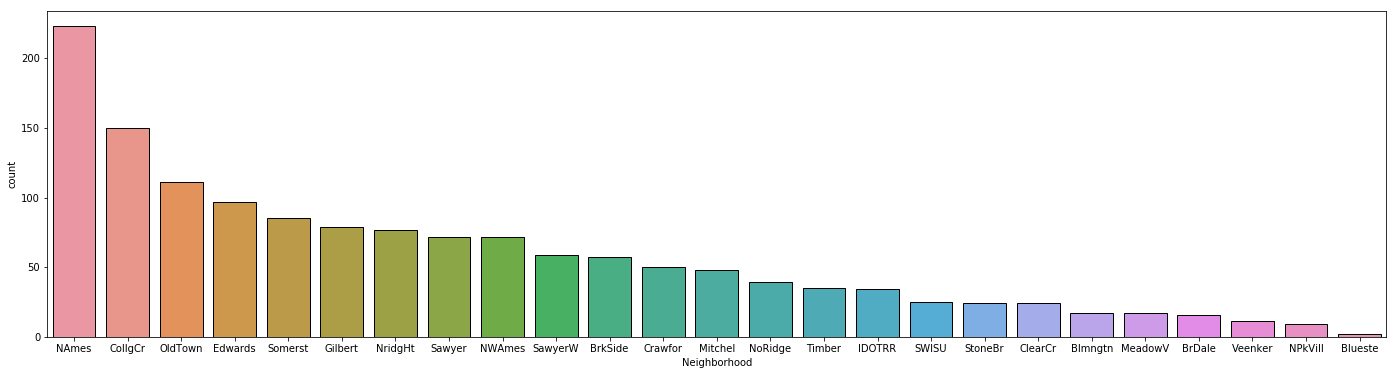

In [183]:
#Plot using Count, descending order
plt.figure(figsize=(24,6))
sns.barplot(x=group_neig.index,y=group_neig['count'])
#plt.ylim(11.2,12.7)

In [184]:
group_neig = aux_DF.groupby('Neighborhood')['SalePrice'].describe().sort_values(['50%'], ascending=False)

(11.2, 12.7)

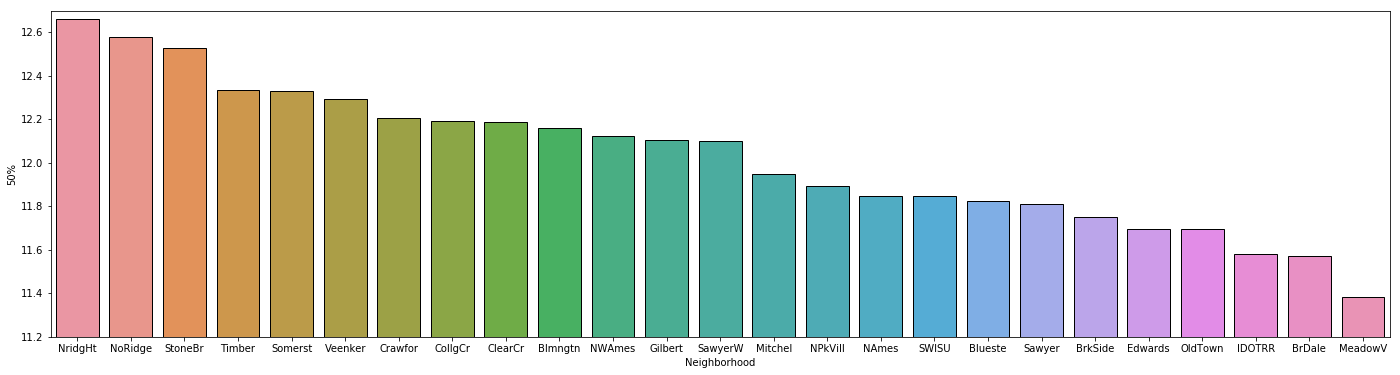

In [185]:
#Plot using Median, descending order
plt.figure(figsize=(24,6))
sns.barplot(x=group_neig.index,y=group_neig['50%'])
plt.ylim(11.2,12.7)

Let's group some of the neighborhoods with similar median with each other, to reduce future number of OHE features!

In [186]:
#Grouping Timber with Somerst, CollgCr with ClearCr, Gilbert with SawyerW with NWAmes,NAmes with SWISU,Edwards with OldTown, Blueste with Sawyer
aux_dict = {'Timber':'Timber_Somerst','Somerst':'Timber_Somerst','CollgCr':'CollgCr_ClearCr','ClearCr':'CollgCr_ClearCr','NWAmes':'NWAmes_Gilbert_SawyerW',\
            'Gilbert':'NWAmes_Gilbert_SawyerW','SawyerW':'NWAmes_Gilbert_SawyerW','NAmes':'NAmes_SWISU','SWISU':'NAmes_SWISU','Edwards':'Edwards_OldTown',\
            'OldTown':'Edwards_OldTown','Blueste':'Blueste_Sawyer','Sawyer':'Blueste_Sawyer'}

In [187]:
aux_DF['Neighborhood'].replace(to_replace=aux_dict,inplace=True)

In [188]:
group_neig = aux_DF.groupby('Neighborhood')['SalePrice'].describe().sort_values(['50%'], ascending=False)

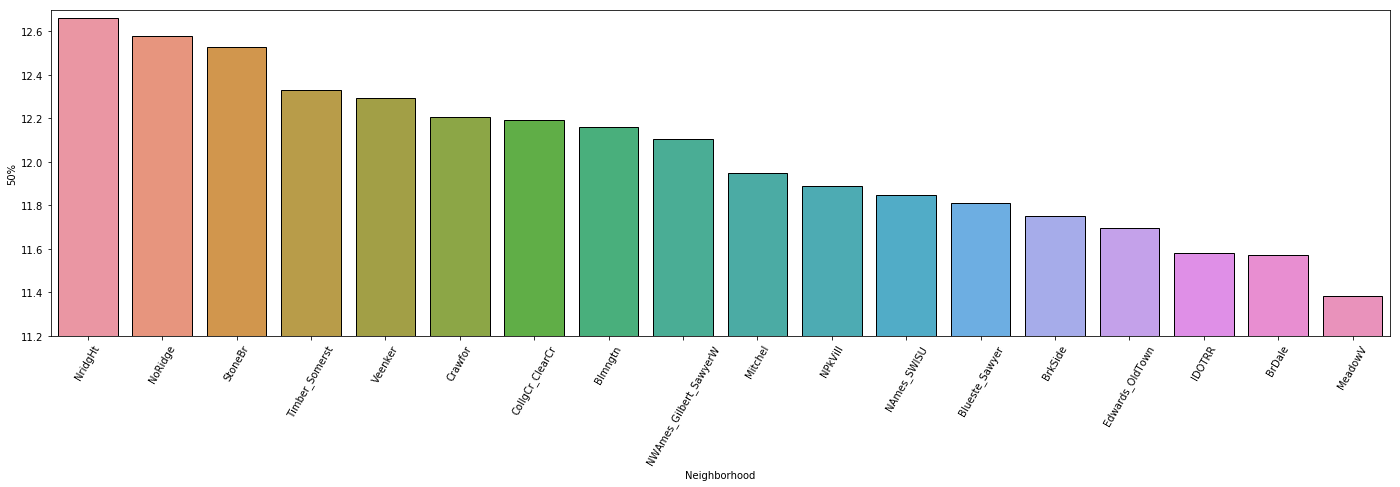

In [189]:
#Plot using Median, descending order
ax = plt.figure(figsize=(24,6))
ax = sns.barplot(x=group_neig.index,y=group_neig['50%'])
plt.ylim(11.2,12.7)
a =plt.setp(ax.get_xticklabels(), rotation=60)

These remaining features will be OHE.

__Condition1 Condition2__

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [190]:
aux_DF['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [191]:
aux_DF['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosA', 'PosN', 'RRAn'],
      dtype=object)

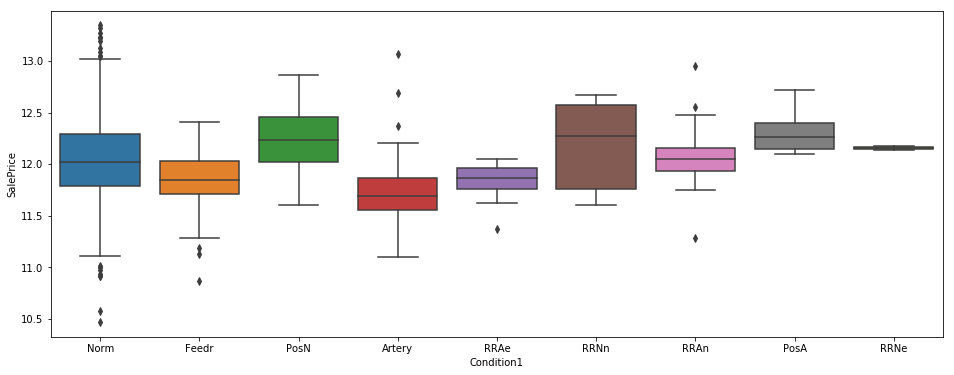

In [192]:
plt.figure(figsize=(16,6))
sns.boxplot(x=aux_DF['Condition1'],y=aux_DF['SalePrice'])

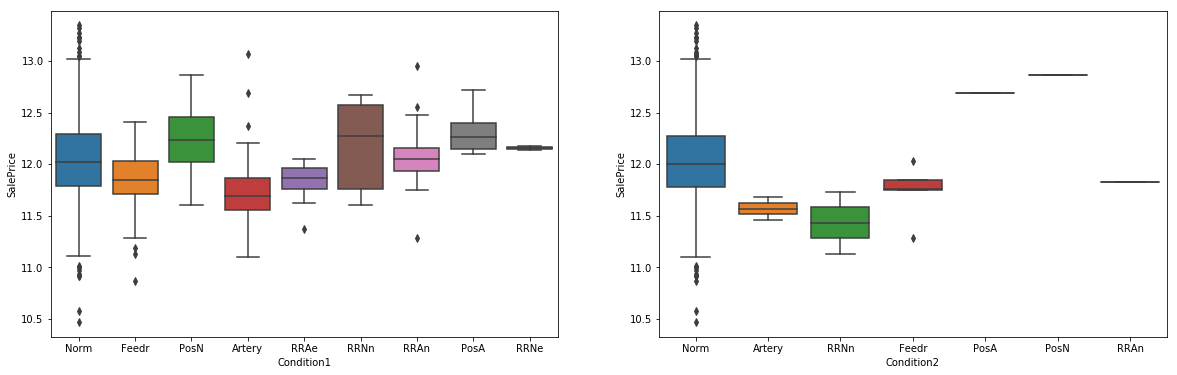

In [193]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['Condition1'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['Condition2'],y=aux_DF['SalePrice'],ax=ax2)

In [194]:
aux_DF[aux_DF['Condition1'] == 'Norm']['Condition2'].unique()

array(['Norm'], dtype=object)

Norm seems to be the default value i.e., a house that is does not have one distinguishing condition (or a second) is considered Norm, Norm.

In [195]:
aux_DF.groupby(['Condition1','Condition2'])['SalePrice'].describe()

count       mean       std        min        25%  \
Condition1 Condition2                                                      
Artery     Artery         2.0  11.570046  0.153305  11.461643  11.515844   
           Norm          45.0  11.728283  0.327942  11.104972  11.561725   
           PosA           1.0  12.691584       NaN  12.691584  12.691584   
Feedr      Artery         0.0        NaN       NaN        NaN        NaN   
           Feedr          0.0        NaN       NaN        NaN        NaN   
           Norm          74.0  11.844637  0.293326  10.868587  11.717858   
           RRAn           1.0  11.827050       NaN  11.827050  11.827050   
           RRNn           2.0  11.435340  0.425306  11.134604  11.284972   
Norm       Norm        1238.0  12.044950  0.387451  10.471978  11.790565   
PosA       Norm           8.0  12.306694  0.213691  12.100718  12.148118   
           PosA           0.0        NaN       NaN        NaN        NaN   
PosN       Norm          17.0  12.207890  0.266736  11.603689  12.013707   
           PosN           1.0  12.861001       NaN  12.861001  12.861001   
RRAe       Norm          11.0  11.822309  0.191883  11.373675  11.757607   
RRAn       Artery         0.0        NaN       NaN        NaN        NaN   
           Feedr          4.0  11.728406  0.317971  11.283525  11.634844   
           Norm          22.0  12.136561  0.280245  11.767575  11.949538   
RRNe       Norm           2.0  12.158531  0.027806  12.138869  12.148700   
RRNn       Artery         0.0        NaN       NaN        NaN        NaN   
           Feedr          1.0  11.759793       NaN  11.759793  11.759793   
           Norm           4.0  12.283925  0.481906  11.608245  12.107363   

                             50%        75%        max  
Condition1 Condition2                                   
Artery     Artery      11.570046  11.624247  11.678448  
           Norm        11.694422  11.870607  13.071072  
           PosA        12.691584  12.691584  12.691584  
Feedr      Artery            NaN        NaN        NaN  
           Feedr             NaN        NaN        NaN  
           Norm        11.856497  12.033209  12.407384  
           RRAn        11.827050  11.827050  11.827050  
           RRNn        11.435340  11.585709  11.736077  
Norm       Norm        12.025755  12.291681  13.345509  
PosA       Norm        12.261065  12.404828  12.721889  
           PosA              NaN        NaN        NaN  
PosN       Norm        12.206078  12.396697  12.653962  
           PosN        12.861001  12.861001  12.861001  
RRAe       Norm        11.867104  11.960772  12.049425  
RRAn       Artery            NaN        NaN        NaN  
           Feedr       11.800678  11.894240  12.028745  
           Norm        12.094867  12.244165  12.955130  
RRNe       Norm        12.158531  12.168362  12.178193  
RRNn       Artery            NaN        NaN        NaN  
           Feedr       11.759793  11.759793  11.759793  
           Norm        12.425688  12.602250  12.676079

Condition2 seems to be applicable only to very specific cases, therefore it will be ignored and only Condition1 will be used.

In [196]:
aux_DF.groupby(['Condition1'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Condition1                                                                 
Artery        48.0  11.741758  0.349006  11.104972  11.561725  11.691494   
Feedr         77.0  11.833778  0.298859  10.868587  11.711785  11.849405   
Norm        1238.0  12.044950  0.387451  10.471978  11.790565  12.025755   
PosA           8.0  12.306694  0.213691  12.100718  12.148118  12.261065   
PosN          18.0  12.244174  0.301099  11.603689  12.020434  12.235212   
RRAe          11.0  11.822309  0.191883  11.373675  11.757607  11.867104   
RRAn          26.0  12.073768  0.317266  11.283525  11.934219  12.052277   
RRNe           2.0  12.158531  0.027806  12.138869  12.148700  12.158531   
RRNn           5.0  12.179099  0.478663  11.608245  11.759793  12.273736   

                  75%        max  
Condition1                        
Artery      11.870607  13.071072  
Feedr       12.028745  12.407384  
Norm        12.291681  13.345509  
PosA        12.404828  12.721889  
PosN        12.457682  12.861001  
RRAe        11.960772  12.049425  
RRAn        12.155163  12.955130  
RRNe        12.168362  12.178193  
RRNn        12.577640  12.676079

For further compressing this feature and according to the data description, both PosA and PosN refer to proximity to positive elements (greenbelt) and have similar median/mean. These will be grouped into a new "Pos" category.

RRNe and RRNn will also be grouped into RRN_n_or_e as both pertain to proximity to a specific railway and have similar mean median.

In [197]:
aux_dict = {'PosA':'Pos','PosN':'Pos','RRNe':'RRN_n_or_e','RRNn':'RRN_n_or_e'}

In [198]:
aux_DF['Condition1'].replace(to_replace=aux_dict,inplace=True)

__'BldgType' 'HouseStyle'__

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

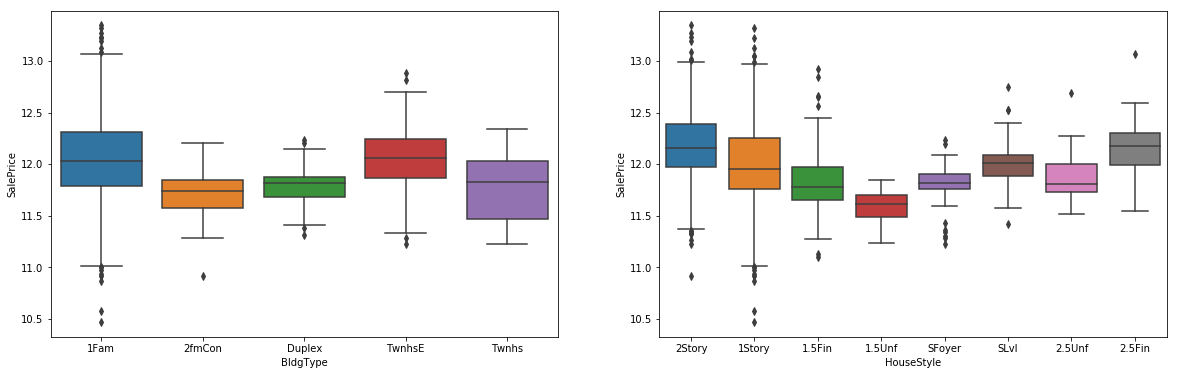

In [199]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['BldgType'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['HouseStyle'],y=aux_DF['SalePrice'],ax=ax2)

In [200]:
aux_DF.groupby(['BldgType'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BldgType                                                                 
1Fam      1195.0  12.051735  0.391674  10.471978  11.790565  12.031725   
2fmCon      30.0  11.704832  0.265557  10.915107  11.576483  11.745978   
Duplex      51.0  11.773597  0.204322  11.314487  11.680563  11.820123   
Twnhs       43.0  11.773914  0.309583  11.225257  11.469421  11.831386   
TwnhsE     114.0  12.059457  0.324131  11.231901  11.871915  12.056416   

                75%        max  
BldgType                        
1Fam      12.309310  13.345509  
2fmCon    11.849405  12.206078  
Duplex    11.881036  12.237092  
Twnhs     12.035933  12.345839  
TwnhsE    12.242288  12.880294

Let's group 2fmCon and Duplex together and then use BldgType in OHE form.

In [201]:
aux_dict = {'2fmCon':'2fmCon_Duplex','Duplex':'2fmCon_Duplex'}

In [202]:
aux_DF['BldgType'].replace(to_replace=aux_dict,inplace=True)

In [203]:
aux_DF.groupby(['HouseStyle'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
HouseStyle                                                                
1.5Fin      148.0  11.814530  0.310152  11.104972  11.651607  11.784865   
1.5Unf       14.0  11.595037  0.179637  11.238502  11.494090  11.619420   
1Story      711.0  11.999665  0.396496  10.471978  11.755879  11.951187   
2.5Fin        8.0  12.194456  0.480148  11.552156  11.994121  12.175499   
2.5Unf       11.0  11.908758  0.334748  11.522886  11.735789  11.804856   
2Story      439.0  12.180052  0.360180  10.915107  11.977921  12.154785   
SFoyer       37.0  11.786487  0.242973  11.231901  11.755879  11.820123   
SLvl         65.0  12.002160  0.204157  11.418626  11.884496  12.010672   

                  75%        max  
HouseStyle                        
1.5Fin      11.976666  12.923915  
1.5Unf      11.699387  11.845110  
1Story      12.251050  13.323929  
2.5Fin      12.303242  13.071072  
2.5Unf      12.004570  12.691584  
2Story      12.387771  13.345509  
SFoyer      11.904974  12.237092  
SLvl        12.089544  12.751303

This feature will be OHE as is.

__RoofStyle RoofMatl__

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

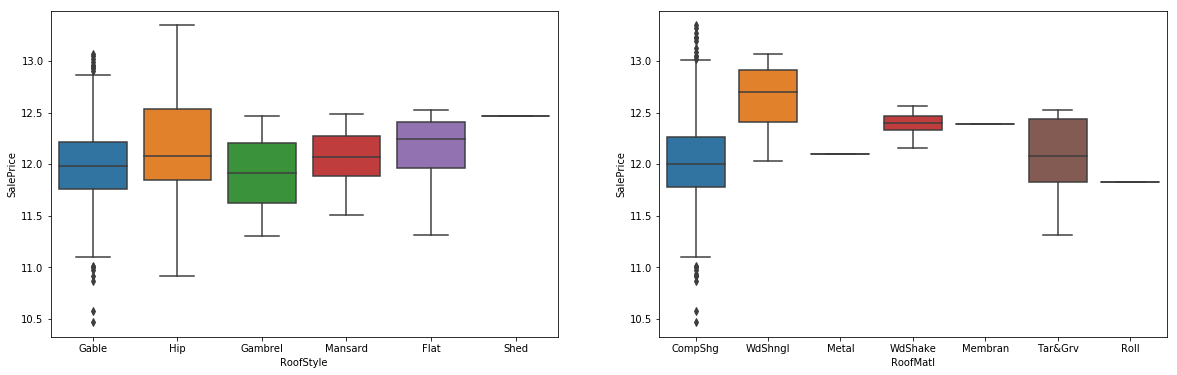

In [204]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['RoofStyle'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['RoofMatl'],y=aux_DF['SalePrice'],ax=ax2)

In [205]:
aux_DF.groupby(['RoofStyle'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
RoofStyle                                                                 
Flat         12.0  12.143942  0.374056  11.314487  11.961210  12.247731   
Gable      1124.0  11.986673  0.356376  10.471978  11.759793  11.982935   
Gambrel      10.0  11.917589  0.381295  11.302217  11.622263  11.915701   
Hip         279.0  12.185246  0.455777  10.915107  11.847617  12.081082   
Mansard       7.0  12.057431  0.334552  11.512935  11.886939  12.072547   
Shed          1.0  12.468441       NaN  12.468441  12.468441  12.468441   

                 75%        max  
RoofStyle                        
Flat       12.410757  12.524421  
Gable      12.215903  13.071072  
Gambrel    12.206232  12.466516  
Hip        12.534480  13.345509  
Mansard    12.275741  12.491176  
Shed       12.468441  12.468441

Some RoofStyle are only present in a small subset of houses, like Shed (2 houses) and Mansard (7 houses). 

To reduce the number of features, Flat will be condensed with Hip. Mansard will be joined with Gable and Shed with Gambrel.

In [206]:
aux_dict = {'Flat':'Hip_Flat','Hip':'Hip_Flat','Mansard':'Gable_Mansard','Gable':'Gable_Mansard','Gambrel':'Gambrel_Shed','Shed':'Gambrel_Shed'}

In [207]:
aux_DF['RoofStyle'].replace(to_replace=aux_dict,inplace=True)

Regarding RoofMatl:

In [208]:
aux_DF.groupby(['RoofMatl'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
RoofMatl                                                                 
CompShg   1411.0  12.023282  0.384788  10.471978  11.775297  11.998439   
Membran      1.0  12.394629       NaN  12.394629  12.394629  12.394629   
Metal        1.0  12.100718       NaN  12.100718  12.100718  12.100718   
Roll         1.0  11.827744       NaN  11.827744  11.827744  11.827744   
Tar&Grv     10.0  12.087832  0.395804  11.314487  11.829108  12.076936   
WdShake      5.0  12.384854  0.154599  12.154785  12.337105  12.396697   
WdShngl      4.0  12.625538  0.451355  12.034697  12.410209  12.698191   

                75%        max  
RoofMatl                        
CompShg   12.268817  13.345509  
Membran   12.394629  12.394629  
Metal     12.100718  12.100718  
Roll      11.827744  11.827744  
Tar&Grv   12.438877  12.524421  
WdShake   12.468441  12.567241  
WdShngl   12.913519  13.071072

Membrane, metal and roll roofs are only present 1 time each on the training data. These will therefore be grouped with Tar & Grvl into an "Other" category.

WdShake and WdShngl will be condensed into a "Wood" category

In [209]:
aux_dict = {'Membran':'Other','Metal':'Other','Roll':'Other','Tar&Grv':'Other','WdShake':'Wood','WdShngl':'Wood'}

In [210]:
aux_DF['RoofMatl'].replace(to_replace=aux_dict,inplace=True)

__'Exterior1st' 'Exterior2nd'__

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

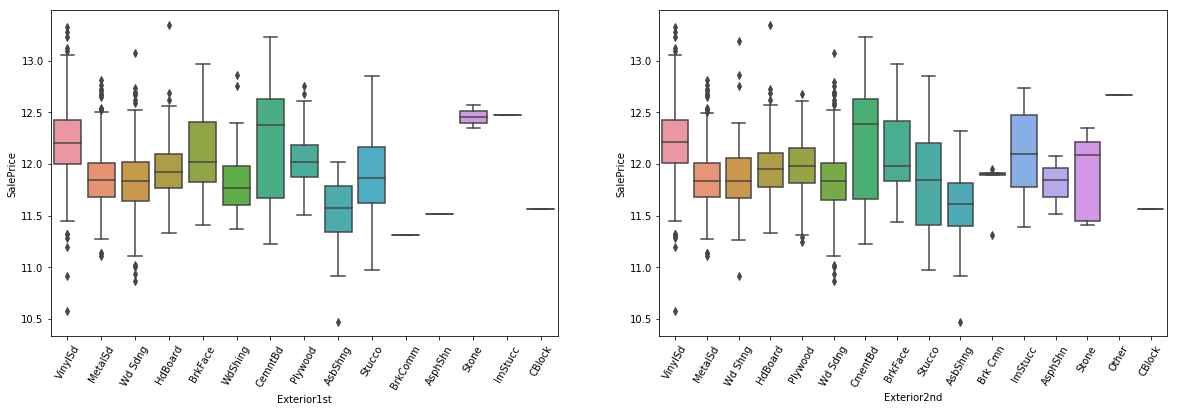

In [211]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['Exterior1st'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['Exterior2nd'],y=aux_DF['SalePrice'],ax=ax2)
a =plt.setp(ax1.get_xticklabels(), rotation=60)
a =plt.setp(ax2.get_xticklabels(), rotation=60)

In [212]:
aux_DF.groupby(['Exterior1st'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior1st                                                                
AsbShng       19.0  11.509340  0.385406  10.471978  11.344081  11.571204   
AsphShn        1.0  11.512935       NaN  11.512935  11.512935  11.512935   
BrkComm        1.0  11.314487       NaN  11.314487  11.314487  11.314487   
BrkFace       48.0  12.103666  0.380189  11.407576  11.821648  12.018241   
CBlock         1.0  11.561725       NaN  11.561725  11.561725  11.561725   
CemntBd       59.0  12.201368  0.579882  11.225257  11.671888  12.373708   
HdBoard      221.0  11.944744  0.273997  11.326608  11.771444  11.917730   
ImStucc        1.0  12.476104       NaN  12.476104  12.476104  12.476104   
MetalSd      217.0  11.858535  0.310824  11.112463  11.678448  11.842236   
Plywood      102.0  12.040436  0.246378  11.507923  11.874532  12.021244   
Stone          2.0  12.456540  0.156555  12.345839  12.401189  12.456540   
Stucco        24.0  11.888210  0.480417  10.976799  11.619199  11.863490   
VinylSd      511.0  12.214056  0.355908  10.579005  11.995358  12.206078   
Wd Sdng      200.0  11.836463  0.350432  10.868587  11.642820  11.837857   
WdShing       26.0  11.844549  0.372468  11.373675  11.605596  11.765204   

                   75%        max  
Exterior1st                        
AsbShng      11.784778  12.016733  
AsphShn      11.512935  11.512935  
BrkComm      11.314487  11.314487  
BrkFace      12.406460  12.971543  
CBlock       11.561725  11.561725  
CemntBd      12.627041  13.229570  
HdBoard      12.100162  13.345509  
ImStucc      12.476104  12.476104  
MetalSd      12.011887  12.813921  
Plywood      12.184596  12.751303  
Stone        12.511890  12.567241  
Stucco       12.162584  12.850557  
VinylSd      12.426415  13.323929  
Wd Sdng      12.018211  13.071072  
WdShing      11.984044  12.861001

There are many types of Exterior1st with unitary (or close to) count. These will be grouped to reduce the number of features:

- AsphShn, AsbShng, BrkComm, CBlock into 'Shingles';
- ImStucc into 'Stucco';
- Stone into 'CemntBd';
- WdShing into 'Wd Sdng'.

In [213]:
aux_dict = {'AsphShn':'Shingles','AsbShng':'Shingles','BrkComm':'Shingles','CBlock':'Shingles','ImStucc':'Stucco','Stone':'CemntBd','WdShing':'Wd Sdng'}

In [214]:
aux_DF['Exterior1st'].replace(to_replace=aux_dict,inplace=True)

In [215]:
aux_DF.groupby(['Exterior1st'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior1st                                                                
BrkFace       48.0  12.103666  0.380189  11.407576  11.821648  12.018241   
CemntBd       61.0  12.209734  0.572330  11.225257  11.691080  12.373708   
HdBoard      221.0  11.944744  0.273997  11.326608  11.771444  11.917730   
MetalSd      217.0  11.858535  0.310824  11.112463  11.678448  11.842236   
Plywood      102.0  12.040436  0.246378  11.507923  11.874532  12.021244   
Shingles      22.0  11.503028  0.359465  10.471978  11.329284  11.561249   
Stucco        25.0  11.911726  0.484777  10.976799  11.661354  11.877576   
VinylSd      511.0  12.214056  0.355908  10.579005  11.995358  12.206078   
Wd Sdng      226.0  11.837394  0.352184  10.868587  11.631782  11.813037   

                   75%        max  
Exterior1st                        
BrkFace      12.406460  12.971543  
CemntBd      12.623064  13.229570  
HdBoard      12.100162  13.345509  
MetalSd      12.011887  12.813921  
Plywood      12.184596  12.751303  
Shingles     11.766570  12.016733  
Stucco       12.206578  12.850557  
VinylSd      12.426415  13.323929  
Wd Sdng      12.013707  13.071072

In [216]:
aux_DF.groupby(['Exterior2nd'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior2nd                                                                
AsbShng       19.0  11.557451  0.425476  10.471978  11.403610  11.608245   
AsphShn        3.0  11.809240  0.281261  11.512935  11.677586  11.842236   
Brk Cmn        6.0  11.811988  0.244617  11.314487  11.893075  11.903271   
BrkFace       23.0  12.096544  0.410067  11.439290  11.838574  11.982935   
CBlock         1.0  11.561725       NaN  11.561725  11.561725  11.561725   
CmentBd       58.0  12.198230  0.575803  11.225257  11.662292  12.383132   
HdBoard      205.0  11.964615  0.287366  11.326608  11.775297  11.947956   
ImStucc        9.0  12.097719  0.464224  11.385103  11.775297  12.096263   
MetalSd      211.0  11.861054  0.310130  11.112463  11.684782  11.838633   
Other          1.0  12.672950       NaN  12.672950  12.672950  12.672950   
Plywood      136.0  11.992108  0.258775  11.245059  11.813037  11.978236   
Stone          5.0  11.898449  0.440746  11.407576  11.445727  12.083911   
Stucco        25.0  11.847847  0.473460  10.976799  11.411457  11.849405   
VinylSd      500.0  12.218024  0.353701  10.579005  12.007613  12.209820   
Wd Sdng      193.0  11.848672  0.354435  10.868587  11.648339  11.835016   
Wd Shng       38.0  11.892250  0.420338  10.915107  11.669829  11.836630   

                   75%        max  
Exterior2nd                        
AsbShng      11.812928  12.323860  
AsphShn      11.957392  12.072547  
Brk Cmn      11.908347  11.951187  
BrkFace      12.420138  12.971543  
CBlock       11.561725  11.561725  
CmentBd      12.629029  13.229570  
HdBoard      12.106258  13.345509  
ImStucc      12.476104  12.739641  
MetalSd      12.009757  12.813921  
Other        12.672950  12.672950  
Plywood      12.157402  12.676079  
Stone        12.209193  12.345839  
Stucco       12.206578  12.850557  
VinylSd      12.428320  13.323929  
Wd Sdng      12.013707  13.071072  
Wd Shng      12.057069  13.195616

In [217]:
aux_dict = {'AsphShn':'Shingles','AsbShng':'Shingles','BrkComm':'Shingles','Brk Cmn':'BrkFace','CBlock':'Shingles','ImStucc':'Stucco','Stone':'CmentBd','WdShing':'Wd Sdng','Other':'VinylSd'}

In [218]:
aux_DF['Exterior2nd'].replace(to_replace=aux_dict,inplace=True)

In [219]:
aux_DF.groupby(['Exterior2nd'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior2nd                                                                
BrkFace       29.0  12.037670  0.395687  11.314487  11.849405  11.951187   
CmentBd       63.0  12.174438  0.569225  11.225257  11.652696  12.343471   
HdBoard      205.0  11.964615  0.287366  11.326608  11.775297  11.947956   
MetalSd      211.0  11.861054  0.310130  11.112463  11.684782  11.838633   
Plywood      136.0  11.992108  0.258775  11.245059  11.813037  11.978236   
Shingles      23.0  11.590479  0.403500  10.471978  11.502834  11.608245   
Stucco        34.0  11.913989  0.477276  10.976799  11.534888  11.863490   
VinylSd      501.0  12.218932  0.353931  10.579005  12.007628  12.211065   
Wd Sdng      193.0  11.848672  0.354435  10.868587  11.648339  11.835016   
Wd Shng       38.0  11.892250  0.420338  10.915107  11.669829  11.836630   

                   75%        max  
Exterior2nd                        
BrkFace      12.404928  12.971543  
CmentBd      12.608899  13.229570  
HdBoard      12.106258  13.345509  
MetalSd      12.009757  12.813921  
Plywood      12.157402  12.676079  
Shingles     11.827744  12.323860  
Stucco       12.311024  12.850557  
VinylSd      12.429220  13.323929  
Wd Sdng      12.013707  13.071072  
Wd Shng      12.057069  13.195616

__'MasVnrType'__

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	

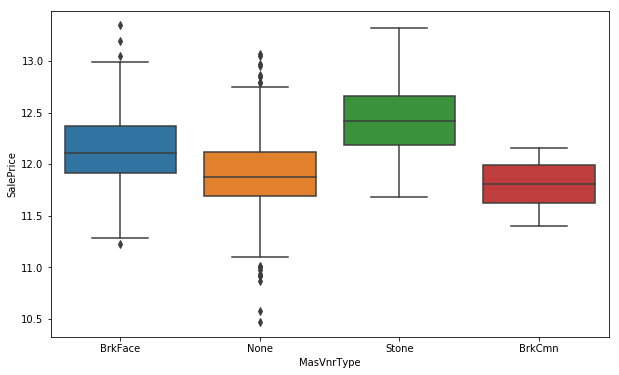

In [220]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['MasVnrType'],y=aux_DF['SalePrice'])

In [221]:
aux_DF.groupby(['MasVnrType'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MasVnrType                                                                
BrkCmn       14.0  11.804780  0.224232  11.401681  11.626853  11.804906   
BrkFace     441.0  12.161418  0.344948  11.225257  11.915058  12.106258   
None        853.0  11.901917  0.346038  10.471978  11.691080  11.874097   
Stone       125.0  12.429523  0.358158  11.686887  12.185875  12.422510   

                  75%        max  
MasVnrType                        
BrkCmn      11.995143  12.154785  
BrkFace     12.367345  13.345509  
None        12.122696  13.071072  
Stone       12.661917  13.323929

Due to low number of entries and similar mean/median to 'None', let's change all BrkCmn to None.

In [222]:
aux_dict = {'BrkCmn':'None'}
aux_DF['MasVnrType'].replace(to_replace=aux_dict,inplace=True)

__'ExterQual' 'ExterCond__

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

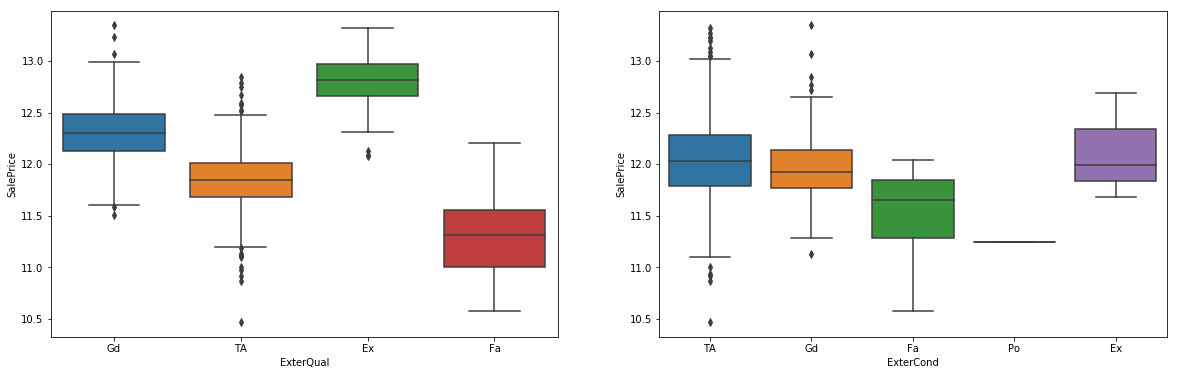

In [223]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['ExterQual'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['ExterCond'],y=aux_DF['SalePrice'],ax=ax2)

As would be expected, ExterQual seems to be an ordinal feature, from Fa to Ex and we can extrapolate this (and from common sense) to Poor Quality. For this reason, it will be converted to an ordinal feature.

In [224]:
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
aux_DF['ExterQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['ExterQual']= aux_DF['ExterQual'].astype('uint8')

ExterCond however, does not show the same pattern. Let's explore further.

In [225]:
aux_DF.groupby(['ExterCond','ExterQual'])['SalePrice'].describe()

count       mean       std        min        25%  \
ExterCond ExterQual                                                     
Ex        2            2.0  11.833807  0.219710  11.678448  11.756128   
          3            0.0        NaN       NaN        NaN        NaN   
          4            1.0  12.691584       NaN  12.691584  12.691584   
Fa        1            5.0  10.965872  0.263569  10.579005  10.915107   
          2           20.0  11.648316  0.311980  10.976799  11.387633   
          3            0.0        NaN       NaN        NaN        NaN   
Gd        1            0.0        NaN       NaN        NaN        NaN   
          2          106.0  11.861810  0.269117  11.133143  11.722368   
          3           35.0  12.277366  0.368965  11.584325  12.062487   
          4            2.0  12.369495  0.341361  12.128117  12.248806   
Po        1            0.0        NaN       NaN        NaN        NaN   
          2            1.0  11.245059       NaN  11.245059  11.245059   
TA        1            8.0  11.510497  0.369247  10.933000  11.315978   
          2          760.0  11.845423  0.274903  10.471978  11.686887   
          3          448.0  12.313641  0.263534  11.512935  12.132902   
          4           45.0  12.803613  0.270658  12.081082  12.669810   

                           50%        75%        max  
ExterCond ExterQual                                   
Ex        2          11.833807  11.911486  11.989166  
          3                NaN        NaN        NaN  
          4          12.691584  12.691584  12.691584  
Fa        1          11.002117  11.018646  11.314487  
          2          11.740465  11.864440  12.040614  
          3                NaN        NaN        NaN  
Gd        1                NaN        NaN        NaN  
          2          11.849405  12.002270  12.850557  
          3          12.254868  12.475841  13.345509  
          4          12.369495  12.490185  12.610874  
Po        1                NaN        NaN        NaN  
          2          11.245059  11.245059  11.245059  
TA        1          11.501045  11.634130  12.206078  
          2          11.848869  12.028745  12.791359  
          3          12.303655  12.488336  13.229570  
          4          12.841328  12.988043  13.323929

ExterCond, strangely does not seem to have have any regular property and will therefore be dropped as ExterQual seems to be the relevant property.

In [226]:
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
aux_DF['ExterCond'].replace(to_replace=aux_dict,inplace=True)
aux_DF['ExterCond']= aux_DF['ExterCond'].astype('uint8')

__Foundation__

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

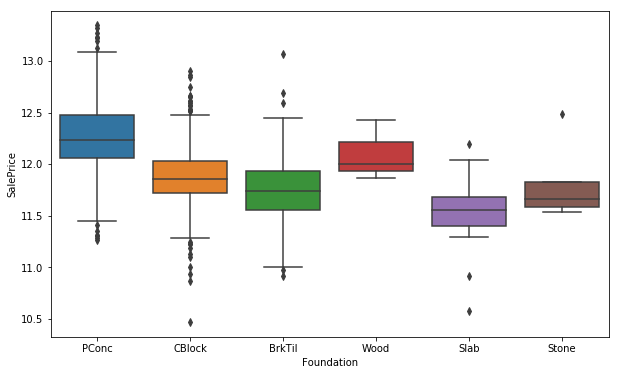

In [227]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Foundation'],y=aux_DF['SalePrice'])

In [228]:
aux_DF.groupby(['Foundation'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Foundation                                                                
BrkTil      143.0  11.743192  0.345635  10.915107  11.560772  11.744045   
CBlock      618.0  11.872142  0.289591  10.471978  11.719338  11.856522   
PConc       640.0  12.259396  0.340537  11.264477  12.061053  12.230770   
Slab         24.0  11.532970  0.337259  10.579005  11.400533  11.553342   
Stone         5.0  11.821169  0.390201  11.540317  11.585255  11.661354   
Wood          3.0  12.102485  0.291137  11.870607  11.939117  12.007628   

                  75%        max  
Foundation                        
BrkTil      11.936552  13.071072  
CBlock      12.031130  12.906349  
PConc       12.474671  13.345509  
Slab        11.685916  12.198549  
Stone       11.827744  12.491176  
Wood        12.218424  12.429220

Stone and wood foundations have very few entries. Let's group them into an "Other" feature.

In [229]:
aux_dict = {'Stone':'Other','Wood':'Other'}
aux_DF['Foundation'].replace(to_replace=aux_dict,inplace=True)

__'BsmtQual' 'BsmtCond'__

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

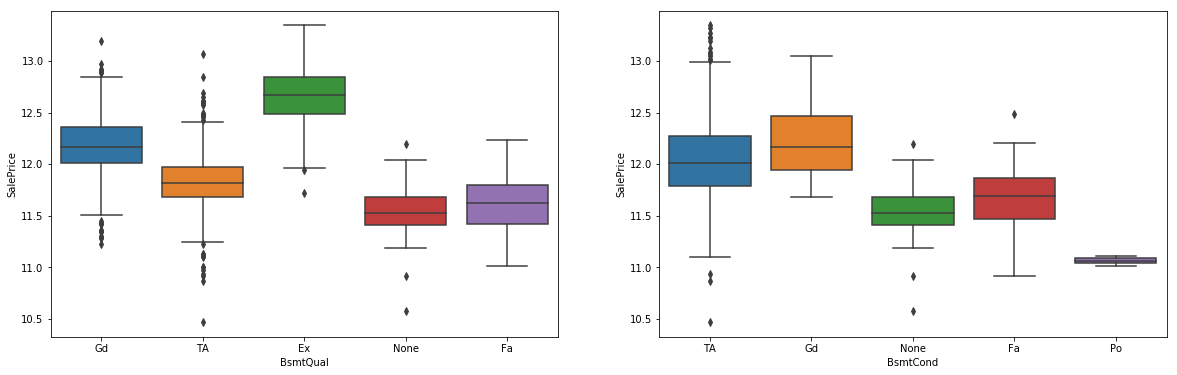

In [230]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['BsmtQual'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['BsmtCond'],y=aux_DF['SalePrice'],ax=ax2)

Both features seem Ordinal in nature. BsmtCond has 'Poor' quality entries which have worse SalePrices associated when compared to "None". Let's consider this when encoding both features to ordinal.

In [231]:
#Create map for ordinal convertion
aux_dict = {'Po':'0','None':'1','Fa':'2','TA':'3','Gd':'4','Ex':'5'}
#Change Feature to Ordinal
aux_DF['BsmtQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['BsmtQual']= aux_DF['BsmtQual'].astype('uint8')
#Change Feature to Ordinal
aux_DF['BsmtCond'].replace(to_replace=aux_dict,inplace=True)
aux_DF['BsmtCond']= aux_DF['BsmtCond'].astype('uint8')

__'BsmtExposure'__

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

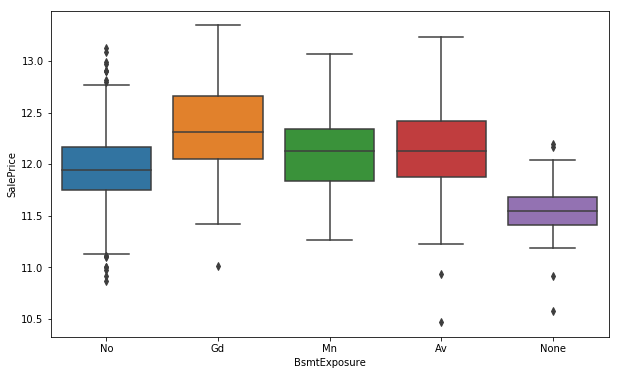

In [232]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['BsmtExposure'],y=aux_DF['SalePrice'])

In [233]:
aux_DF.groupby('BsmtExposure')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BsmtExposure                                                                
Av            217.0  12.150677  0.391420  10.471978  11.881042  12.132701   
Gd            125.0  12.355532  0.431038  11.018646  12.049425  12.317171   
Mn            113.0  12.096299  0.388008  11.264477  11.840797  12.128117   
No            940.0  11.965629  0.337808  10.868587  11.751950  11.949249   
None           38.0  11.546484  0.302211  10.579005  11.407576  11.552167   

                    75%        max  
BsmtExposure                        
Av            12.422510  13.229570  
Gd            12.665398  13.345509  
Mn            12.343471  13.071072  
No            12.165256  13.126033  
None          11.686362  12.198549

This feature is Ordinal and shall be converted

In [234]:
#Create map for ordinal convertion
aux_dict = {'None':'0','No':'1','Mn':'2','Av':'3','Gd':'4'}
#Change Feature to Ordinal
aux_DF['BsmtExposure'].replace(to_replace=aux_dict,inplace=True)
aux_DF['BsmtExposure']= aux_DF['BsmtExposure'].astype('uint8')

__BsmtFinType1' 'BsmtFinType2'__

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

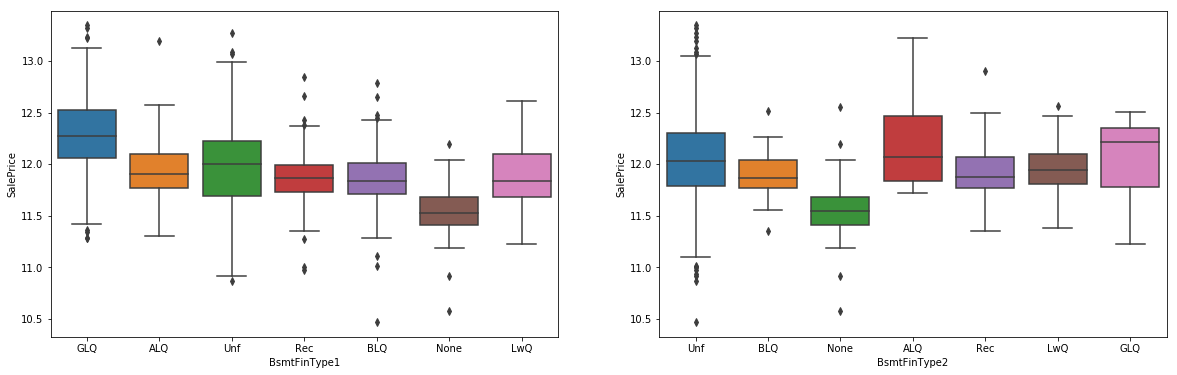

In [235]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['BsmtFinType1'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['BsmtFinType2'],y=aux_DF['SalePrice'],ax=ax2)

In [236]:
aux_DF.groupby('BsmtFinType1')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BsmtFinType1                                                                
ALQ           216.0  11.947645  0.259865  11.302217  11.767575  11.910028   
BLQ           146.0  11.866436  0.314447  10.471978  11.713825  11.839715   
GLQ           409.0  12.295918  0.351223  11.289794  12.061053  12.271397   
LwQ            74.0  11.881361  0.310169  11.231901  11.686782  11.842236   
None           37.0  11.529691  0.287842  10.579005  11.407576  11.530775   
Rec           130.0  11.864588  0.268144  10.976799  11.730053  11.867098   
Unf           421.0  11.981094  0.393363  10.868587  11.693170  12.007567   

                    75%        max  
BsmtFinType1                        
ALQ           12.100162  13.195616  
BLQ           12.009435  12.791359  
GLQ           12.524530  13.345509  
LwQ           12.095838  12.614869  
None          11.685693  12.198549  
Rec           11.991491  12.850557  
Unf           12.230282  13.275829

It seems that for a basement, the standout categories are GoodLivingQuarters (positive case) and None (negative case). THe remaining options are mostly similar between themselves. An unfinished basement seems to encompass many cases and has a large dispersion of values. It seems that in most cases, it is not a negative thing, presumably because new owners can finish them in their own taste without the need of incurring further costs with destroying the existing basement.

In an attempt to reduce total number of features, "BLQ", "LWQ" and "Rec" will be grouped together into "BLAQRec".

In [237]:
#Create map for grouping categories
aux_dict = {'BLQ':'BLAQRec','LWQ':'BLAQRec','Rec':'BLAQRec'}
#Groups the previously mapped features
aux_DF['BsmtFinType1'].replace(to_replace=aux_dict,inplace=True)

In [238]:
aux_DF.groupby('BsmtFinType2')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BsmtFinType2                                                                 
ALQ             19.0  12.167070  0.403957  11.724005  11.840577  12.071975   
BLQ             31.0  11.900872  0.234737  11.350418  11.772397  11.870607   
GLQ             14.0  12.033573  0.417365  11.231901  11.776314  12.220338   
LwQ             46.0  11.977839  0.253783  11.385103  11.809306  11.944693   
None            38.0  11.556718  0.329199  10.579005  11.407576  11.552167   
Rec             51.0  11.943505  0.279780  11.350418  11.767575  11.877576   
Unf           1234.0  12.047530  0.387622  10.471978  11.792929  12.028745   

                    75%        max  
BsmtFinType2                        
ALQ           12.472492  13.226725  
BLQ           12.041957  12.513193  
GLQ           12.352332  12.506181  
LwQ           12.099255  12.567241  
None          11.686362  12.556733  
Rec           12.066800  12.904210  
Unf           12.298782  13.345509

Regarding BsmtFinType2, most basements have Unf status.

Let's group some features to reduce resulting OHE features: GLQ with Unf.

In [239]:
#Create map for grouping categories
aux_dict = {'GLQ':'Unf'}
#Groups the previously mapped features
aux_DF['BsmtFinType2'].replace(to_replace=aux_dict,inplace=True)

__'Heating' 'HeatingQC'__

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

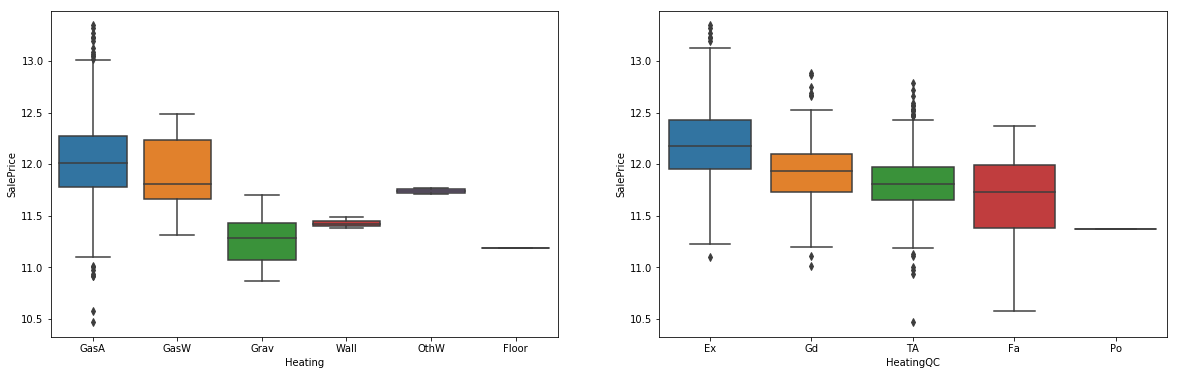

In [240]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['Heating'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['HeatingQC'],y=aux_DF['SalePrice'],ax=ax2)

In [241]:
aux_DF.groupby('Heating')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Heating                                                                 
Floor       1.0  11.191356       NaN  11.191356  11.191356  11.191356   
GasA     1403.0  12.034603  0.381640  10.471978  11.782960  12.013101   
GasW       17.0  11.877518  0.381752  11.314487  11.661354  11.804856   
Grav        6.0  11.269763  0.304724  10.868587  11.070891  11.283505   
OthW        2.0  11.741614  0.042186  11.711785  11.726699  11.741614   
Wall        4.0  11.429751  0.048594  11.379406  11.400533  11.423433   

               75%        max  
Heating                        
Floor    11.191356  11.191356  
GasA     12.273736  13.345509  
GasW     12.230770  12.491176  
Grav     11.430430  11.703554  
OthW     11.756529  11.771444  
Wall     11.452651  11.492733

It seems most houses have GasA type heating. Some houses have other types of heating but they are in very low quantity and will be grouped to reduce feature number:

- Floor with Grav: "FlrGrav";
- OthW with GasW: "W";
- Wall with GasA, it will be treated as an outlier.

In [242]:
#Create map for grouping categories
aux_dict = {'Floor':'FlrGrav','Grav':'FlrGrav','OthW':'W','GasW':'W','Wall':'GasA'}
#Groups the previously mapped features
aux_DF['Heating'].replace(to_replace=aux_dict,inplace=True)

HeatingQC seems to be an ordinal feature. Let's convert it!

In [243]:
#Create map for converting to Ordinal
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
aux_DF['HeatingQC'].replace(to_replace=aux_dict,inplace=True)
aux_DF['HeatingQC'] = aux_DF['HeatingQC'].astype('uint8')

__'CentralAir' 'Electrical'__

CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

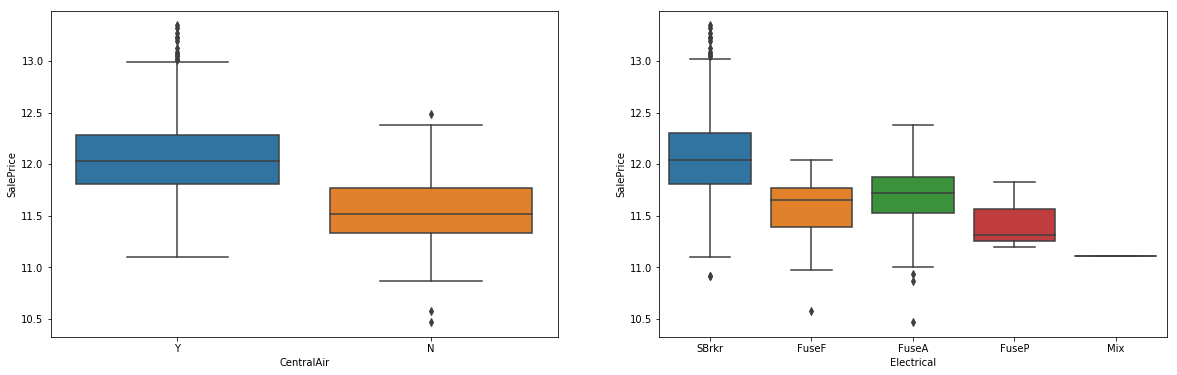

In [244]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['CentralAir'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['Electrical'],y=aux_DF['SalePrice'],ax=ax2)

CentrailAir is a binary feature. Let's convert it.

In [245]:
aux_DF['CentralAir'] = (aux_DF['CentralAir'] == 'Y').astype('uint8')

In [246]:
aux_DF.groupby('Electrical')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Electrical                                                                 
FuseA         91.0  11.679067  0.319199  10.471978  11.527715  11.724005   
FuseF         27.0  11.539635  0.332067  10.579005  11.390625  11.652696   
FuseP          3.0  11.446820  0.334972  11.198228  11.256358  11.314487   
Mix            1.0  11.112463       NaN  11.112463  11.112463  11.112463   
SBrkr       1311.0  12.063051  0.370633  10.915107  11.812296  12.043560   

                  75%        max  
Electrical                        
FuseA       11.879309  12.384223  
FuseF       11.774913  12.040614  
FuseP       11.571115  11.827744  
Mix         11.112463  11.112463  
SBrkr       12.301387  13.345509

For this feature, we should group Mix and FuseP with FureF, to reduce number of features. 

In [247]:
#Create map for converting to Ordinal
aux_dict = {'Mix':'FuseF','FuseP':'FuseF'}
#Converts feature
aux_DF['Electrical'].replace(to_replace=aux_dict,inplace=True)

When used, this feature seems to worsen results and will therefore be dropped.

__'KitchenQual'__

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

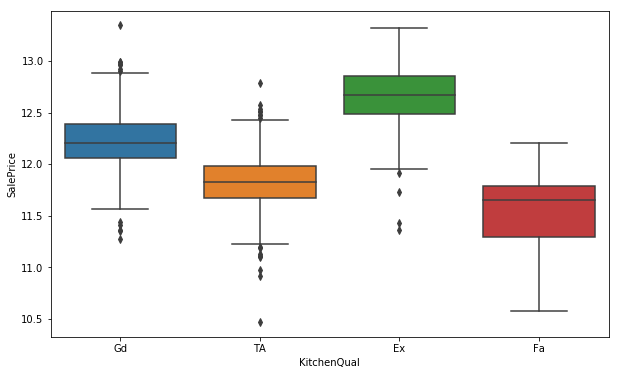

In [248]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['KitchenQual'],y=aux_DF['SalePrice'])

KitchenQual is an ordinal feature, as expected. Let's convert it.

In [249]:
#Create map for converting to Ordinal
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
aux_DF['KitchenQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['KitchenQual'] = aux_DF['KitchenQual'].astype('uint8')

__'Functional'__

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

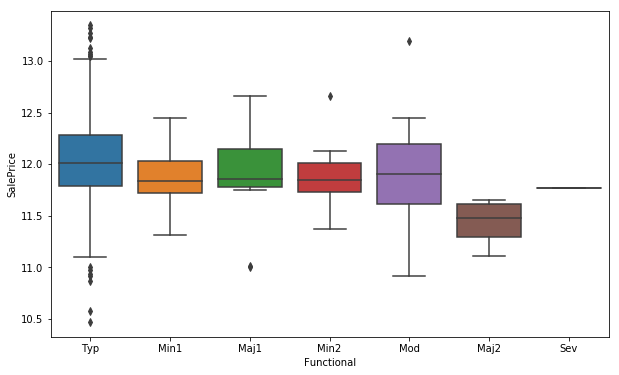

In [250]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Functional'],y=aux_DF['SalePrice'])

As only 1 case of Sev exists, let's group it with Maj2

In [251]:
#Create map for converting to Ordinal
aux_dict = {'Sev':'Maj2'}
#Converts feature
aux_DF['Functional'].replace(to_replace=aux_dict,inplace=True)

__'FireplaceQu'__

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

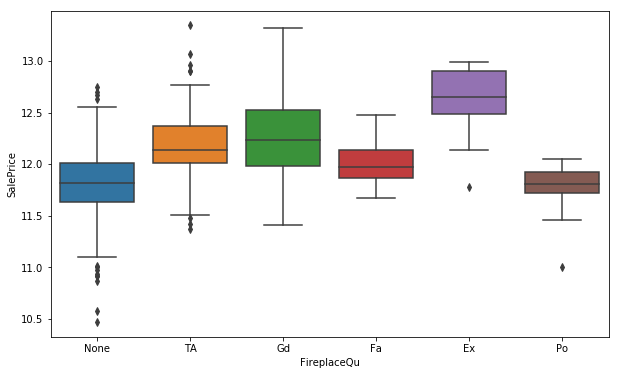

In [252]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['FireplaceQu'],y=aux_DF['SalePrice'])

In [253]:
aux_DF.groupby('FireplaceQu')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
FireplaceQu                                                                
Ex            23.0  12.632437  0.311855  11.779136  12.484214  12.653962   
Fa            33.0  12.008516  0.195310  11.669938  11.870607  11.970357   
Gd           372.0  12.255532  0.378983  11.411457  11.980876  12.240237   
None         680.0  11.819382  0.308378  10.471978  11.635152  11.817656   
Po            19.0  11.775549  0.244179  11.002117  11.719541  11.805603   
TA           306.0  12.181954  0.287289  11.373675  12.013707  12.138066   

                   75%        max  
FireplaceQu                        
Ex           12.904560  12.994532  
Fa           12.138869  12.476104  
Gd           12.524448  13.323929  
None         12.013707  12.744447  
Po           11.924844  12.055256  
TA           12.367345  13.345509

This feature does not perfom as well in ordinal form so it will be kept as categorical

__'GarageType' 'GarageFinish'__

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

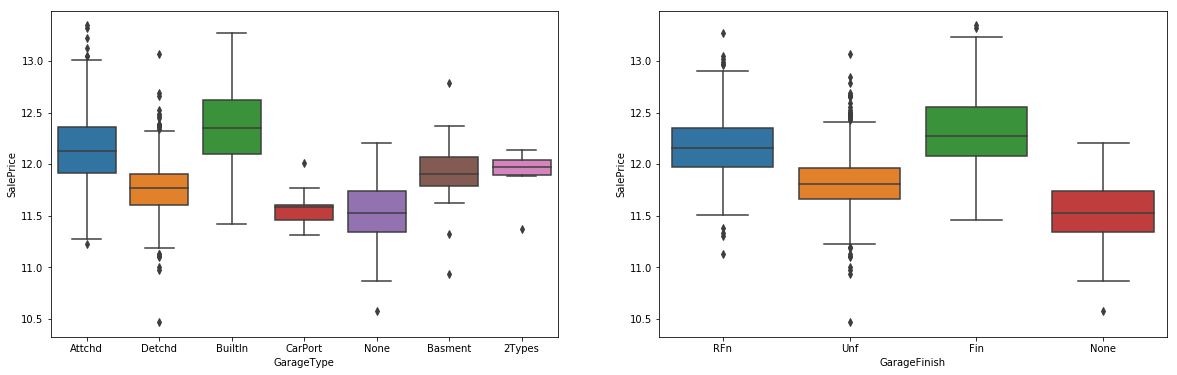

In [254]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['GarageType'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['GarageFinish'],y=aux_DF['SalePrice'],ax=ax2)

In [255]:
aux_DF.groupby('GarageType')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageType                                                                
2Types        6.0  11.899164  0.273337  11.373675  11.892971  11.975061   
Attchd      855.0  12.157406  0.326049  11.225257  11.918397  12.128117   
Basment      19.0  11.916447  0.389889  10.933000  11.791668  11.904974   
BuiltIn      86.0  12.380369  0.385161  11.418626  12.102103  12.352318   
CarPort       9.0  11.588004  0.206182  11.314487  11.461643  11.589896   
Detchd      383.0  11.771833  0.273174  10.471978  11.608245  11.771444   
None         75.0  11.526303  0.302199  10.579005  11.344519  11.532738   

                  75%        max  
GarageType                        
2Types      12.045000  12.137264  
Attchd      12.361433  13.345509  
Basment     12.066668  12.791359  
BuiltIn     12.620017  13.275829  
CarPort     11.608245  12.013101  
Detchd      11.902943  13.071072  
None        11.739998  12.208575

To reduce the number of OHE features, 2Types will be combined with Basment and CarPort with None

In [256]:
#Create map for grouping
aux_dict = {'2Types':'Basment','CarPort':'None'}
#Converts feature
aux_DF['GarageType'].replace(to_replace=aux_dict,inplace=True)

Regarding GarageFinish, the feature seems ordinal.

In [257]:
aux_DF.groupby('GarageFinish')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageFinish                                                                
Fin           345.0  12.317589  0.345283  11.459008  12.078245  12.278398   
None           75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
RFn           416.0  12.169908  0.289059  11.133143  11.970357  12.154785   
Unf           597.0  11.822036  0.287427  10.471978  11.661785  11.813037   

                    75%        max  
GarageFinish                        
Fin           12.554840  13.345509  
None          11.739998  12.208575  
RFn           12.352879  13.275829  
Unf           11.964007  13.071072

In [258]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Unf':'1','RFn':'2','Fin':'3'}
#Converts feature
aux_DF['GarageFinish'].replace(to_replace=aux_dict,inplace=True)
aux_DF['GarageFinish'] = aux_DF['GarageFinish'].astype('uint8')

__'GarageQual' 'GarageCond'__

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

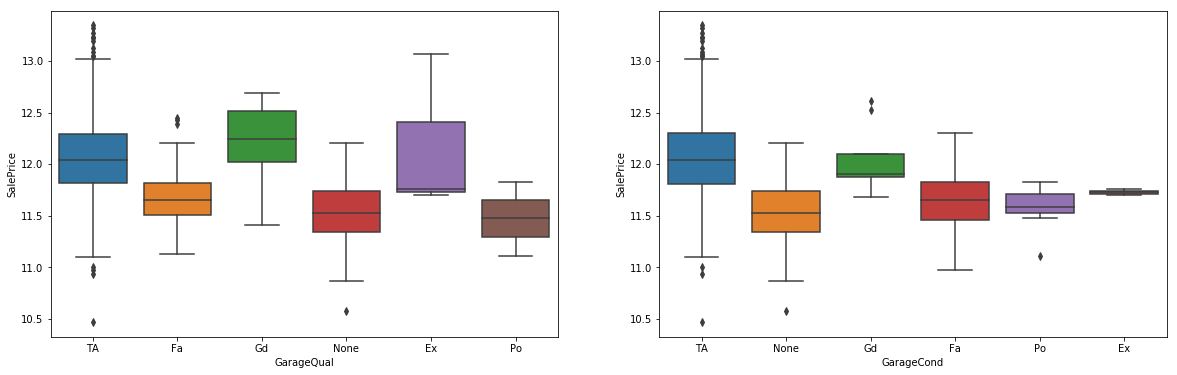

In [259]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['GarageQual'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['GarageCond'],y=aux_DF['SalePrice'],ax=ax2)

In [260]:
aux_DF.groupby('GarageQual')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageQual                                                                 
Ex             3.0  12.175455  0.776141  11.699413  11.727646  11.755879   
Fa            47.0  11.687629  0.298914  11.134604  11.512935  11.652696   
Gd            14.0  12.220073  0.381124  11.411457  12.019128  12.243951   
None          75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
Po             3.0  11.472505  0.357665  11.112463  11.294886  11.477309   
TA          1291.0  12.067128  0.364269  10.471978  11.814886  12.043501   

                  75%        max  
GarageQual                        
Ex          12.413476  13.071072  
Fa          11.822030  12.452937  
Gd          12.512818  12.691584  
None        11.739998  12.208575  
Po          11.652526  11.827744  
TA          12.298451  13.345509

GarageQual seems to be ordinal, with None and Po sharing similar Stats. They will be grouped in the lowest ordinal level.

In [261]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
aux_DF['GarageQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['GarageQual'] = aux_DF['GarageQual'].astype('uint8')

In [262]:
aux_DF.groupby('GarageCond')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageCond                                                                 
Ex             2.0  11.727646  0.039928  11.699413  11.713530  11.727646   
Fa            33.0  11.643032  0.285878  10.976799  11.461643  11.652696   
Gd             9.0  12.050621  0.322364  11.682677  11.877576  11.904974   
None          75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
Po             7.0  11.572888  0.233637  11.112463  11.524256  11.589896   
TA          1307.0  12.067991  0.366233  10.471978  11.813037  12.043560   

                  75%        max  
GarageCond                        
Ex          11.741763  11.755879  
Fa          11.831386  12.301387  
Gd          12.100718  12.618186  
None        11.739998  12.208575  
Po          11.715799  11.827744  
TA          12.301387  13.345509

This feature is ordinal, however, it displays some annomalies, as Gd quality GarageCond have similar mean SalePrice as TA garages. Most garages are also TA.

This feature will be grouped into 4 values, 0 for None, 1 por Po, 2 for Fa and 3 for TA or better.

In [263]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Po':'1','Fa':'2','TA':'3','Gd':'3','Ex':'3'}
#Converts feature
aux_DF['GarageCond'].replace(to_replace=aux_dict,inplace=True)
aux_DF['GarageCond'] = aux_DF['GarageCond'].astype('uint8')

__'PavedDrive'__

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

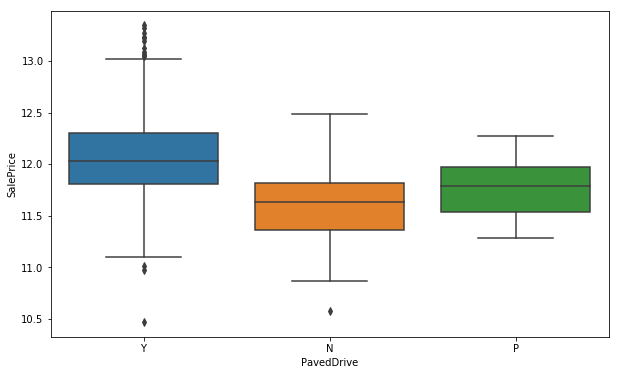

In [264]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['PavedDrive'],y=aux_DF['SalePrice'])

This feature will be left "as is"

__'PoolQC'__

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

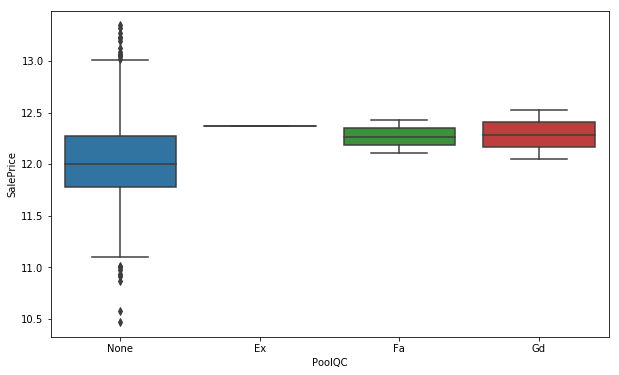

In [265]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['PoolQC'],y=aux_DF['SalePrice'])

In [266]:
aux_DF.groupby('PoolQC')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
PoolQC                                                                 
Ex         1.0  12.367345       NaN  12.367345  12.367345  12.367345   
Fa         2.0  12.267739  0.228369  12.106258  12.186998  12.267739   
Gd         2.0  12.286923  0.335873  12.049425  12.168174  12.286923   
None    1428.0  12.025911  0.386039  10.471978  11.775297  12.001512   

              75%        max  
PoolQC                        
Ex      12.367345  12.367345  
Fa      12.348480  12.429220  
Gd      12.405672  12.524421  
None    12.271362  13.345509

Almost no houses have pools. Let's convert this feature to binary

In [267]:
aux_DF['PoolQc'] = (aux_DF['PoolQC'] != 'None').astype('uint8')

__'Fence'__

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

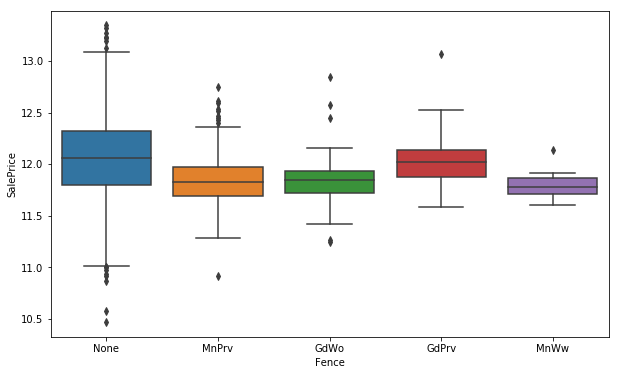

In [268]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Fence'],y=aux_DF['SalePrice'])

In [269]:
aux_DF.groupby('Fence')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Fence                                                                 
GdPrv    58.0  12.049601  0.258674  11.589896  11.880853  12.021226   
GdWo     51.0  11.849117  0.278508  11.245059  11.719948  11.845827   
MnPrv   154.0  11.851147  0.277696  10.915107  11.694630  11.831205   
MnWw     11.0  11.796808  0.151907  11.608245  11.707602  11.775297   
None   1159.0  12.059064  0.400013  10.471978  11.796229  12.061053   

             75%        max  
Fence                        
GdPrv  12.142805  13.071072  
GdWo   11.936552  12.850557  
MnPrv  11.970357  12.751303  
MnWw   11.870509  12.138869  
None   12.319406  13.345509

Strangely Good fences do not seem to correspond to better SalePrices than other fences as would be expected. This feature will be discarded.

__'MiscFeature'__

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

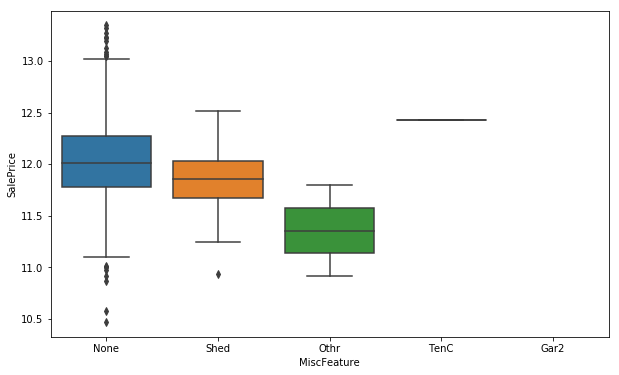

In [270]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['MiscFeature'],y=aux_DF['SalePrice'])

In [271]:
aux_DF.groupby('MiscFeature')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MiscFeature                                                                 
Gar2            0.0        NaN       NaN        NaN        NaN        NaN   
None         1384.0  12.034068  0.385145  10.471978  11.776738  12.013677   
Othr            2.0  11.356609  0.624379  10.915107  11.135858  11.356609   
Shed           46.0  11.830112  0.324615  10.933000  11.670153  11.860006   
TenC            1.0  12.429220       NaN  12.429220  12.429220  12.429220   

                   75%        max  
MiscFeature                        
Gar2               NaN        NaN  
None         12.278398  13.345509  
Othr         11.577361  11.798112  
Shed         12.029298  12.513561  
TenC         12.429220  12.429220

As Gar2, Othr and TenC have so few entries, this feature will be converted to binary

In [272]:
aux_DF['MiscFeature'] = (aux_DF['MiscFeature'] != 'None').astype('uint8')

__'SaleType', 'SaleCondition'__

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

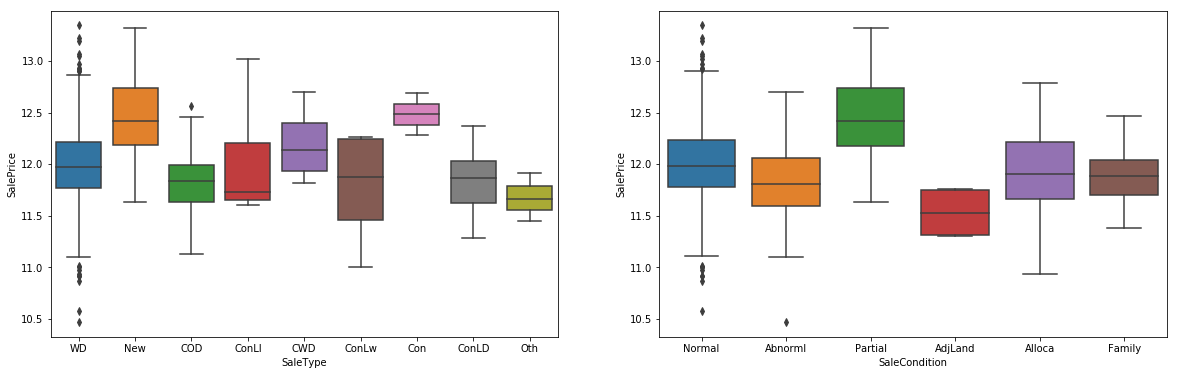

In [273]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['SaleType'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['SaleCondition'],y=aux_DF['SalePrice'],ax=ax2)

In [274]:
aux_DF.groupby('SaleType')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
SaleType                                                                 
COD         42.0  11.847096  0.297534  11.133143  11.631782  11.842236   
CWD          4.0  12.198350  0.391644  11.820418  11.932872  12.134734   
Con          2.0  12.483915  0.289330  12.279328  12.381621  12.483915   
ConLD        8.0  11.825832  0.383953  11.288544  11.627612  11.865223   
ConLI        5.0  12.044885  0.595663  11.608245  11.652696  11.736077   
ConLw        5.0  11.769714  0.539515  11.002117  11.461643  11.877576   
New        118.0  12.467432  0.354015  11.635152  12.184848  12.423660   
Oth          3.0  11.675303  0.236625  11.445727  11.553756  11.661785   
WD        1246.0  11.992999  0.362253  10.471978  11.767575  11.971936   

                75%        max  
SaleType                        
COD       11.993723  12.567241  
CWD       12.400212  12.703512  
Con       12.586208  12.688502  
ConLD     12.036839  12.367890  
ConLI     12.206078  13.021329  
ConLw     12.242891  12.264346  
New       12.742328  13.323929  
Oth       11.790091  11.918397  
WD        12.217634  13.345509

There seem to be features that only apply to a couple of categories. Let's combine them:

- ConLI with WD;
- Con, CWD with New;
- ConLD, ConLw,Oth with COD;

In [275]:
#Create map for merging sparse categories
aux_dict = {'ConLI':'WD','Con':'New','CWD':'New','ConLD':'COD','ConLw':'COD','Oth':'COD'}
#Converts feature
aux_DF['SaleType'].replace(to_replace=aux_dict,inplace=True)

In [276]:
aux_DF.groupby('SaleCondition')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
SaleCondition                                                                 
Abnorml          94.0  11.815243  0.373285  10.471978  11.595526  11.810976   
AdjLand           4.0  11.529157  0.255059  11.302217  11.311419  11.529266   
Alloca           12.0  11.914465  0.504289  10.933000  11.663954  11.905339   
Family           19.0  11.898562  0.288799  11.385103  11.707263  11.884496   
Normal         1184.0  12.004649  0.358060  10.579005  11.775297  11.982935   
Partial         120.0  12.459813  0.358919  11.635152  12.181270  12.418974   

                     75%        max  
SaleCondition                        
Abnorml        12.064652  12.703512  
AdjLand        11.747004  11.755879  
Alloca         12.216167  12.791359  
Family         12.046492  12.464587  
Normal         12.230770  13.345509  
Partial        12.738088  13.323929

Let's join categories with few samples

In [277]:
#Create map for merging sparse categories
#aux_dict = {'AdjLand':'Partial','Alloca':'Family'}
#Converts feature
#aux_DF['SaleType'].replace(to_replace=aux_dict,inplace=True)

__Creating new Features__

Let's create some new features for enriching our dataset. Let's start by refining the areas and room numbers

In [278]:
#Checking the top 10 features correlated with SalePrice
aux_DF.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice      1.000000
OverallQual    0.825597
GrLivArea      0.726270
ExterQual      0.696904
GarageCars     0.681008
KitchenQual    0.677148
BsmtQual       0.658590
GarageArea     0.656497
TotalBsmtSF    0.648786
1stFlrSF       0.617771
Name: SalePrice, dtype: float64

Let's create features with:
 - The full SF area of the house (HouseSF);
 - The total number of bathrooms (considering full bathroom as 1 and halfbathroom as 0.5) (Bathrooms);
 - Several features that combined OverallQual and OverallCond - as OverallScore
 - Features that combine area with Qual into AreaQual

In [279]:
#Calculating HouseSF
aux_DF['HouseSF'] = aux_DF['GrLivArea'] + aux_DF['TotalBsmtSF']

In [280]:
#Calculating total number of bathrooms
aux_DF['Bathrooms'] = aux_DF['FullBath'] + 0.5*aux_DF['HalfBath']+aux_DF['BsmtFullBath']+0.5*aux_DF['BsmtHalfBath']

In [281]:
aux_DF['OverallScore'] = aux_DF['OverallQual'] * aux_DF['OverallCond']
aux_DF['ExterScore'] = aux_DF['ExterQual'] * aux_DF['ExterCond']
aux_DF['KitchenAreaQual'] = aux_DF['KitchenAbvGr'] * aux_DF['KitchenQual']
aux_DF['GarageAreaQual'] = aux_DF['GarageArea'] * aux_DF['GarageQual']

In [282]:
#Checking the top 10 features correlated with SalePrice
aux_DF.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
HouseSF         0.827235
OverallQual     0.825597
GrLivArea       0.726270
OverallScore    0.709516
ExterQual       0.696904
GarageCars      0.681008
KitchenQual     0.677148
Bathrooms       0.670419
BsmtQual        0.658590
Name: SalePrice, dtype: float64

Creating Polynomials

In [283]:
#store the top 10 feature names for a for loop
top_10 = aux_DF.corr()['SalePrice'].sort_values(ascending=False).head(10).index

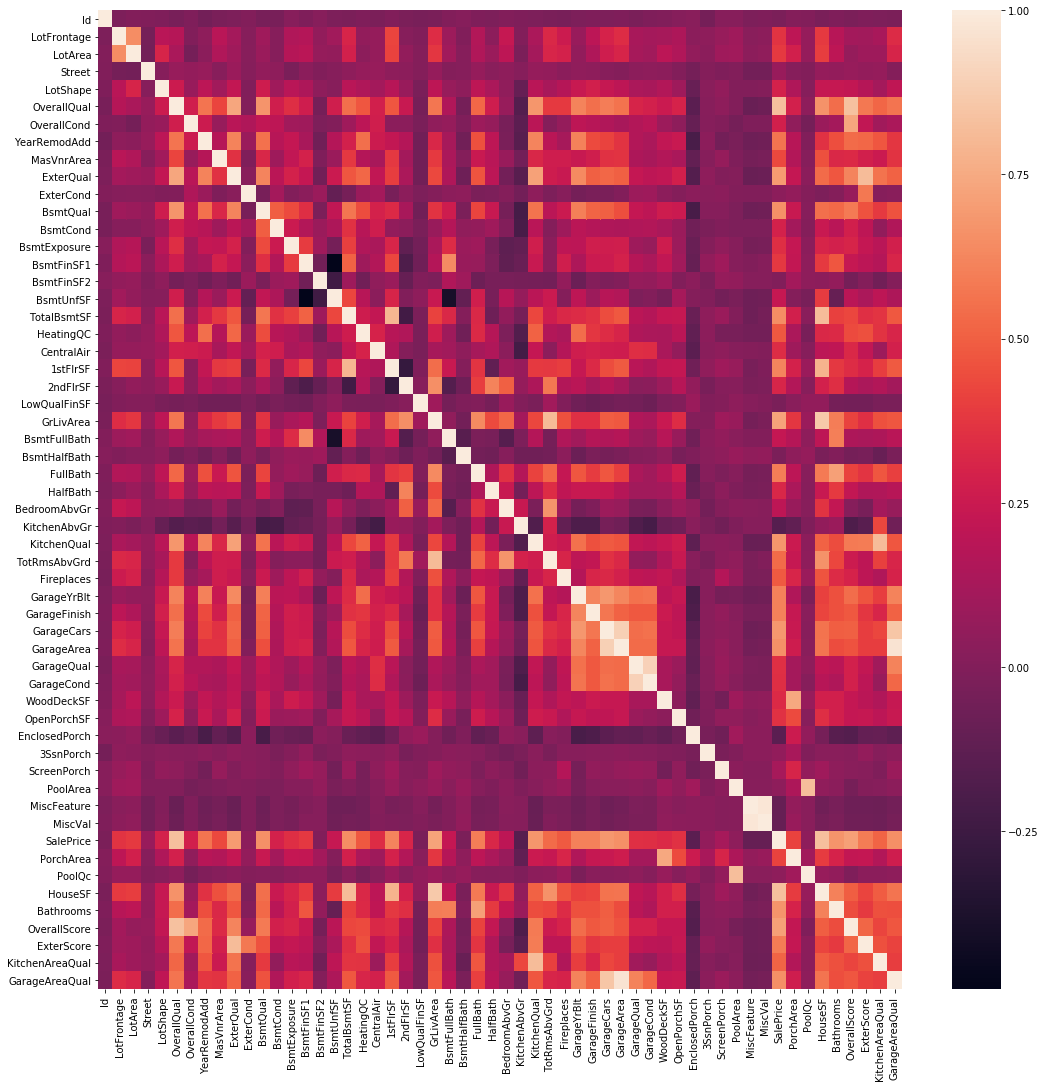

In [284]:
plt.figure(figsize=(18,18))
sns.heatmap(aux_DF.corr())

__Multicolinearity__

Features that are highly correlated with each other are said to be colinear and can pose a challenge for models. Not only do they supply redundant information for the model, but they can make the model ignore other features, less correlated with the target variable but nonetheless important and with predictive value. This is because multicolinearity will increase the standard errors of the coefficients. As the model focuses on reducing overall error, it will be tempted to ignore other, less "significant" features that could have added some value to the result. Therefore, let's use the heatmap to identify multicolinear features and let's delete the less correlated of the pairs.

It seems that MisVal and MiscFeature are highly correlated with each other:

In [285]:
aux_DF[['MiscFeature','MiscVal','SalePrice']].corr()

MiscFeature   MiscVal  SalePrice
MiscFeature     1.000000  0.979136  -0.099438
MiscVal         0.979136  1.000000  -0.095427
SalePrice      -0.099438 -0.095427   1.000000

Neither seems particularly useful but we'll drop MiscVal as it seems to be less useful!

GarageQual and GarageCond:

In [286]:
aux_DF[['GarageQual','GarageCond','SalePrice']].corr()

GarageQual  GarageCond  SalePrice
GarageQual    1.000000    0.900124   0.352759
GarageCond    0.900124    1.000000   0.344644
SalePrice     0.352759    0.344644   1.000000

Let's keep GarageQual!

GarageCars and GarageArea

In [287]:
aux_DF[['GarageCars','GarageArea','SalePrice']].corr()

GarageCars  GarageArea  SalePrice
GarageCars    1.000000    0.891060   0.681008
GarageArea    0.891060    1.000000   0.656497
SalePrice     0.681008    0.656497   1.000000

### Feature inclusion on the final Dataset

The information on aux_DF will now be included in the final combined DataFrame that will be used, with only the selected features.

In [288]:
#combined = aux_DF[['Id','SalePrice','OverallQual','OverallCond','GrLivArea','PorchArea','TotalBsmtSF','BsmtUnfSF','YearBuilt_Bins','YearRemodAdd','FullBath','HalfBath',\
#                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','MiscVal','MoSold','YrSold','MSZoning','Street','Alley','LotShape','LandContour','LotConfig',\
#                  'LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation',\
#                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType',\
#                  'GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType', 'SaleCondition','LotFrontage','LotArea','1stFlrSF','2ndFlrSF',\
#                   'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','HouseSF','Bathrooms','OverallScore','ExterScore',\
#                  'KitchenAreaQual','GarageAreaQual','GarageCars]]

In [289]:
combined = aux_DF[['Id','SalePrice','OverallQual','OverallCond','GrLivArea','PorchArea','TotalBsmtSF','BsmtUnfSF','YearBuilt_Bins','YearRemodAdd','FullBath','HalfBath',\
                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','MiscFeature','MoSold','YrSold','MSZoning','Street','Alley','LotShape','LandContour','LotConfig',\
                  'Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual','Foundation',\
                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType',\
                  'GarageQual','PavedDrive','PoolQC','SaleType', 'SaleCondition','LotFrontage','LotArea','1stFlrSF','2ndFlrSF',\
                   'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','HouseSF','Bathrooms','OverallScore','ExterScore',\
                  'KitchenAreaQual','GarageAreaQual','GarageCars']]

### Polynomials

One way to try and improve a model's predictive capacity is create polynomial features, that is, quadratic, cubir, sqrt etc. transformations of features.

This can sometime lead to a "better" behaved feature that is better fit by the regression model, increase its performance.

Below is the code that would create polynomials, check if they increased correlation with SalePrice and used it if it did (dropping the original feature in the process).

Unfortunately, while it marginally improves cross-validation error, it marginally worsens the test set error and will therefore be commented out.

<img src="images/Polynomials.png">

In [290]:
top_10 = combined.corr()['SalePrice'].sort_values(ascending=False).head(11).index
DF_poly = combined[top_10]

In [291]:
combined.corr()['SalePrice'].sort_values(ascending=False).head(11)

SalePrice         1.000000
HouseSF           0.827235
OverallQual       0.825597
GrLivArea         0.726270
OverallScore      0.709516
ExterQual         0.696904
GarageCars        0.681008
KitchenQual       0.677148
Bathrooms         0.670419
BsmtQual          0.658590
GarageAreaQual    0.652460
Name: SalePrice, dtype: float64

In [292]:
#Polynomials
#for i in top_10:
#    if i != 'SalePrice':
#        DF_poly[i+' s2'] = combined[i] ** 2
#        DF_poly[i+' s3'] = combined[i] ** 3
#        DF_poly[i+' sqrt'] = combined[i] ** 0.5
        #Identify the index (column name) of the feature with highest correlation from polynomials/original feature.
#        aux = DF_poly[[i,i+' s2',i+' s3',i+' sqrt','SalePrice']].corr()['SalePrice'].sort_values(ascending=False).index[1]
#        combined.drop(i,axis=1,inplace=True)
#        combined[aux] = DF_poly[aux]

In [293]:
combined.shape

(2892, 68)

### OHE (One Hot Encoding)

Categorical features will need to be One Hot Encoded to be used by the models. 

One Hot Encoding is a technique whereby 1 feature with n possible categories is converted into n features that can be either 1 (in case the category corresponds to the specific sample) or 0.

In [294]:
categorical = [i for i in combined.columns if ((combined.dtypes[i].name == 'object') or (combined.dtypes[i].name == 'category'))]

In [295]:
#OHE
combined = pd.get_dummies(combined,columns=categorical)

In [296]:
combined.shape

(2892, 195)

XGBoost does not deal well with characters such as [,],| > or <. Therefore, these will be removed from the feature names!

In [297]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [298]:
combined.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in combined.columns.values]

### Normalizing Features

Previously, we have checked the SalePrice distribution and its skewdness. Let's repeat the analysis, but for all features!

Skewnewss quantifies how symmetrical the distribution is:
- Skeweness < -1 or > 1: Highly skewed;
- Skeweness [-1, -0.5[ or ]0.5, 1]: Moderately skewed;
- Skeweness [-0.5, 0.5]

Source: https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

In [299]:
#Let's list numerical values by skewedness
skew = combined.select_dtypes(['float64','int64']).drop(['SalePrice','Id'],axis=1).skew().sort_values(ascending=False)
skew

3SsnPorch         11.328029
EnclosedPorch      4.028941
ScreenPorch        3.929173
LotArea            3.168891
OpenPorchSF        2.471875
WoodDeckSF         1.838819
PorchArea          1.382334
1stFlrSF           1.264642
LotFrontage        1.084498
GrLivArea          0.982720
HouseSF            0.949503
BsmtUnfSF          0.921743
2ndFlrSF           0.838264
TotalBsmtSF        0.667860
Bathrooms          0.486112
GarageAreaQual     0.454648
OverallQual        0.186393
GarageCars        -0.213786
OverallScore      -1.195460
dtype: float64

In [300]:
#Let's normalize all features with moderate or high skeweness (> 0.5 or <-0.5)
list_skewed = skew[abs(skew)>0.5].index
list_skewed.shape

(15,)

__Box Cox Tranformation:__

Box Cox transformation is used to approximate non-normal features to normal ones. 

It works by applying the following formula, where lambda can be any value from -5 to 5:

<img src="images/Box Cox Formula.png">

As values must be positive, all features to be scaled will be increased by 1. This will be of little consequence as all features will be scaled afterwards, eliminating this transformation.

In [301]:
combined.head()

Id  SalePrice  OverallQual  OverallCond  GrLivArea  PorchArea  TotalBsmtSF  \
0   1  12.247699            7            1       1710         61        856.0   
1   2  12.109016            6            1       1262        298       1262.0   
2   3  12.317171            7            1       1786         42        920.0   
3   4  11.849405            7            1       1717        307        756.0   
4   5  12.429220            8            1       2198        276       1145.0   

   BsmtUnfSF  YearRemodAdd  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      150.0             5         2         1             3             1   
1      284.0             2         2         0             3             1   
2      434.0             5         2         1             3             1   
3      540.0             1         1         0             3             1   
4      490.0             4         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  MiscFeature  Street  LotShape  ExterQual  \
0             8           0            0       1         0          3   
1             6           1            0       1         0          2   
2             6           1            0       1         1          3   
3             7           1            0       1         1          2   
4             9           1            0       1         1          3   

   BsmtQual  BsmtCond  BsmtExposure  HeatingQC  CentralAir  KitchenQual  \
0         4         3             1          4           1            3   
1         4         3             4          4           1            2   
2         4         3             2          4           1            3   
3         3         4             1          3           1            3   
4         4         3             3          4           1            3   

   GarageQual  LotFrontage  LotArea  1stFlrSF  2ndFlrSF  WoodDeckSF  \
0           2         65.0     8450       856       854           0   
1           2         80.0     9600      1262         0         298   
2           2         68.0    11250       920       866           0   
3           2         60.0     9550       961       756           0   
4           2         84.0    14260      1145      1053         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  HouseSF  Bathrooms  \
0           61              0          0            0   2566.0        3.5   
1            0              0          0            0   2524.0        2.5   
2           42              0          0            0   2706.0        3.5   
3           35            272          0            0   2473.0        2.0   
4           84              0          0            0   3343.0        3.5   

   OverallScore  ExterScore  KitchenAreaQual  GarageAreaQual  GarageCars  \
0             7           6                3          1096.0         2.0   
1             6           4                2           920.0         2.0   
2             7           6                3          1216.0         2.0   
3             7           4                3          1284.0         3.0   
4             8           6                3          1672.0         3.0   

   YearBuilt_Bins_(1871.862, 1881.857_  YearBuilt_Bins_(1881.857, 1891.714_  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   YearBuilt_Bins_(1891.714, 1901.571_  YearBuilt_Bins_(1901.571, 1911.429_  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                  

In [302]:
print("There are {} skewed numerical features to Box Cox transform".format(skew.shape[0]))

from scipy.stats import boxcox
#lam = 0.15
for feature in list_skewed:
    #all_data[feat] += 1
    combined[feature],_ = boxcox(combined[feature]+1)

There are 19 skewed numerical features to Box Cox transform


### Scaling of features

For adequate model performance it is important that all features are scaled to make sure mean is 0 and variance of 1.

To ensure it, a scaling tool from Sklearn will be used. 

RobustScaler is a scaling method that centers data on the median instead of the mean and uses interquantile range [0.25 to 0.75] for scale instead of variance. This is a more robust method to outliers than a StandardScaler.

In [303]:
scaler = RobustScaler(with_centering=True,with_scaling=True)

In [304]:
#To make sure the scaled dataframes are dataframes and not arrays, the column names will be stored and fed on the scaler operation below
columns = combined.columns
comb_id = combined['Id']
y = combined[combined['Id']<= 1460]['SalePrice']
combined.drop('SalePrice',axis=1,inplace=True)

In [305]:
id_list = combined[combined['Id']> 1460]['Id']
#To make sure the scaled dataframes are dataframes and not arrays, the column names will be stored and fet on the scaler operation below
columns = combined.columns      

In [306]:
combined[columns] = scaler.fit_transform(combined[columns])
combined['Id'] = comb_id  

In [307]:
combined.head()

Id  OverallQual  OverallCond  GrLivArea  PorchArea  TotalBsmtSF  BsmtUnfSF  \
0   1          0.5          0.0   0.390840  -0.541883    -0.267881  -0.701269   
1   2          0.0          0.0  -0.306481   0.453455     0.533102  -0.352503   
2   3          0.5          0.0   0.491424  -0.692754    -0.136973  -0.055809   
3   4          0.5          0.0   0.400281   0.479320    -0.476733   0.121711   
4   5          1.0          0.0   0.974220   0.388277     0.308848   0.040532   

   YearRemodAdd  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0          0.25       0.0       1.0           0.0           0.0           1.0   
1         -0.50       0.0       0.0           0.0           0.0           0.0   
2          0.25       0.0       1.0           0.0           0.0           0.0   
3         -0.75      -1.0       0.0           0.0           0.0           0.5   
4          0.00       0.0       1.0           1.0           0.0           1.5   

   Fireplaces  MiscFeature  Street  LotShape  ExterQual  BsmtQual  BsmtCond  \
0        -1.0          0.0     0.0       0.0        1.0       0.0       0.0   
1         0.0          0.0     0.0       0.0        0.0       0.0       0.0   
2         0.0          0.0     0.0       1.0        1.0       0.0       0.0   
3         0.0          0.0     0.0       1.0        0.0      -1.0       1.0   
4         0.0          0.0     0.0       1.0        1.0       0.0       0.0   

   BsmtExposure  HeatingQC  CentralAir  KitchenQual  GarageQual  LotFrontage  \
0           0.0        0.0         0.0          1.0         0.0    -0.253312   
1           3.0        0.0         0.0          0.0         0.0     0.485205   
2           1.0        0.0         0.0          1.0         0.0    -0.100399   
3           0.0       -0.5         0.0          1.0         0.0    -0.514795   
4           2.0        0.0         0.0          1.0         0.0     0.672189   

    LotArea  1stFlrSF  2ndFlrSF  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0 -0.249620 -0.513594  1.018103    0.000000     0.197429       0.000000   
1  0.040906  0.338855  0.000000    1.088064    -0.769317       0.000000   
2  0.418896 -0.354555  1.019393    0.000000     0.108143       0.000000   
3  0.028783 -0.258540  1.006733    0.000000     0.065047       0.765443   
4  1.020774  0.126069  1.037216    1.020855     0.274989       0.000000   

   3SsnPorch  ScreenPorch   HouseSF  Bathrooms  OverallScore  ExterScore  \
0        0.0          0.0  0.114405        1.5      0.525750         1.0   
1        0.0          0.0  0.072654        0.5      0.000000         0.0   
2        0.0          0.0  0.250399        1.5      0.525750         1.0   
3        0.0          0.0  0.021335        0.0      0.525750         0.0   
4        0.0          0.0  0.816538        1.5      1.101105         1.0   

   KitchenAreaQual  GarageAreaQual  GarageCars  \
0              0.0        0.264901         0.0   
1             -1.0       -0.068117         0.0   
2              0.0        0.491958         0.0   
3              0.0        0.620624         1.0   
4              0.0        1.354778         1.0   

   YearBuilt_Bins_(1871.862, 1881.857_  YearBuilt_Bins_(1881.857, 1891.714_  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   YearBuilt_Bins_(1891.714, 1901.571_  YearBuilt_Bins_(1901.571, 1911.429_  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0

### Numerical Features

The combined DataFrame will now be subdivided again into Train and Test sets for Model Training and predicting.

In [308]:
final_train = combined[combined['Id']<= 1460]
final_test = combined[combined['Id']> 1460]#.drop('SalePrice',axis=1)

In [309]:
#Prepare X from Train Set
X_train = final_train.drop(['Id'],axis=1)
final_test.drop('Id',axis=1,inplace=True)

C:\Users\migue\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Model Training

In [310]:
#Prepare a DataFrame for storing the results of the various models
scores_df = pd.DataFrame(index=['RMSE'],columns=['Lasso','Elastic Net','Kernel Ridge','Gradient Boosting','XGBoost','LightGBM'])

In [311]:
kfold = KFold(n_splits=10, random_state= 101, shuffle = True)

In [312]:
#Determine score for the supplied model
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse.mean())

In [313]:
def store_rmse (rmse,model_str):
    scores_df[model_str] = rmse

__Lasso Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [314]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0,0.0001,0.00025,0.0005,0.00075,0.001,0.0025,0.005,0.0075,0.01,0.025,0.05,0.075,0.1]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=Lasso(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best Alpha:',clf.best_estimator_.alpha) 

# Results: Best Alpha: 0.0005

In [315]:
lasso = Lasso(alpha =0.0005, random_state=1,max_iter=100000)

__Kernel Ridge Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [316]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0.01,0.05,0.1,0.2,0.3],\
#                        'kernel':['linear','polynomial'],'degree':[1,2,3],'coef0':[0,1,2,3,4,5,6,7,8,9,10,15,20]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=KernelRidge(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best Alpha:',clf.best_estimator_.alpha) 
#print('Best kernel:',clf.best_estimator_.kernel) 
#print('Best degree:',clf.best_estimator_.degree) 
#print('Best coef0:',clf.best_estimator_.coef0) 

#Best Alpha: 0.1
#Best kernel: polynomial
#Best degree: 2
#Best coef0: 1

In [317]:
kr = KernelRidge(alpha=0.1, kernel='polynomial', degree=2, coef0=2)

__Elastic Net Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [318]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1],'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=ElasticNet(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best alpha:',clf.best_estimator_.alpha) 
#print('Best l1_ratio:',clf.best_estimator_.l1_ratio)

# Results: Best alpha: 0.0005
# Results: Best l1_ratio: 1

In [319]:
en = ElasticNet(alpha=0.0005, l1_ratio=0.5, random_state=3,max_iter=100000)

__Gradient Boosting Regressor__

In [320]:
gboost = GradientBoostingRegressor(max_depth=4, n_estimators=150)

__XGBoost__

In [321]:
xgb = xgboost.XGBRegressor(max_depth=5, n_estimators=400)

__LightGBM__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [322]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'objective': ['regression'],'num_leaves': [2,3,4],'learning_rate':[0.05],'n_estimators':[720],'max_bin':[55],\
#                         'bagging_fraction':[0.2,0.4,0.6,0.8],'bagging_freq':[3,5,7],'feature_fraction':[0.1,0.2,0.3],'feature_fraction_seed':[9],\
#                         'bagging_seed':[9],'min_data_in_leaf':[6],'min_sum_hessian_in_leaf':[9,11]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=lgbm.LGBMRegressor(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best objective:',clf.best_estimator_.objective) 
#print('Best num_leaves:',clf.best_estimator_.num_leaves)
#print('Best learning_rate:',clf.best_estimator_.learning_rate)
#print('Best n_estimators:',clf.best_estimator_.n_estimators)
#print('Best max_bin:',clf.best_estimator_.max_bin)
#print('Best bagging_fraction:',clf.best_estimator_.bagging_fraction)
#print('Best bagging_freq:',clf.best_estimator_.bagging_freq)
#print('Best feature_fraction:',clf.best_estimator_.feature_fraction)
#print('Best feature_fraction_seed:',clf.best_estimator_.feature_fraction_seed)
#print('Best bagging_seed:',clf.best_estimator_.bagging_seed)
#print('Best min_data_in_leaf:',clf.best_estimator_.min_data_in_leaf)
#print('Best min_sum_hessian_in_leaf:',clf.best_estimator_.min_sum_hessian_in_leaf)

#Best objective: regression
#Best num_leaves: 4
#Best learning_rate: 0.05
#Best n_estimators: 720
#Best max_bin: 55
#Best bagging_fraction: 0.6
#Best bagging_freq: 5
#Best feature_fraction: 0.2
#Best feature_fraction_seed: 9
#Best bagging_seed: 9
#Best min_data_in_leaf: 6
#Best min_sum_hessian_in_leaf: 9

In [323]:
#lgb = lgbm.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                              bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgb = lgbm.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 9)

In [324]:
#Prepare a list for storing in Scores DataFrame

lst_models = ['Lasso','Elastic Net','Kernel Ridge','Gradient Boosting','XGBoost','LightGBM']
dict_models = {'Lasso':lasso,'Kernel Ridge':kr,'Elastic Net':en,'Gradient Boosting':gboost,'XGBoost':xgb,'LightGBM':lgb}
#Temporary list for faster training and cross validation
#lst_models = ['Elastic Net']
#dict_models = {'Elastic Net':en}

In [325]:
for i in lst_models:
    rmse = rmse_cv(dict_models[i])
    store_rmse (rmse,i)

In [326]:
scores_df

Lasso  Elastic Net  Kernel Ridge  Gradient Boosting   XGBoost  \
RMSE  0.09878     0.097743      0.094971           0.108123  0.105215   

      LightGBM  
RMSE  0.101181

			Lasso	   Elastic Net	 Kernel Ridge	Gradient Boosting   XGBoost		 LightGBM
	RMSE	0.098225	0.097354		0.095154		0.109102			0.105497		0.101581

### Predicting values

In [327]:
#Function to calculate RMSE
def rmsle(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [328]:
lgb.fit(X_train,y)
kr.fit(X_train,y)
#en.fit(X_train,y)
#xgb.fit(X_train,y)

KernelRidge(alpha=0.1, coef0=2, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [329]:
#Get data for Learning Curve
train_sizes, train_scores, test_scores = learning_curve(en,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(kr,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(gboost,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(xgb,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(lgb,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))

In [330]:
train_mean = np.mean(np.sqrt(-train_scores), axis=1)
train_std = np.std(np.sqrt(-train_scores), axis=1)

test_mean = np.mean(np.sqrt(-test_scores), axis=1)
test_std = np.std(np.sqrt(-test_scores), axis=1)

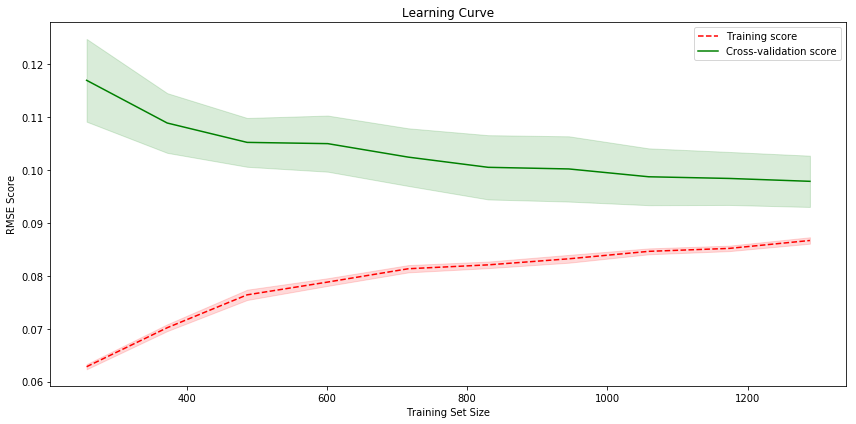

In [331]:
#Draw learning curve plot

# Draw lines
plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean, '--', color='red',  label='Training score')
plt.plot(train_sizes, test_mean, color='green', label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='red',alpha=0.15)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green',alpha=0.15)

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('RMSE Score'), plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Ensemble

One way to try and improve the results is to use "the wisdom of the crowds", an Ensemble.

An ensemble is a collection of weak learners, which can together, form a stronger model. This is because some models are better at predicting some results than others and averaging can often produce a better result.

In this section, the various models will be used for predicting values and storing these in DataFrames for later identifying the best ensemble combination possible.

In [332]:
ensemble_train_DF=pd.DataFrame(columns=['Lasso','Kernel Ridge','Elastic Net','Gradient Boosting','XGBoost','LGBM'])
predictions_DF=pd.DataFrame(columns=['Lasso','Kernel Ridge','Elastic Net','Gradient Boosting','XGBoost','LGBM'])

In [333]:
kfold = KFold(n_splits=10, random_state= 101, shuffle = True)

Training

In [334]:
for train, test in kfold.split(X_train,y):

    x_temp = X_train.iloc[train]
    y_temp = y.iloc[train]
    
    #fit and predict with Lasso
    lasso.fit(x_temp,y_temp)
    y_train_lasso = lasso.predict(X_train.iloc[test])
        
    #fit and predict with Kernel Ridge Regression
    kr.fit(x_temp,y_temp)
    y_train_kr = kr.predict(X_train.iloc[test])

    #fit and predict with Elastic Net Regression
    en.fit(x_temp,y_temp)
    y_train_en = en.predict(X_train.iloc[test])   
    
    #fit and predict with Gboost
    gboost.fit(x_temp,y_temp)
    y_train_gboost = gboost.predict(X_train.iloc[test])
    
    #fit and predict with XGBoost
    xgb.fit(x_temp,y_temp)
    y_train_xgb = xgb.predict(X_train.iloc[test])

    #fit and predict with LGBM
    lgb.fit(x_temp,y_temp)
    y_train_lgb = lgb.predict(X_train.iloc[test])
    
    temp_DF = pd.DataFrame()
    temp_DF['Lasso'] = y_train_lasso
    temp_DF['Kernel Ridge'] = y_train_kr
    temp_DF['Elastic Net'] = y_train_en
    temp_DF['Gradient Boosting'] = y_train_gboost
    temp_DF['XGBoost'] = y_train_xgb
    temp_DF['LGBM'] = y_train_lgb
    
    ensemble_train_DF = pd.concat((ensemble_train_DF,temp_DF))

In [335]:
ensemble_train_DF = ensemble_train_DF.sort_index()

In [336]:
ensemble_train_DF_copy = ensemble_train_DF.copy()

In [337]:
columns = ensemble_train_DF_copy.columns

In [338]:
ensemble_train_DF_copy.head()

Lasso  Kernel Ridge  Elastic Net  Gradient Boosting    XGBoost  \
0  12.260977     12.250690    12.257792          12.256134  12.263898   
0  12.332667     12.320991    12.342725          12.317506  12.309735   
0  11.772724     11.759932    11.753423          11.769861  11.738595   
0  11.732146     11.737820    11.719953          11.649074  11.807222   
0  12.148189     12.175423    12.148355          12.166437  12.227212   

        LGBM  
0  12.256764  
0  12.289005  
0  11.795346  
0  11.766534  
0  12.125258

In [339]:
lasso_meta = Lasso(alpha =0.0005, random_state=1,max_iter=100000)

In [340]:
lasso_meta.fit(ensemble_train_DF_copy,y)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [341]:
ensemble_train_DF['Meta Model'] = lasso_meta.predict(ensemble_train_DF)

In [342]:
ensemble_train_DF.head()

Lasso  Kernel Ridge  Elastic Net  Gradient Boosting    XGBoost  \
0  12.260977     12.250690    12.257792          12.256134  12.263898   
0  12.332667     12.320991    12.342725          12.317506  12.309735   
0  11.772724     11.759932    11.753423          11.769861  11.738595   
0  11.732146     11.737820    11.719953          11.649074  11.807222   
0  12.148189     12.175423    12.148355          12.166437  12.227212   

        LGBM  Meta Model  
0  12.256764   12.030333  
0  12.289005   12.033234  
0  11.795346   12.023552  
0  11.766534   12.039574  
0  12.125258   12.025828

__Identifying best Ensemble of Models using CV predictions__

In [376]:
#Create a list with possible percentages
perc_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

#Initialize a very high value for RMSE and an emply list for best percentages for each model
RMSE = 999999
list_perc = []

#Models considered: Lasso, Kernel Ridge, Elastic Net, XGBoost, LGBM, Meta Model

for i in perc_list:
    for j in perc_list:
        for k in perc_list:
            for l in perc_list:
                for m in perc_list:
                    CV_ens_pred = ensemble_train_DF['Lasso']*i + ensemble_train_DF['Kernel Ridge']*j + ensemble_train_DF['Elastic Net']*k + \
                    + ensemble_train_DF['XGBoost']*l + ensemble_train_DF['LGBM']*m + ensemble_train_DF['Meta Model']*n
                                        
                    temp = ((CV_ens_pred - y)**2).sum()/len(y)
                    if temp < RMSE:
                        RMSE = temp
                        list_perc = [i,j,k,l,m,n]

In [377]:
#Print best RMSE obtained
print('Best RMSE is {:.6f}'.format(RMSE))
#Print best percentages list obtained
print('The list of best percentages of Ensemble is {}'.format(list_perc))

Best RMSE is 0.149119
The list of best percentages of Ensemble is [0, 0, 0, 0.4, 0, 0.6]


Collecting the predictions with each model

In [343]:
#fit and predict with Lasso
lasso.fit(X_train,y)
y_test_lasso = lasso.predict(final_test)
        
#fit and predict with Kernel Ridge Regression
kr.fit(X_train,y)
y_test_kr = kr.predict(final_test)

#fit and predict with Elastic Net Regression
en.fit(X_train,y)
y_test_en = en.predict(final_test)    

#fit and predict with Gradient Boost
gboost.fit(X_train,y)
y_test_gboost = gboost.predict(final_test)  

#fit and predict with XGB
xgb.fit(X_train,y)
y_test_xgb = xgb.predict(final_test)  

#fit and predict with LGBM
lgb.fit(X_train,y)
y_test_lgb = lgb.predict(final_test)

#fit and predict with Meta Model
lasso_meta.fit(X_train,y)
y_test_meta = lasso_meta.predict(final_test)
    
predictions_DF['Lasso'] = y_test_lasso
predictions_DF['Kernel Ridge'] = y_test_kr
predictions_DF['Elastic Net'] = y_test_en
predictions_DF['Gradient Boosting'] = y_test_gboost
predictions_DF['XGBoost'] = y_test_xgb
predictions_DF['LGBM'] = y_test_lgb
predictions_DF['Meta Model'] = y_test_meta

In [344]:
predictions_DF.head()

Lasso  Kernel Ridge  Elastic Net  Gradient Boosting    XGBoost  \
0  11.698116     11.717053    11.712382          11.701493  11.736379   
1  12.020286     12.010253    12.026074          12.041550  12.017004   
2  12.101082     12.128362    12.113311          12.089714  12.155934   
3  12.154072     12.182480    12.160872          12.096881  12.173231   
4  12.191604     12.158643    12.202992          12.194380  12.156910   

        LGBM  Meta Model  
0  11.756985   11.698116  
1  11.999418   12.020286  
2  12.131955   12.101082  
3  12.156544   12.154072  
4  12.171203   12.191604

In [345]:
lasso.fit(X_train,y)
kr.fit(X_train,y)
en.fit(X_train,y)
lgb.fit(X_train,y)
gboost.fit(X_train,y)
xgb.fit(X_train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [346]:
#y_submit = np.expm1(lgb.predict(final_test.drop('Id',axis=1)))
y_train_lasso = lasso.predict(X_train)
y_train_kr = kr.predict(X_train)
y_train_en = en.predict(X_train)
y_train_lgb = lgb.predict(X_train)
y_train_gboost = gboost.predict(X_train)
y_train_xgb = xgb.predict(X_train)

In [347]:
y_pred_train = 0.75*y_train_kr + 0.25*y_train_lgb
#y_pred_train = (0.5*y_train_en) + (0.5*y_train_lgb) #+ (0.25*y_train_xgb)

In [348]:
rmsle(y, y_pred_train)*100

7.151248164706674

In [349]:
y_train = np.expm1(y_pred_train)
residual = pd.DataFrame()
residual['Predict'] = y_pred_train
residual['Residual'] = y - y_pred_train

In [350]:
y_predict_train = 0.1 * y_train_gboost + 0.3 * y_train_xgb + 0.3 * y_train_lasso + 0.3 * y_train_kr

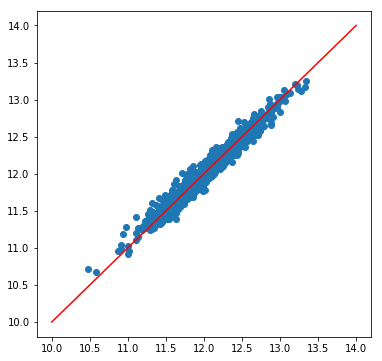

In [351]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_train_kr)
plt.plot(range(10, 15), range(10, 15), color="red")

### Create final prediction

In [382]:
y_submit = predictions_DF['Kernel Ridge']
#y_submit = predictions_DF['Meta Model']
#y_submit = ((0.0*predictions_DF['Elastic Net']) + (0.0*predictions_DF['Lasso']) + (0.0*predictions_DF['Kernel Ridge']) +(0.4*predictions_DF['XGBoost']) + (0.0*predictions_DF['LGBM'])+(0.6*predictions_DF['Meta Model']))

__Submit Predictions__

In [383]:
df_submit = pd.DataFrame({'Id':list(id_list),'SalePrice':np.expm1(y_submit)})

In [384]:
df_submit.head()

Id      SalePrice
0  1461  122644.460036
1  1462  164431.060180
2  1463  185045.354036
3  1464  195335.683308
4  1465  190734.510978

In [385]:
df_submit.to_csv('submission.csv',index=False)

With Kernel Ridge, a RMSE of 11.961% is obtained in Kaggle.